#Question 1#

##Import Basic Libraries##

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

##Load the dataset##

In [ ]:
file_path = "ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file_path)
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

##Preprocess the data: type conversion and data normalization##

In [ ]:
data_processed = data.copy()

label_encoder = LabelEncoder()
binary_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for var in binary_vars:
    data_processed[var] = label_encoder.fit_transform(data_processed[var])

data_processed = pd.get_dummies(data_processed, columns=['CAEC', 'CALC', 'MTRANS', 'NObeyesdad'], drop_first=True)

X = data_processed.drop('Weight', axis=1)
y = data_processed['Weight']
continuous_vars = ['Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

scaler = StandardScaler()
X[continuous_vars] = scaler.fit_transform(X[continuous_vars])

##Split the data into training and evaluation sets.##

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the size of the data sets
print("Train set size (X_train):", X_train.shape)
print("Evaluation set size (X_eval):", X_eval.shape)
print("Train set size (y_train):", y_train.shape)
print("Evaluation set size (y_eval):", y_eval.shape)

Train set size (X_train): (1688, 28)
Evaluation set size (X_eval): (423, 28)
Train set size (y_train): (1688,)
Evaluation set size (y_eval): (423,)


##1)    Gradient Descent (GD): Batch Gradient Descent; Stochastic Gradient Descent (SGD); Mini-Batch Gradient Descent##



###Batch Gradient Descent###

In [ ]:
def batch_gradient_descent(X, y, theta=None, alpha=0.01, epochs=1000,log_epochs=100):
    """
    Thực hiện Batch Gradient Descent.
    X: Ma trận đặc trưng (m x n)
    y: Vector mục tiêu (m x 1)
    theta: Trọng số ban đầu (vector, mặc định là vector 0)
    alpha: Tốc độ học (learning rate)
    epochs: Số vòng lặp
    """
    m, n = X.shape

    # Khởi tạo theta nếu không được truyền vào
    if theta is None:
        theta = np.zeros((n, 1))  # Khởi tạo vector trọng số với kích thước (n, 1)
    else:
        theta = theta.reshape(-1, 1)  # Đảm bảo theta có kích thước (n, 1)

    y = y.reshape(-1, 1)  # Đảm bảo y là vector cột
    losses = []  # Lưu giá trị loss mỗi epoch
    logs = [] # Khởi tạo danh sách lưu log
    for epoch in range(epochs):
        # Bước 1: Tính y_hat
        y_hat = np.dot(X, theta)

        # Bước 2: Tính gradient
        gradient = (1 / m) * np.dot(X.T, (y_hat - y))

        # Bước 3: Cập nhật trọng số
        theta -= alpha * gradient

        # Tính loss (MSE)
        loss = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
        losses.append(loss)

        # Lưu log tại các epoch cụ thể
        if epoch % log_epochs == 0 or epoch == epochs - 1:
            logs.append({
                "epoch": epoch,
                "loss": loss,
                "weights": theta[1:6].flatten().tolist(),  # Lưu 5 trọng số đầu tiên
                "bias": theta[0, 0]  # Lưu bias
            })

    return theta, losses, logs

Epoch 0, Loss: 3480.1603, Weights (first 5): [1.4174821386810392, 1.0664326576657608, 1.0986767919539124, 1.6980815831813911, 1.7281699305595843], Bias: 1.7970
Epoch 100, Loss: 141.4739, Weights (first 5): [8.696313171221902, 4.098434282963333, 4.454633304473413, 15.862751986547487, 15.567192825116102], Bias: 17.6518
Epoch 200, Loss: 126.5334, Weights (first 5): [7.807498922370848, 4.765350790663817, 5.513051553399776, 16.205699887647274, 15.031801525522956], Bias: 18.0791
Epoch 300, Loss: 116.9497, Weights (first 5): [7.031402841908283, 4.915880803875678, 6.116734262141591, 16.307205329079718, 14.41053201959966], Bias: 18.4843
Epoch 400, Loss: 109.3003, Weights (first 5): [6.3860247667981636, 4.9354430767855, 6.4934824257225925, 16.32637568509312, 13.811659113636132], Bias: 18.9394
Epoch 500, Loss: 102.8622, Weights (first 5): [5.848275666534904, 4.919742764770127, 6.748910483281506, 16.288800747896374, 13.236499488650539], Bias: 19.4225
Epoch 600, Loss: 97.3168, Weights (first 5): [5

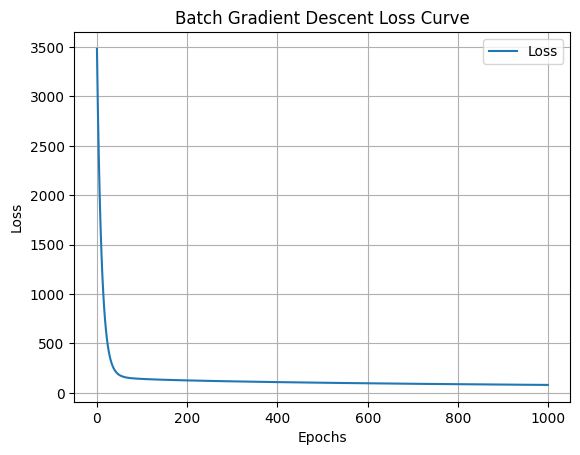

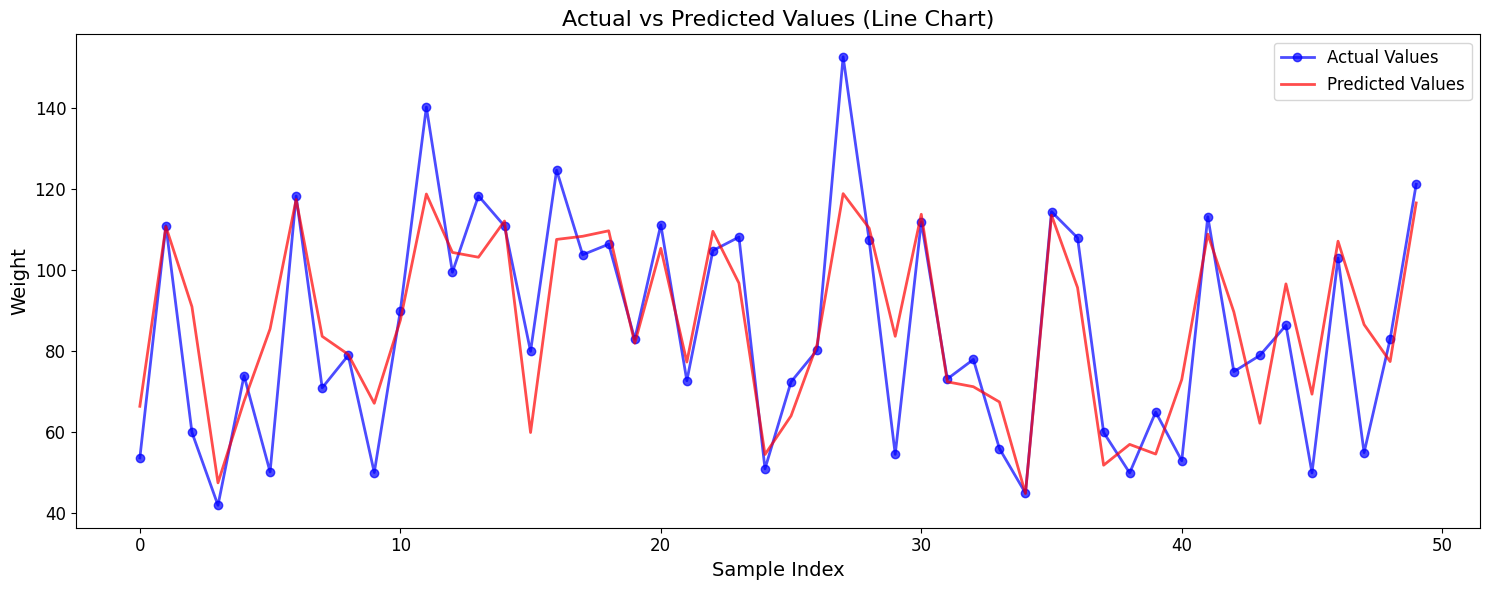

In [ ]:
# Thêm bias term và đảm bảo kiểu dữ liệu đúng
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train].astype(float)  # Thêm cột bias vào X_train
X_eval_b = np.c_[np.ones((X_eval.shape[0], 1)), X_eval].astype(float)    # Thêm cột bias vào X_eval

# Reshape and ensure correct data type if needed
y_train = y_train.to_numpy().reshape(-1, 1).astype(float)
y_eval = y_eval.to_numpy().reshape(-1, 1).astype(float)

# Khởi tạo theta tùy chỉnh
initial_theta = np.ones((X_train_b.shape[1], 1))

# Tùy chỉnh learning rate và epochs
learning_rate = 0.01  # Alpha
max_epochs = 1000     # Epochs

# Huấn luyện mô hình với Batch Gradient Descent
theta, losses, logs = batch_gradient_descent(X_train_b, y_train, theta=initial_theta, alpha=learning_rate, epochs=max_epochs)

# Dự đoán trên tập kiểm tra
y_pred_batch = np.dot(X_eval_b, theta)

for log in logs:
    print(f"Epoch {log['epoch']}, Loss: {log['loss']:.4f}, Weights (first 5): {log['weights']}, Bias: {log['bias']:.4f}")

# Tính toán Mean Squared Error (MSE)
mse_batch = mean_squared_error(y_eval, y_pred_batch)
print("Batch Gradient Descent MSE:", mse_batch)

# Hiển thị Loss theo Epoch
plt.plot(range(len(losses)), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent Loss Curve')
plt.legend()
plt.grid()
plt.show()

# Chọn một số lượng mẫu để hiển thị
num_samples = 50  # Số lượng mẫu cần hiển thị
indices = np.arange(num_samples)  # Tạo chỉ số mẫu
y_eval_subset = y_eval[:num_samples].flatten()  # Giá trị thực tế
y_pred_subset = y_pred_batch[:num_samples].flatten()  # Giá trị dự đoán

# Vẽ biểu đồ đường
plt.figure(figsize=(15, 6))
plt.plot(indices, y_eval_subset, label="Actual Values", color="blue", linewidth=2, marker='o', alpha=0.7)
plt.plot(indices, y_pred_subset, label="Predicted Values", color="red", linewidth=2, alpha=0.7)

# Thêm tiêu đề và nhãn
plt.title("Actual vs Predicted Values (Line Chart)", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Plot actual vs predicted values (Cluster)
# plt.figure(figsize=(10, 8))
# plt.scatter(range(len(y_eval)), y_eval, color="blue", label="Actual Values", alpha=0.7)
# plt.scatter(range(len(y_eval)), y_pred_batch, color="red", label="Predicted Values", alpha=0.7)
# plt.xlabel("Sample Index")
# plt.ylabel("Weight")
# plt.title("Actual vs Predicted Values")
# plt.legend()
# plt.show()

# Bar Chart
# num_samples = 100
# indices = np.arange(num_samples)
# y_eval_subset = y_eval[:num_samples].flatten()
# y_pred_subset = y_pred_batch[:num_samples].flatten()

# plt.figure(figsize=(15, 6))
# bar_width = 0.4

# plt.bar(indices - bar_width/2, y_eval_subset, bar_width, label="Actual Values", color="blue", alpha=0.7)

# plt.bar(indices + bar_width/2, y_pred_subset, bar_width, label="Predicted Values", color="red", alpha=0.7)

# plt.title("Actual vs Predicted Values (Bar Chart)", fontsize=16)
# plt.xlabel("Sample Index", fontsize=14)
# plt.ylabel("Weight", fontsize=14)
# plt.xticks(indices, fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(fontsize=12)

# plt.tight_layout()
# plt.show()

###Stochastic Gradient Descent (SGD)###


In [ ]:
def SGD(X, y, theta, alpha=0.01, num_iters=1000, log_epochs=100):
    """
    Thực hiện Stochastic Gradient Descent.
    X: Ma trận đặc trưng (m x n)
    y: Vector mục tiêu (m x 1)
    theta: Trọng số ban đầu (n x 1)
    alpha: Tốc độ học (learning rate)
    num_iters: Số vòng lặp
    log_epochs: Số epoch giữa các lần ghi log
    """
    m = y.size  # Số lượng mẫu
    losses = []  # Danh sách lưu loss để theo dõi
    logs = []  # Khởi tạo danh sách log

    for epoch in range(num_iters):
        # Thực hiện cập nhật cho từng mẫu
        for i in range(m):
            # Lấy ngẫu nhiên một sample
            random_index = np.random.randint(m)
            xi = X[random_index:random_index + 1]  # Lấy 1 dòng của X
            yi = y[random_index:random_index + 1]  # Lấy giá trị y tương ứng

            # Tính dự đoán (hàm tuyến tính)
            y_hat = np.dot(xi, theta)

            # Tính gradient cho mẫu hiện tại
            gradient = xi.T.dot(y_hat - yi)

            # Cập nhật trọng số
            theta -= alpha * gradient

        # Tính loss sau mỗi epoch (Mean Squared Error)
        y_pred = np.dot(X, theta)
        loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        losses.append(loss)

        # Lưu log tại các epoch cụ thể
        if epoch % log_epochs == 0 or epoch == num_iters - 1:
            logs.append({
                "epoch": epoch,
                "loss": loss,
                "weights": theta[1:6].flatten().tolist(),  # Lưu 5 trọng số đầu tiên
                "bias": theta[0, 0]  # Lưu bias
            })

    return theta, losses, logs

Epoch 0, Loss: 66.8703, Weights (first 5): [3.363605476113793, 4.6556614279653195, 9.107395128335073, 13.979970720689002, 7.970749487470751], Bias: 25.3335
Epoch 100, Loss: 14.5528, Weights (first 5): [-0.9032579658309219, -1.059145337212574, 9.069108881879385, -0.14970119557138034, -0.4115853137252122], Bias: 40.9042
Epoch 200, Loss: 14.9899, Weights (first 5): [-0.749400780650356, -0.12839684796742706, 8.919928778560651, -0.24421087761011068, -1.359736299271619], Bias: 42.0854
Epoch 300, Loss: 13.0093, Weights (first 5): [-0.9662033515809706, -0.5398080014563506, 9.272398323559672, 0.10529956864191202, -0.9404146814631028], Bias: 44.4325
Epoch 400, Loss: 13.6371, Weights (first 5): [-0.2293743063245443, -0.44945697173656385, 8.304292381052624, -0.3547394283514142, -1.0093640849123062], Bias: 45.6228
Epoch 500, Loss: 13.1663, Weights (first 5): [-0.925251046946581, -0.3334568998184869, 9.343292907362096, -0.03647565125784953, -1.049011644535012], Bias: 46.6329
Epoch 600, Loss: 13.3800

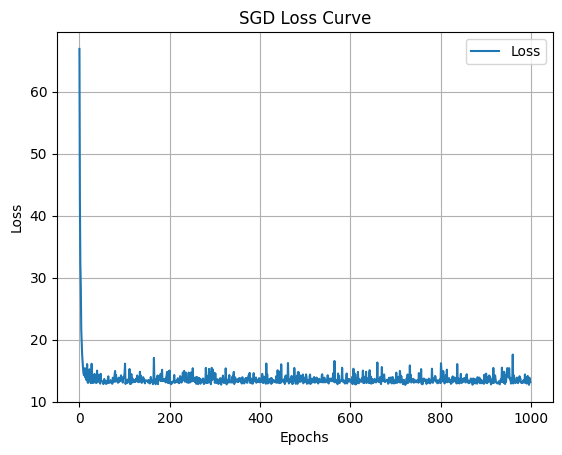

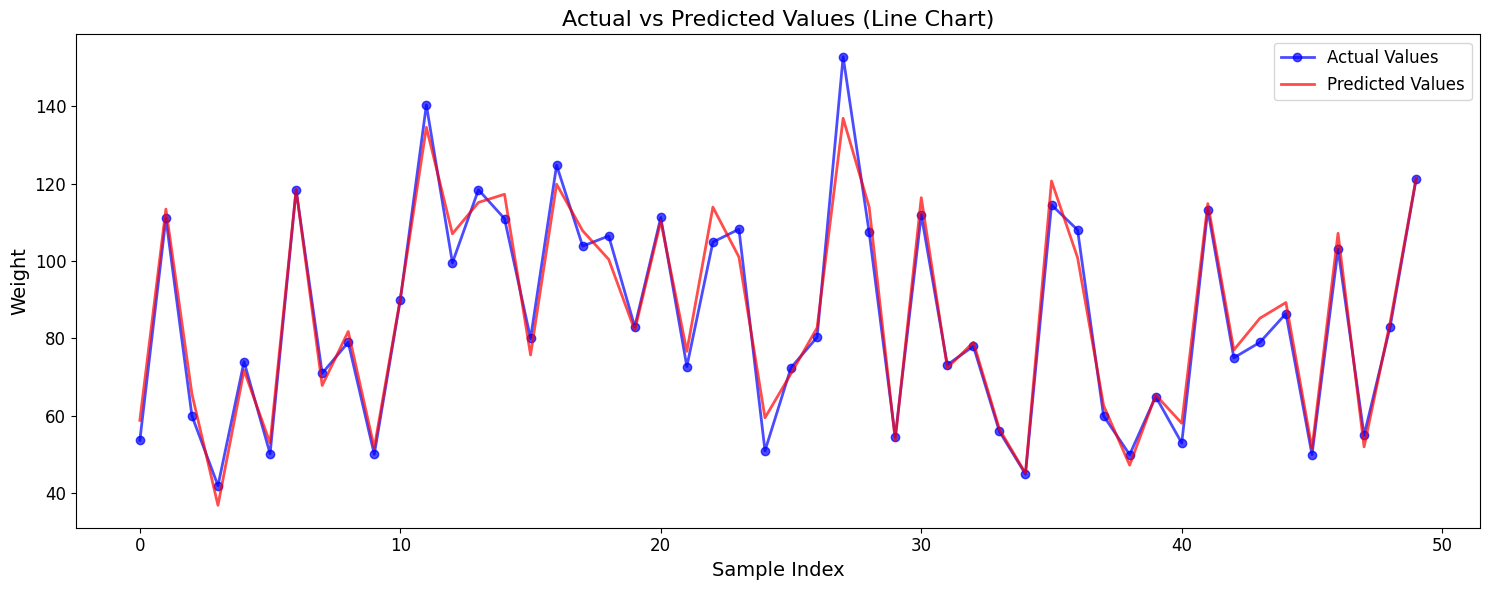

In [ ]:
# Thêm bias và chuyển dữ liệu sang NumPy arrays
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train].astype(float)  # Thêm cột bias
X_eval_b = np.c_[np.ones((X_eval.shape[0], 1)), X_eval].astype(float)    # Thêm cột bias

# Chuyển y_train và y_eval về dạng vector cột
y_train = y_train.reshape(-1, 1).astype(float)  # Chuyển thành vector cột
y_eval = y_eval.reshape(-1, 1).astype(float)    # Chuyển thành vector cột

# 4. Khởi tạo tham số và gọi SGD
initial_theta = np.ones((X_train_b.shape[1], 1))  # Khởi tạo theta với giá trị 0
learning_rate = 0.01  # Alpha
max_epochs = 1000  # Số vòng lặp

theta_sgd, losses_sgd, logs = SGD(X_train_b, y_train, theta=initial_theta, alpha=learning_rate, num_iters=max_epochs)

# 5. Dự đoán trên tập kiểm tra
y_pred_sgd = np.dot(X_eval_b, theta_sgd)

for log in logs:
    print(f"Epoch {log['epoch']}, Loss: {log['loss']:.4f}, Weights (first 5): {log['weights']}, Bias: {log['bias']:.4f}")

# 6. Tính toán MSE trên tập kiểm tra
mse_sgd = mean_squared_error(y_eval, y_pred_sgd)
print(f"Stochastic Gradient Descent MSE: {mse_sgd:.4f}")

# 7. Vẽ đồ thị loss
plt.plot(range(len(losses_sgd)), losses_sgd, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD Loss Curve')
plt.legend()
plt.grid()
plt.show()

# Chọn một số lượng mẫu để hiển thị
num_samples = 50  # Số lượng mẫu cần hiển thị
indices = np.arange(num_samples)  # Tạo chỉ số mẫu
y_eval_subset = y_eval[:num_samples].flatten()  # Giá trị thực tế
y_pred_subset = y_pred_sgd[:num_samples].flatten()  # Giá trị dự đoán

# Vẽ biểu đồ đường
plt.figure(figsize=(15, 6))
plt.plot(indices, y_eval_subset, label="Actual Values", color="blue", linewidth=2, marker='o', alpha=0.7)
plt.plot(indices, y_pred_subset, label="Predicted Values", color="red", linewidth=2, alpha=0.7)

# Thêm tiêu đề và nhãn
plt.title("Actual vs Predicted Values (Line Chart)", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# # Plot actual vs predicted values
# plt.figure(figsize=(10, 8))
# plt.scatter(range(len(y_eval)), y_eval, color="blue", label="Actual Values", alpha=0.7)
# plt.scatter(range(len(y_eval)), y_pred_sgd, color="red", label="Predicted Values", alpha=0.7)
# plt.xlabel("Sample Index")
# plt.ylabel("Weight")
# plt.title("Actual vs Predicted Values")
# plt.legend()
# plt.show()

###Mini-Batch Gradient Descent###

In [ ]:
def mini_batch_gradient_descent(X, y, theta, alpha=0.01, num_iters=1000, minibatch_size=32,log_epochs=100):
    """
    Thực hiện Mini-Batch Gradient Descent.
    X: Ma trận đặc trưng (m x n)
    y: Vector mục tiêu (m x 1)
    theta: Trọng số ban đầu (n x 1)
    alpha: Tốc độ học (learning rate)
    num_iters: Số vòng lặp
    minibatch_size: Kích thước minibatch
    """
    m = y.size  # Số lượng mẫu
    losses = []  # Danh sách lưu loss để theo dõi
    logs = []
    for epoch in range(num_iters):
        # Shuffle dữ liệu để đảm bảo mini-batches thay đổi mỗi lần.
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        # Chia dữ liệu thành minibatch
        for i in range(0, m, minibatch_size):
            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]

            # Tính dự đoán
            y_hat = np.dot(xi, theta)

            # Tính gradient cho minibatch
            gradient = (1 / minibatch_size) * np.dot(xi.T, (y_hat - yi))

            # Cập nhật trọng số
            theta -= alpha * gradient

        # Tính loss sau mỗi epoch
        y_pred = np.dot(X, theta)
        loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        losses.append(loss)

        # Lưu log tại các epoch cụ thể
        if epoch % log_epochs == 0 or epoch == num_iters - 1:
            logs.append({
                "epoch": epoch,
                "loss": loss,
                "weights": theta[1:6].flatten().tolist(),  # Lưu 5 trọng số đầu tiên
                "bias": theta[0, 0]  # Lưu bias
            })

    return theta, losses, logs

Epoch 0, Loss: 176.8634, Weights (first 5): [8.693421969107227, 3.1977231975112352, 3.4986002989042566, 14.643766417786269, 14.73745360396806], Bias: 16.3730
Epoch 100, Loss: 30.0424, Weights (first 5): [2.0528248994006133, 2.522630315416726, 8.593964684199596, 7.920587284587105, 1.5317208512718665], Bias: 34.1286
Epoch 200, Loss: 17.9437, Weights (first 5): [0.4629166138013148, 1.052927787357169, 9.08255541368458, 3.8513353811109967, -0.3817849883091726], Bias: 37.2722
Epoch 300, Loss: 14.4188, Weights (first 5): [-0.21267903958992118, 0.32479287121775874, 9.219824423847951, 1.996750192964864, -0.6879712962380338], Bias: 37.8531
Epoch 400, Loss: 13.2529, Weights (first 5): [-0.5222237089063422, -0.07920768741842235, 9.224590571731335, 0.9545533438972106, -0.7704126844737591], Bias: 37.9246
Epoch 500, Loss: 12.8576, Weights (first 5): [-0.6490668892780679, -0.31437227126804695, 9.261290507703686, 0.37640721345486716, -0.7801448967359694], Bias: 37.9633
Epoch 600, Loss: 12.7231, Weights

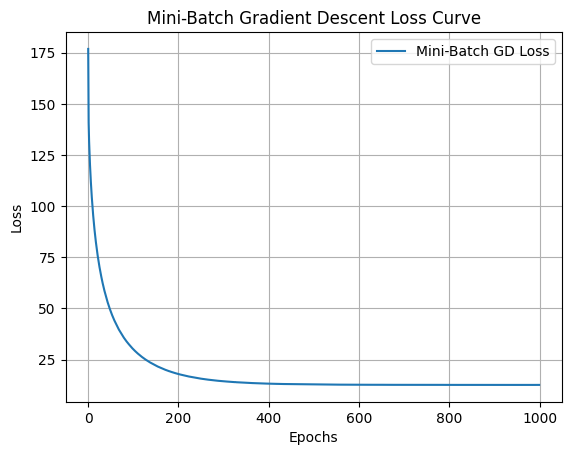

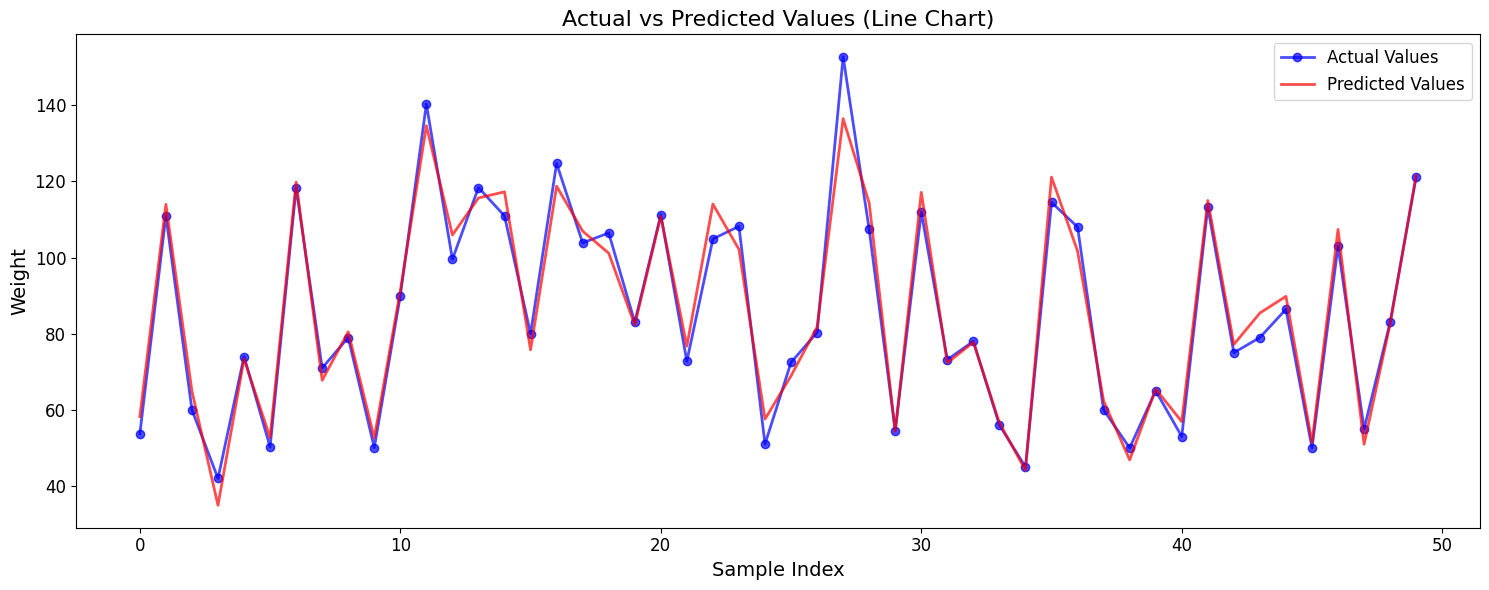

In [ ]:
# Thêm bias và chuyển dữ liệu sang NumPy arrays
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train].astype(float)  # Thêm cột bias
X_eval_b = np.c_[np.ones((X_eval.shape[0], 1)), X_eval].astype(float)    # Thêm cột bias
y_train = y_train.reshape(-1, 1).astype(float)  # Chuyển thành vector cột
y_eval = y_eval.reshape(-1, 1).astype(float)    # Chuyển thành vector cột

# Khởi tạo tham số và gọi Mini-Batch Gradient Descent
initial_theta = np.ones((X_train_b.shape[1], 1))  # Khởi tạo theta với giá trị 1
learning_rate = 0.01  # Alpha
num_iterations = 1000  # Số vòng lặp
minibatch_size = 32  # Kích thước minibatch

theta_mbgd, losses_mbgd,logs = mini_batch_gradient_descent(
    X_train_b, y_train, theta=initial_theta, alpha=learning_rate,
    num_iters=num_iterations, minibatch_size=minibatch_size
)

# 5. Dự đoán trên tập kiểm tra
y_pred_mbgd = np.dot(X_eval_b, theta_mbgd)

for log in logs:
    print(f"Epoch {log['epoch']}, Loss: {log['loss']:.4f}, Weights (first 5): {log['weights']}, Bias: {log['bias']:.4f}")

# 6. Tính toán MSE trên tập kiểm tra
mse_mbgd = mean_squared_error(y_eval, y_pred_mbgd)
print(f"Mini-Batch Gradient Descent MSE: {mse_mbgd:.4f}")

# 7. Vẽ đồ thị loss
plt.plot(range(len(losses_mbgd)), losses_mbgd, label='Mini-Batch GD Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Mini-Batch Gradient Descent Loss Curve')
plt.legend()
plt.grid()
plt.show()

# Chọn một số lượng mẫu để hiển thị
num_samples = 50  # Số lượng mẫu cần hiển thị
indices = np.arange(num_samples)  # Tạo chỉ số mẫu
y_eval_subset = y_eval[:num_samples].flatten()  # Giá trị thực tế
y_pred_subset = y_pred_mbgd[:num_samples].flatten()  # Giá trị dự đoán

# Vẽ biểu đồ đường
plt.figure(figsize=(15, 6))
plt.plot(indices, y_eval_subset, label="Actual Values", color="blue", linewidth=2, marker='o', alpha=0.7)
plt.plot(indices, y_pred_subset, label="Predicted Values", color="red", linewidth=2, alpha=0.7)

# Thêm tiêu đề và nhãn
plt.title("Actual vs Predicted Values (Line Chart)", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

#Trực quan hóa giá trị thực tế và giá trị dự đoán
# plt.figure(figsize=(10, 8))
# plt.scatter(range(len(y_eval)), y_eval, color="blue", label="Actual Values", alpha=0.7)
# plt.scatter(range(len(y_eval)), y_pred_mbgd, color="red", label="Predicted Values", alpha=0.7)
# plt.xlabel("Sample Index")
# plt.ylabel("Weight")
# plt.title("Actual vs Predicted Values")
# plt.legend()
# plt.show()

##2)    Momentum##

In [ ]:
# Gradient Descent with Momentum Class
class GradientDescent:
    """
    Gradient Descent with Momentum
    Parameters:
    -----------
    learning_rate: float = 0.01
        The step length used when following the negative gradient.
    momentum: float = 0.0
        Amount of momentum to use.
        Momentum accelerates gradient descent in the relevant direction and dampens oscillations.
    """
    def __init__(self, learning_rate: float = 0.01, momentum: float = 0.0) -> None:
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.w_update = np.array([])

    def update(self, w: np.ndarray, grad_wrt_w: np.ndarray) -> np.ndarray:
        # Initialize w_update if not initialized yet
        if not self.w_update.any():
            self.w_update = np.zeros(np.shape(w))
        # Use momentum if set
        self.w_update = self.momentum * self.w_update + (1 - self.momentum) * grad_wrt_w
        # Move against the gradient to minimize loss
        return w - self.learning_rate * self.w_update

# Batch Gradient Descent with Momentum
def batch_gradient_descent_with_momentum(X, y, theta, optimizer, epochs=1000, log_epochs=100):
    """
    Thực hiện Batch Gradient Descent với Momentum.
    X: Ma trận đặc trưng (m x n)
    y: Vector mục tiêu (m x 1)
    theta: Trọng số ban đầu (n x 1)
    optimizer: Đối tượng GradientDescent để cập nhật theta
    epochs: Số vòng lặp
    log_epochs: Số epoch giữa các lần ghi log
    """
    m = y.size  # Số lượng mẫu
    losses = []  # Danh sách lưu loss để theo dõi
    logs = []  # Khởi tạo danh sách log

    for epoch in range(epochs):
        # Tính y_hat
        y_hat = np.dot(X, theta)

        # Tính gradient
        gradient = (1 / m) * np.dot(X.T, (y_hat - y))

        # Cập nhật trọng số sử dụng optimizer
        theta = optimizer.update(theta, gradient)

        # Tính loss
        loss = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
        losses.append(loss)

        # Lưu log tại các epoch cụ thể
        if epoch % log_epochs == 0 or epoch == epochs - 1:
            logs.append({
                "epoch": epoch,
                "loss": loss,
                "weights": theta[1:6].flatten().tolist(),  # Lưu 5 trọng số đầu tiên
                "bias": theta[0, 0]  # Lưu bias
            })

    return theta, losses, logs

Epoch 0, Loss: 3480.1603, Weights (first 5): [1.1252446416043118, 1.0199297972997283, 1.0296030375861738, 1.2094244749544174, 1.2184509791678755], Bias: 1.2391
Epoch 100, Loss: 141.5879, Weights (first 5): [8.74444369422411, 4.1120060711834086, 4.446345013790723, 15.908305111413211, 15.632290760993946], Bias: 17.6967
Epoch 200, Loss: 126.6964, Weights (first 5): [7.819977179680342, 4.779534788022798, 5.515047414571711, 16.208847268329247, 15.046255203039445], Bias: 18.0669
Epoch 300, Loss: 117.0838, Weights (first 5): [7.038904267369933, 4.922550027037993, 6.121292889120062, 16.311466906246373, 14.423194872849479], Bias: 18.4707
Epoch 400, Loss: 109.4083, Weights (first 5): [6.389814546404763, 4.938416345856904, 6.4974263751109484, 16.331862840655276, 13.823174272866146], Bias: 18.9258
Epoch 500, Loss: 102.9500, Weights (first 5): [5.849237564852457, 4.9214382453607195, 6.7517800780501895, 16.295219473429334, 13.246946487235373], Bias: 19.4093
Epoch 600, Loss: 97.3895, Weights (first 5

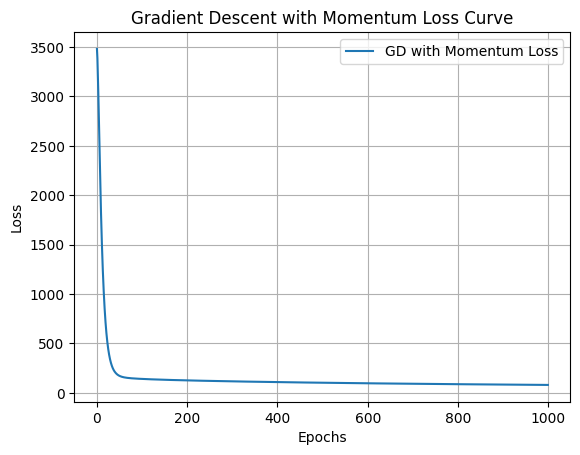

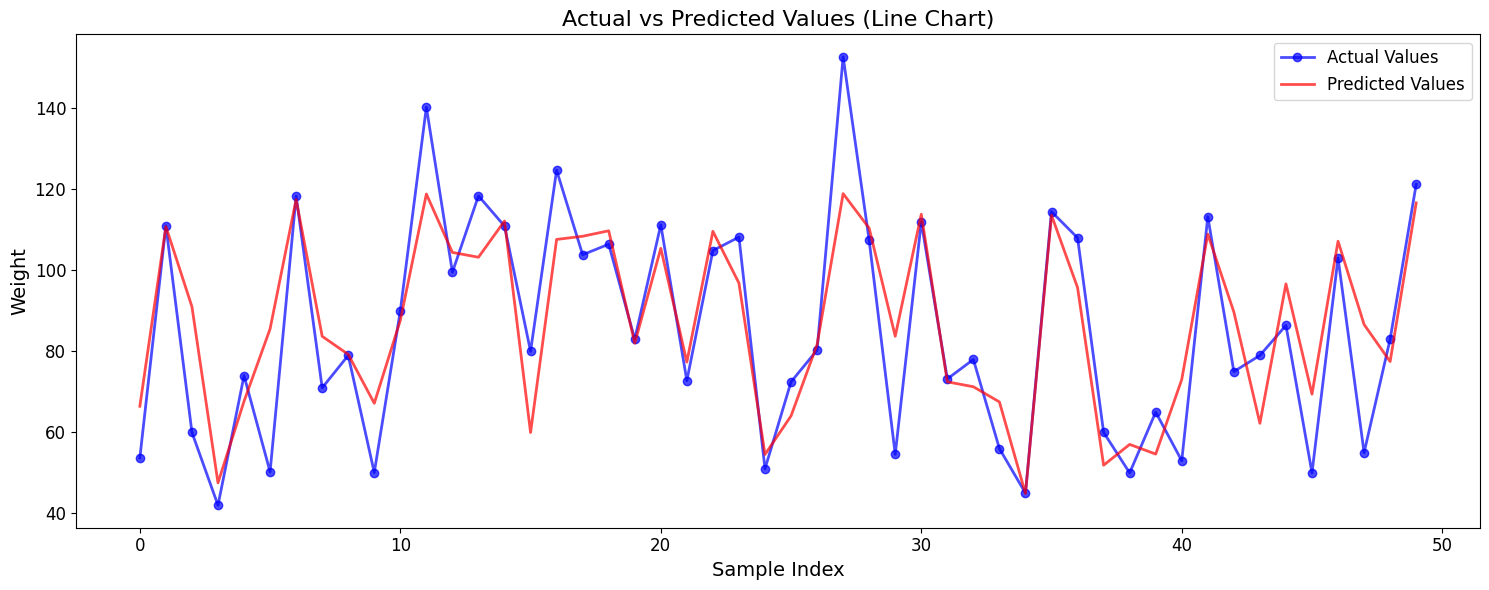

In [ ]:
# Thêm bias và chuyển dữ liệu sang NumPy arrays
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train].astype(float)  # Thêm cột bias
X_eval_b = np.c_[np.ones((X_eval.shape[0], 1)), X_eval].astype(float)    # Thêm cột bias

# Chuyển y_train và y_eval về dạng vector cột
y_train = y_train.reshape(-1, 1).astype(float)  # Chuyển thành vector cột
y_eval = y_eval.reshape(-1, 1).astype(float)    # Chuyển thành vector cột

# 4. Huấn luyện mô hình
initial_theta = np.ones((X_train_b.shape[1], 1))  # Khởi tạo theta với giá trị 1
learning_rate = 0.01  # Alpha
momentum = 0.7  # Momentum
max_epochs = 1000  # Số vòng lặp

# Tạo optimizer với momentum
optimizer = GradientDescent(learning_rate=learning_rate, momentum=momentum)

# Huấn luyện mô hình với Batch Gradient Descent with Momentum
theta_momentum, losses_momentum,logs = batch_gradient_descent_with_momentum(
    X_train_b, y_train, theta=initial_theta, optimizer=optimizer, epochs=max_epochs
)

# 5. Dự đoán trên tập kiểm tra
y_pred_momentum = np.dot(X_eval_b, theta_momentum)

for log in logs:
    print(f"Epoch {log['epoch']}, Loss: {log['loss']:.4f}, Weights (first 5): {log['weights']}, Bias: {log['bias']:.4f}")

# 6. Tính toán MSE trên tập kiểm tra
mse_momentum = mean_squared_error(y_eval, y_pred_momentum)
print(f"Gradient Descent with Momentum MSE: {mse_momentum:.4f}")

# 7. Vẽ đồ thị loss
plt.plot(range(len(losses_momentum)), losses_momentum, label='GD with Momentum Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Gradient Descent with Momentum Loss Curve')
plt.legend()
plt.grid()
plt.show()

# Chọn một số lượng mẫu để hiển thị
num_samples = 50  # Số lượng mẫu cần hiển thị
indices = np.arange(num_samples)  # Tạo chỉ số mẫu
y_eval_subset = y_eval[:num_samples].flatten()  # Giá trị thực tế
y_pred_subset = y_pred_momentum[:num_samples].flatten()  # Giá trị dự đoán

# Vẽ biểu đồ đường
plt.figure(figsize=(15, 6))
plt.plot(indices, y_eval_subset, label="Actual Values", color="blue", linewidth=2, marker='o', alpha=0.7)
plt.plot(indices, y_pred_subset, label="Predicted Values", color="red", linewidth=2, alpha=0.7)

# Thêm tiêu đề và nhãn
plt.title("Actual vs Predicted Values (Line Chart)", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Trực quan hóa giá trị thực tế và giá trị dự đoán
# plt.figure(figsize=(10, 8))
# plt.scatter(range(len(y_eval)), y_eval, color="blue", label="Actual Values", alpha=0.7)
# plt.scatter(range(len(y_eval)), y_pred_momentum, color="red", label="Predicted Values", alpha=0.7)
# plt.xlabel("Sample Index")
# plt.ylabel("Weight")
# plt.title("Actual vs Predicted Values (Momentum)")
# plt.legend()
# plt.show()

##3)	Adagrad (Adaptive Gradient Algorithm)##

In [ ]:
# Adagrad Optimizer
class Adagrad:
    """Adagrad Optimizer
    Parameters:
    -----------
    learning_rate: float = 0.001
        Step length used when following the negative gradient.
    initial_accumulator_value: float = 0.1
        Starting value for the accumulators, must be non-negative.
    epsilon: float = 1e-07
        Small floating point value to avoid zero denominator.
    """
    def __init__(self, learning_rate: float = 0.001, initial_accumulator_value: float = 0.1, epsilon: float = 1e-07) -> None:
        self.learning_rate = learning_rate
        self.initial_accumulator_value = initial_accumulator_value
        self.epsilon = epsilon
        self.G = None  # Sum of squares of the gradients

        assert self.initial_accumulator_value > 0, "initial_accumulator_value must be positive"

    def update(self, w: np.ndarray, grad_wrt_w: np.ndarray) -> np.ndarray:
        # Initialize G if not initialized yet
        if self.G is None:
            self.G = np.full_like(w, self.initial_accumulator_value)
        # Update the sum of squares of gradients
        self.G += np.power(grad_wrt_w, 2)
        # Update weights
        return w - self.learning_rate * grad_wrt_w / np.sqrt(self.G + self.epsilon)

# Batch Gradient Descent with Adagrad
def batch_gradient_descent_with_adagrad(X, y, theta, optimizer, epochs=1000, log_epochs = 100):
    """
    Batch Gradient Descent with Adagrad Optimizer.
    X: Feature matrix (m x n)
    y: Target vector (m x 1)
    theta: Initial weights (n x 1)
    optimizer: Adagrad optimizer object
    epochs: Number of iterations
    """
    m = y.size
    losses = []
    logs = []
    for epoch in range(epochs):
        # Compute predictions
        y_hat = np.dot(X, theta)
        # Compute gradient
        gradient = (1 / m) * np.dot(X.T, (y_hat - y))
        # Update weights using Adagrad optimizer
        theta = optimizer.update(theta, gradient)
        # Compute loss (MSE)
        loss = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
        losses.append(loss)

        # Lưu log tại các epoch cụ thể
        if epoch % log_epochs == 0 or epoch == epochs - 1:
            logs.append({
                "epoch": epoch,
                "loss": loss,
                "weights": theta[1:6].flatten().tolist(),  # Lưu 5 trọng số đầu tiên
                "bias": theta[0, 0]  # Lưu bias
            })

    return theta, losses, logs

Epoch 0, Loss: 3480.1603, Weights (first 5): [1.009999713136065, 1.0099886898098798, 1.0099948689524776, 1.0099998973990472, 1.0099999057027964], Bias: 1.0100
Epoch 100, Loss: 3370.8323, Weights (first 5): [1.186277478521504, 1.1853545593138055, 1.1859393880027185, 1.1863171196373778, 1.1863234180310915], Bias: 1.1863
Epoch 200, Loss: 3323.0439, Weights (first 5): [1.2680490846005141, 1.266184857439529, 1.2673730973359378, 1.2681296789567535, 1.268142378397708], Bias: 1.2681
Epoch 300, Loss: 3286.6985, Weights (first 5): [1.3307840168761969, 1.3279655174559482, 1.3297690817469974, 1.3309059892884885, 1.3309250452612076], Bias: 1.3309
Epoch 400, Loss: 3256.2850, Weights (first 5): [1.3836171563942752, 1.379834428276973, 1.3822627656151174, 1.3837808183833777, 1.3838061852632115], Bias: 1.3838
Epoch 500, Loss: 3229.6640, Weights (first 5): [1.4301089301444012, 1.4253535203902021, 1.4284148111536545, 1.4303145408294509, 1.4303461745472044], Bias: 1.4304
Epoch 600, Loss: 3205.7377, Weights

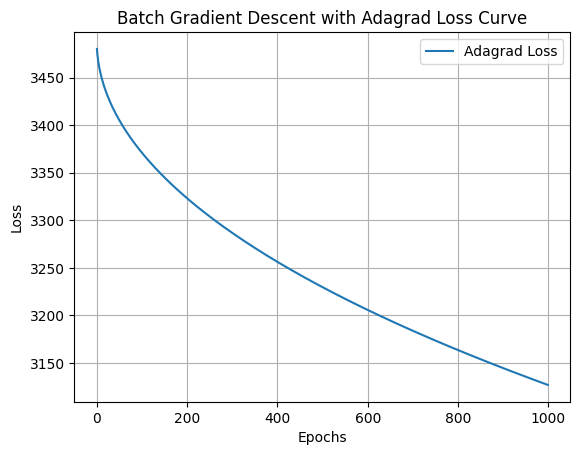

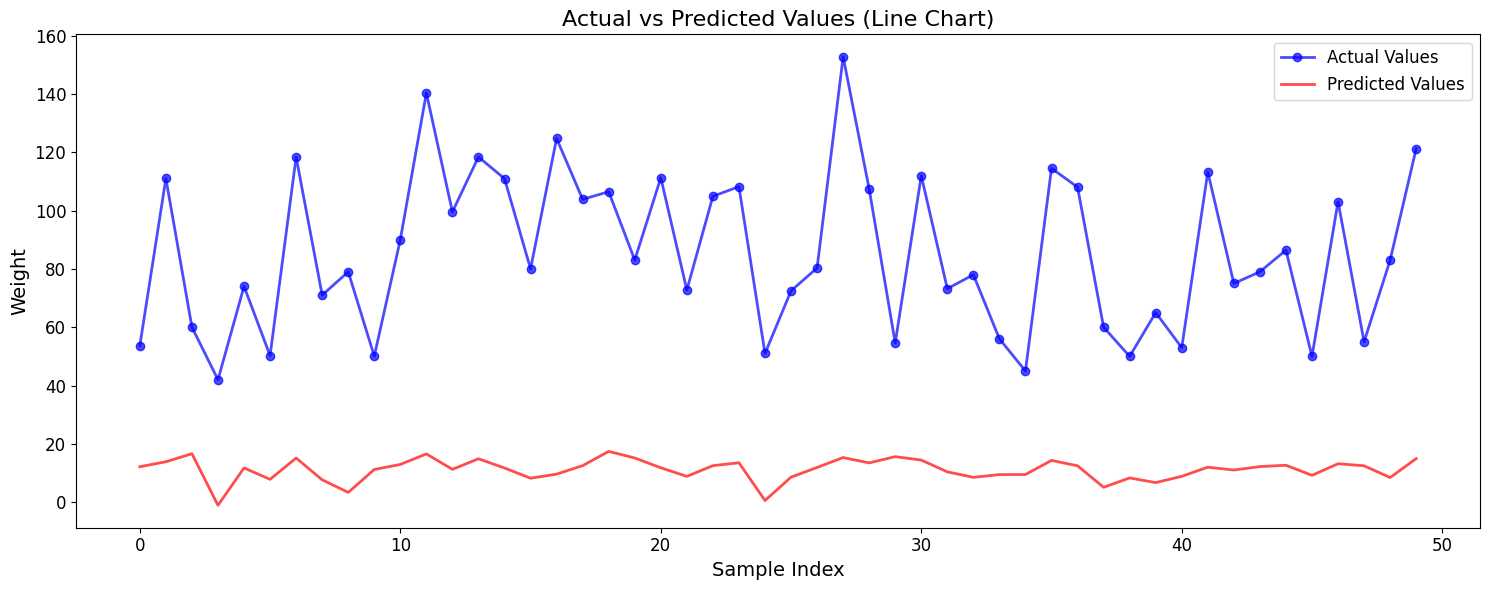

In [ ]:
# Add bias term and convert to NumPy arrays
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train].astype(float)
X_eval_b = np.c_[np.ones((X_eval.shape[0], 1)), X_eval].astype(float)

# Chuyển y_train và y_eval về dạng vector cột
y_train = y_train.reshape(-1, 1).astype(float)  # Chuyển thành vector cột
y_eval = y_eval.reshape(-1, 1).astype(float)    # Chuyển thành vector cột

# Initialize parameters and Adagrad optimizer
initial_theta = np.ones((X_train_b.shape[1], 1))  # Initial weights
learning_rate = 0.01
max_epochs = 1000  # Number of iterations
adagrad_optimizer = Adagrad(learning_rate=learning_rate)

# Train model using Batch Gradient Descent with Adagrad
theta_adagrad, losses_adagrad,logs = batch_gradient_descent_with_adagrad(
    X_train_b, y_train, theta=initial_theta, optimizer=adagrad_optimizer, epochs=max_epochs
)

for log in logs:
    print(f"Epoch {log['epoch']}, Loss: {log['loss']:.4f}, Weights (first 5): {log['weights']}, Bias: {log['bias']:.4f}")

# Predictions and evaluation
y_pred_adagrad = np.dot(X_eval_b, theta_adagrad)
mse_adagrad = mean_squared_error(y_eval, y_pred_adagrad)
print(f"Adagrad MSE: {mse_adagrad:.4f}")

# Plot loss curve
plt.plot(range(len(losses_adagrad)), losses_adagrad, label='Adagrad Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent with Adagrad Loss Curve')
plt.legend()
plt.grid()
plt.show()

# Chọn một số lượng mẫu để hiển thị
num_samples = 50  # Số lượng mẫu cần hiển thị
indices = np.arange(num_samples)  # Tạo chỉ số mẫu
y_eval_subset = y_eval[:num_samples].flatten()  # Giá trị thực tế
y_pred_subset = y_pred_adagrad[:num_samples].flatten()  # Giá trị dự đoán

# Vẽ biểu đồ đường
plt.figure(figsize=(15, 6))
plt.plot(indices, y_eval_subset, label="Actual Values", color="blue", linewidth=2, marker='o', alpha=0.7)
plt.plot(indices, y_pred_subset, label="Predicted Values", color="red", linewidth=2, alpha=0.7)

# Thêm tiêu đề và nhãn
plt.title("Actual vs Predicted Values (Line Chart)", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Plot actual vs predicted values
# plt.figure(figsize=(10, 8))
# plt.scatter(range(len(y_eval)), y_eval, color="blue", label="Actual Values", alpha=0.7)
# plt.scatter(range(len(y_eval)), y_pred_adagrad, color="red", label="Predicted Values", alpha=0.7)
# plt.xlabel("Sample Index")
# plt.ylabel("Weight")
# plt.title("Actual vs Predicted Values (Adagrad)")
# plt.legend()
# plt.show()

##4)	RMSProp (Root Mean Square Propagation)##

In [ ]:
# RMSProp Optimizer Class
class RMSprop:
    """RMSprop Optimizer
    Parameters:
    -----------
    learning_rate: float = 0.001
        Step length used when following the negative gradient.
    rho: float = 0.9
        Discounting factor for the history/coming gradient.
    epsilon: float = 1e-07
        Small floating point value to avoid zero denominator.
    """
    def __init__(self, learning_rate: float = 0.001, rho: float = 0.9, epsilon: float = 1e-7) -> None:
        self.learning_rate = learning_rate
        self.rho = rho
        self.epsilon = epsilon
        self.E_grad = None  # Running average of the square gradients

    def update(self, w: np.ndarray, grad_wrt_w: np.ndarray) -> np.ndarray:
        if self.E_grad is None:
            self.E_grad = np.zeros(np.shape(grad_wrt_w))
        # Update average of gradients
        self.E_grad = self.rho * self.E_grad + (1 - self.rho) * np.power(grad_wrt_w, 2)
        return w - self.learning_rate * grad_wrt_w / np.sqrt(self.E_grad + self.epsilon)

# RMSProp-based Gradient Descent
def batch_gradient_descent_with_rmsprop(X, y, theta, optimizer, epochs=1000, log_epochs = 100):
    m = y.size
    losses = []
    logs = []
    for epoch in range(epochs):
        # Compute predictions
        y_hat = np.dot(X, theta)

        # Compute gradient
        gradient = (1 / m) * np.dot(X.T, (y_hat - y))

        # Update weights using RMSProp optimizer
        theta = optimizer.update(theta, gradient)

        # Compute loss (MSE)
        loss = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
        losses.append(loss)

        # Lưu log tại các epoch cụ thể
        if epoch % log_epochs == 0 or epoch == epochs - 1:
            logs.append({
                "epoch": epoch,
                "loss": loss,
                "weights": theta[1:6].flatten().tolist(),  # Lưu 5 trọng số đầu tiên
                "bias": theta[0, 0]  # Lưu bias
            })

    return theta, losses, logs

Epoch 0, Loss: 3480.1603, Weights (first 5): [1.031622776592612, 1.031622776243417, 1.0316227764393011, 1.0316227765984392, 1.0316227765987018], Bias: 1.0316
Epoch 100, Loss: 2869.0214, Weights (first 5): [2.093068974147682, 2.079363966657072, 2.088469324522431, 2.093627753236135, 2.0937113465145027], Bias: 2.0938
Epoch 200, Loss: 2369.0192, Weights (first 5): [3.083225980224849, 3.0473758161603546, 3.074146419493433, 3.084493100986384, 3.0846466770600656], Bias: 3.0848
Epoch 300, Loss: 1924.2000, Weights (first 5): [4.072299308660993, 3.999346537689204, 4.059915241458893, 4.07441529568935, 4.0745810725913465], Bias: 4.0748
Epoch 400, Loss: 1532.2604, Weights (first 5): [5.059966027831528, 4.931225811563573, 5.043561591688007, 5.0631681147456815, 5.063270154339225], Bias: 5.0636
Epoch 500, Loss: 1192.1942, Weights (first 5): [6.045614395530576, 5.699580867005599, 6.022076872336474, 6.050391303623543, 6.050388625495126], Bias: 6.0509
Epoch 600, Loss: 902.6608, Weights (first 5): [7.0284

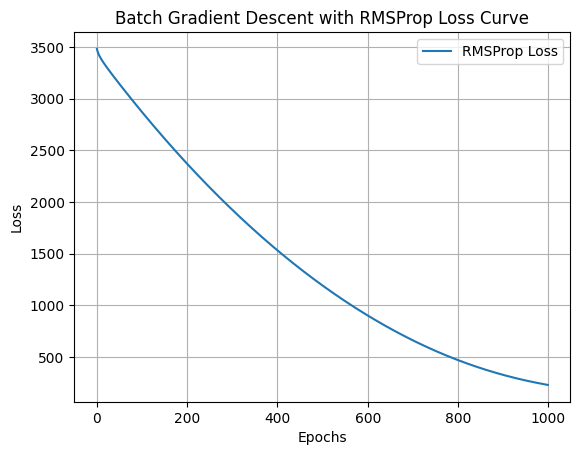

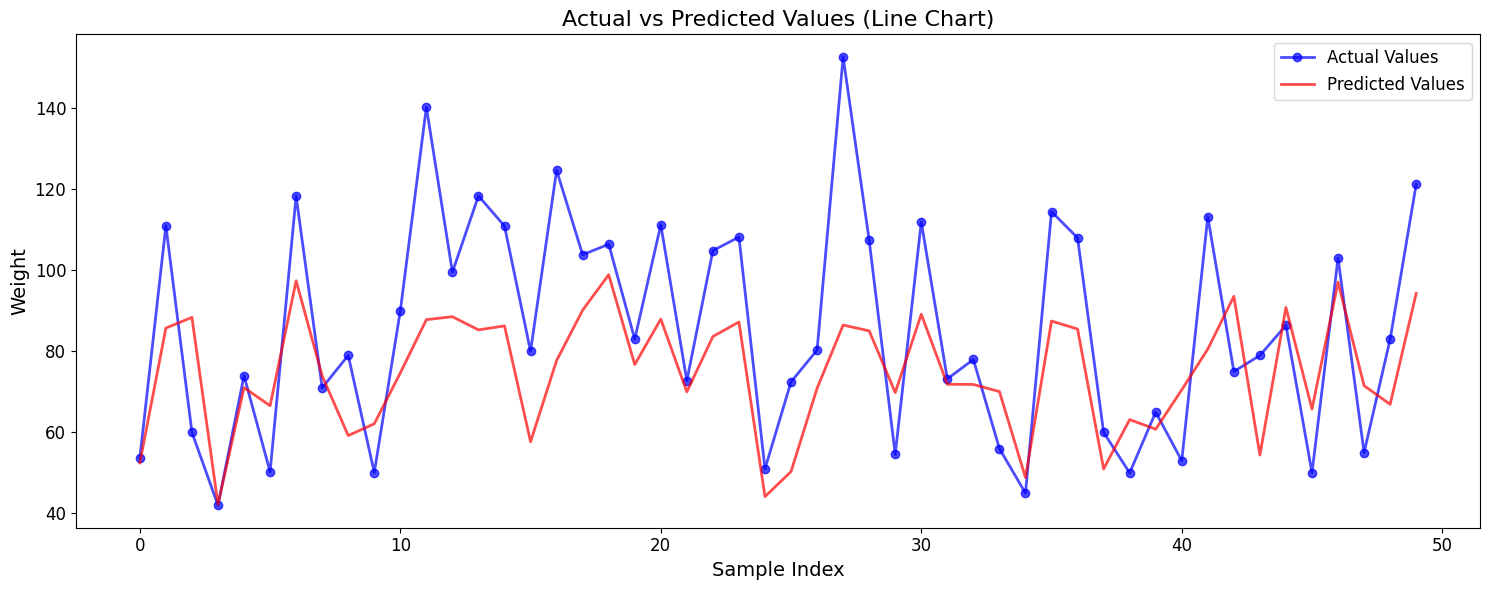

In [ ]:
# Add bias and convert to NumPy arrays
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train].astype(float)
X_eval_b = np.c_[np.ones((X_eval.shape[0], 1)), X_eval].astype(float)
y_train = y_train.reshape(-1, 1).astype(float)  # Reshape thành vector cột
y_eval = y_eval.reshape(-1, 1).astype(float)    # Reshape thành vector cột

# Initialize parameters and RMSProp optimizer
initial_theta = np.ones((X_train_b.shape[1], 1))
learning_rate = 0.01
rho = 0.9
rmsprop_optimizer = RMSprop(learning_rate=learning_rate, rho=rho)

max_epochs = 1000
# Train model using Batch Gradient Descent with RMSProp
theta_rmsprop, losses_rmsprop, logs = batch_gradient_descent_with_rmsprop(
    X_train_b, y_train, theta=initial_theta, optimizer=rmsprop_optimizer, epochs=max_epochs
)

for log in logs:
    print(f"Epoch {log['epoch']}, Loss: {log['loss']:.4f}, Weights (first 5): {log['weights']}, Bias: {log['bias']:.4f}")

# Predictions and evaluation
y_pred_rmsprop = np.dot(X_eval_b, theta_rmsprop)
mse_rmsprop = mean_squared_error(y_eval, y_pred_rmsprop)
print(f"RMSProp MSE: {mse_rmsprop:.4f}")

# Plot loss curve
plt.plot(range(len(losses_rmsprop)), losses_rmsprop, label='RMSProp Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent with RMSProp Loss Curve')
plt.legend()
plt.grid()
plt.show()

# Chọn một số lượng mẫu để hiển thị
num_samples = 50  # Số lượng mẫu cần hiển thị
indices = np.arange(num_samples)  # Tạo chỉ số mẫu
y_eval_subset = y_eval[:num_samples].flatten()  # Giá trị thực tế
y_pred_subset = y_pred_rmsprop[:num_samples].flatten()  # Giá trị dự đoán

# Vẽ biểu đồ đường
plt.figure(figsize=(15, 6))
plt.plot(indices, y_eval_subset, label="Actual Values", color="blue", linewidth=2, marker='o', alpha=0.7)
plt.plot(indices, y_pred_subset, label="Predicted Values", color="red", linewidth=2, alpha=0.7)

# Thêm tiêu đề và nhãn
plt.title("Actual vs Predicted Values (Line Chart)", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Plot actual vs predicted values
# plt.figure(figsize=(10, 8))
# plt.scatter(range(len(y_eval)), y_eval, color="blue", label="Actual Values", alpha=0.7)
# plt.scatter(range(len(y_eval)), y_pred_rmsprop, color="red", label="Predicted Values", alpha=0.7)
# plt.xlabel("Sample Index")
# plt.ylabel("Weight")
# plt.title("Actual vs Predicted Values (RMSProp)")
# plt.legend()
# plt.show()

##5)	Adam (Adaptive Moment Estimation)##

In [ ]:
# Adam Optimizer Class
class Adam:
    """Adam - Adaptive Moment Estimation
    Parameters:
    -----------
    learning_rate: float = 0.001
        The step length used when following the negative gradient.
    beta_1: float = 0.9
        The exponential decay rate for the 1st moment estimates.
    beta_2: float = 0.999
        The exponential decay rate for the 2nd moment estimates.
    epsilon: float = 1e-07
        A small floating point value to avoid zero denominator.
    """
    def __init__(self, learning_rate: float = 0.001, beta_1: float = 0.9, beta_2: float = 0.999, epsilon: float = 1e-7) -> None:
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2

        self.t = 0
        self.m = None  # Decaying averages of past gradients
        self.v = None  # Decaying averages of past squared gradients

    def update(self, w: np.ndarray, grad_wrt_w: np.ndarray) -> np.ndarray:
        self.t += 1
        if self.m is None:
            self.m = np.zeros(np.shape(grad_wrt_w))
            self.v = np.zeros(np.shape(grad_wrt_w))

        self.m = self.beta_1 * self.m + (1 - self.beta_1) * grad_wrt_w
        self.v = self.beta_2 * self.v + (1 - self.beta_2) * np.power(grad_wrt_w, 2)

        m_hat = self.m / (1 - self.beta_1**self.t)
        v_hat = self.v / (1 - self.beta_2**self.t)

        w_update = self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

        return w - w_update


# Batch Gradient Descent with Adam
def batch_gradient_descent_with_adam(X, y, theta, optimizer, epochs=1000, log_epochs = 100):
    m = y.size
    losses = []
    logs = []
    for epoch in range(epochs):
        # Compute predictions
        y_hat = np.dot(X, theta)

        # Compute gradient
        gradient = (1 / m) * np.dot(X.T, (y_hat - y))

        # Update weights using Adam optimizer
        theta = optimizer.update(theta, gradient)

        # Compute loss (MSE)
        loss = (1 / (2 * m)) * np.sum((y_hat - y) ** 2)
        losses.append(loss)

        # Lưu log tại các epoch cụ thể
        if epoch % log_epochs == 0 or epoch == epochs - 1:
            logs.append({
                "epoch": epoch,
                "loss": loss,
                "weights": theta[1:6].flatten().tolist(),  # Lưu 5 trọng số đầu tiên
                "bias": theta[0, 0]  # Lưu bias
            })

    return theta, losses, logs

Epoch 0, Loss: 3480.1603, Weights (first 5): [1.009999999976047, 1.0099999998494715, 1.009999999898659, 1.009999999985675, 1.009999999986267], Bias: 1.0100
Epoch 100, Loss: 2922.4155, Weights (first 5): [1.9931076533670742, 1.9668647110272306, 1.9841855931674357, 1.9942238532006014, 1.9943846872113715], Bias: 1.9945
Epoch 200, Loss: 2442.0056, Weights (first 5): [2.929051715702385, 2.7982582260185853, 2.890054739895997, 2.934606314201739, 2.9352045535781612], Bias: 2.9357
Epoch 300, Loss: 2030.4442, Weights (first 5): [3.815877223626445, 3.494390878222327, 3.7317739242789667, 3.8297757567711854, 3.8307539939126953], Bias: 3.8319
Epoch 400, Loss: 1679.6841, Weights (first 5): [4.652675289371403, 4.056571286170887, 4.510940073771308, 4.679512627241682, 4.680506124085824], Bias: 4.6827
Epoch 500, Loss: 1382.6929, Weights (first 5): [5.438324424279681, 4.494210302621599, 5.224789017861423, 5.483530932915516, 5.483929846968071], Bias: 5.4875
Epoch 600, Loss: 1133.2358, Weights (first 5): [6

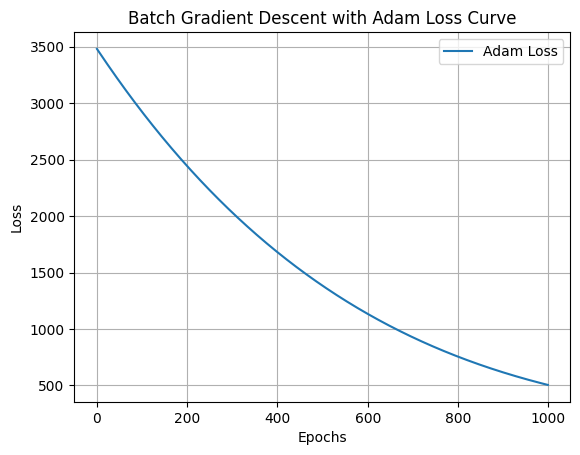

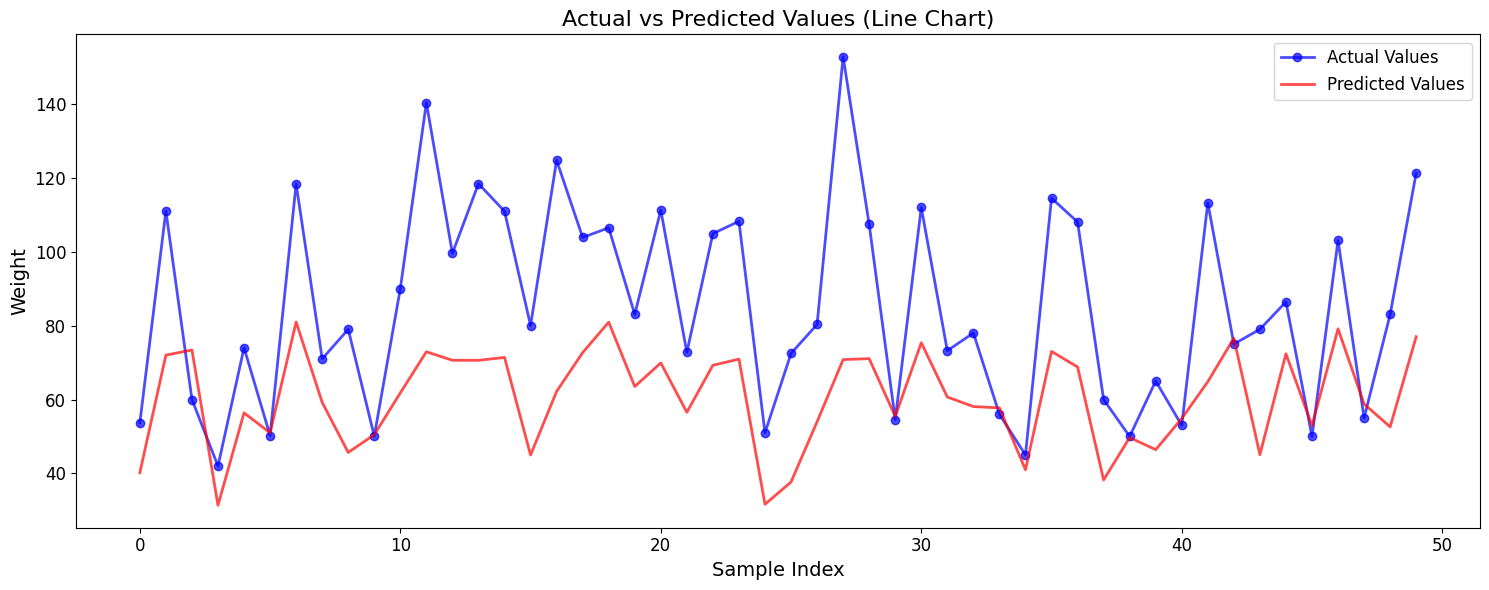

In [ ]:
# Add bias term and convert data to NumPy arrays
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train].astype(float)
X_eval_b = np.c_[np.ones((X_eval.shape[0], 1)), X_eval].astype(float)
y_train = y_train.reshape(-1, 1).astype(float)
y_eval = y_eval.reshape(-1, 1).astype(float)


# Initialize parameters and Adam optimizer
initial_theta = np.ones((X_train_b.shape[1], 1))
learning_rate = 0.01
adam_optimizer = Adam(learning_rate=learning_rate)

max_epochs = 1000
# Train model using Batch Gradient Descent with Adam
theta_adam, losses_adam, logs = batch_gradient_descent_with_adam(
    X_train_b, y_train, theta=initial_theta, optimizer=adam_optimizer, epochs=max_epochs
)

for log in logs:
    print(f"Epoch {log['epoch']}, Loss: {log['loss']:.4f}, Weights (first 5): {log['weights']}, Bias: {log['bias']:.4f}")

# Predictions and evaluation
y_pred_adam = np.dot(X_eval_b, theta_adam)
mse_adam = mean_squared_error(y_eval, y_pred_adam)
print(f"Adam MSE: {mse_adam:.4f}")

# Plot loss curve
plt.plot(range(len(losses_adam)), losses_adam, label='Adam Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Batch Gradient Descent with Adam Loss Curve')
plt.legend()
plt.grid()
plt.show()

# Chọn một số lượng mẫu để hiển thị
num_samples = 50  # Số lượng mẫu cần hiển thị
indices = np.arange(num_samples)  # Tạo chỉ số mẫu
y_eval_subset = y_eval[:num_samples].flatten()  # Giá trị thực tế
y_pred_subset = y_pred_adam[:num_samples].flatten()  # Giá trị dự đoán

# Vẽ biểu đồ đường
plt.figure(figsize=(15, 6))
plt.plot(indices, y_eval_subset, label="Actual Values", color="blue", linewidth=2, marker='o', alpha=0.7)
plt.plot(indices, y_pred_subset, label="Predicted Values", color="red", linewidth=2, alpha=0.7)

# Thêm tiêu đề và nhãn
plt.title("Actual vs Predicted Values (Line Chart)", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Weight", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# Plot actual vs predicted values
# plt.figure(figsize=(10, 8))
# plt.scatter(range(len(y_eval)), y_eval, color="blue", label="Actual Values", alpha=0.7)
# plt.scatter(range(len(y_eval)), y_pred_adam, color="red", label="Predicted Values", alpha=0.7)
# plt.xlabel("Sample Index")
# plt.ylabel("Weight")
# plt.title("Actual vs Predicted Values (Adam)")
# plt.legend()
# plt.show()

##Compare them(MSE, Convergence rate of methods)##

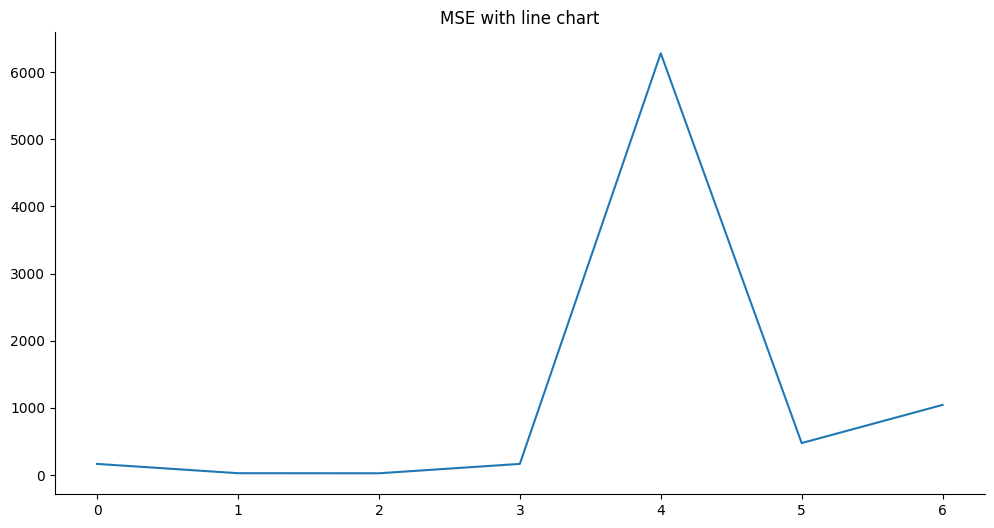

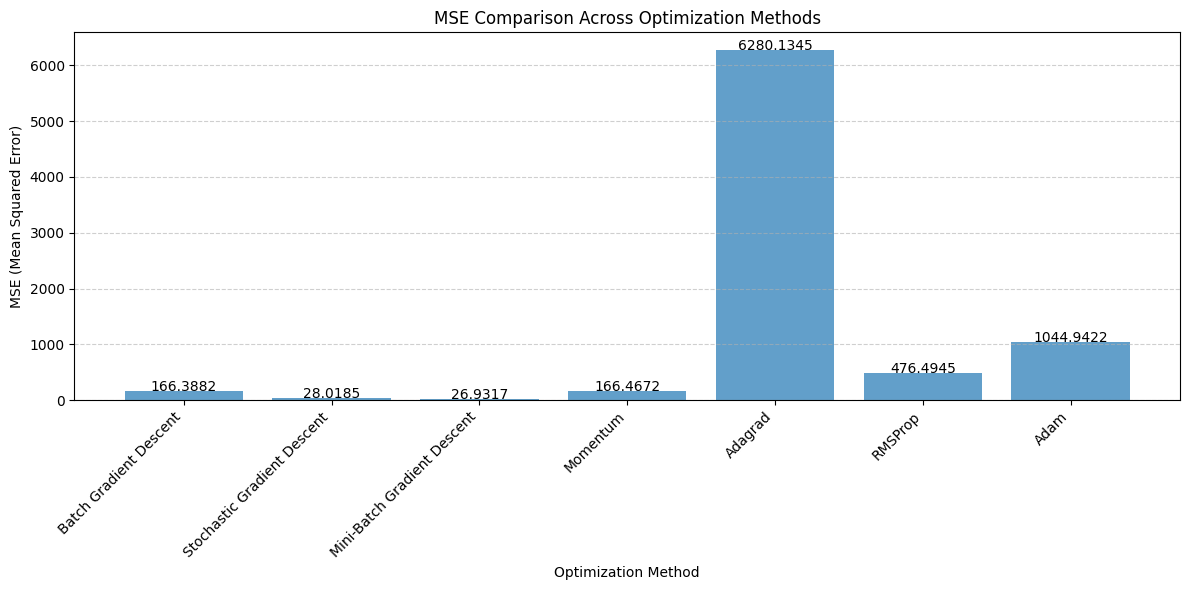

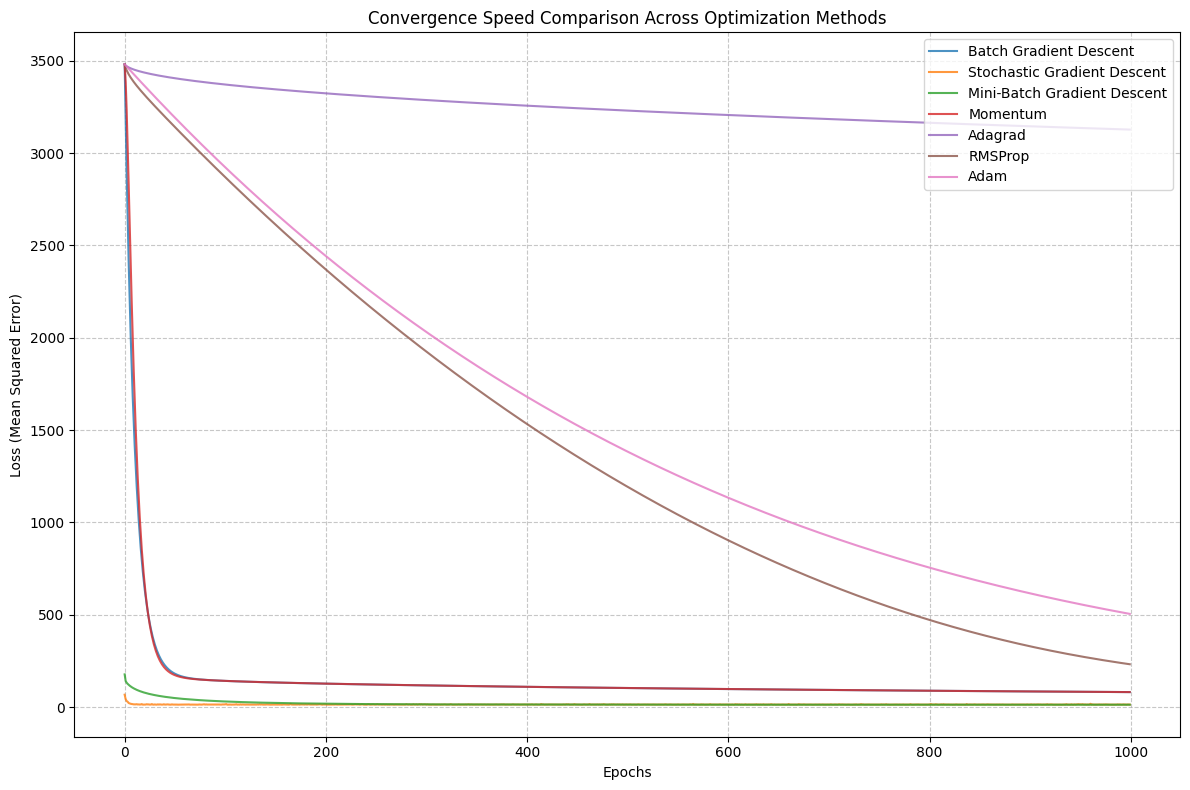

In [ ]:
# Data for visualization
methods = [
    "Batch Gradient Descent",
    "Stochastic Gradient Descent",
    "Mini-Batch Gradient Descent",
    "Momentum",
    "Adagrad",
    "RMSProp",
    "Adam"
]
mse_values = [
    round(mse_batch, 4),
    round(mse_sgd, 4),
    round(mse_mbgd, 4),
    round(mse_momentum, 4),
    round(mse_adagrad, 4),
    round(mse_rmsprop, 4),
    round(mse_adam, 4)
]

# Function to plot MSE comparison as a bar chart
def plot_mse_comparison(methods, mse_values):
    plt.figure(figsize=(12, 6))
    bars = plt.bar(methods, mse_values, alpha=0.7)

    # Add data labels on top of each bar
    for bar, value in zip(bars, mse_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.001, str(value), ha='center', fontsize=10)

    # Chart formatting
    plt.xlabel("Optimization Method")
    plt.ylabel("MSE (Mean Squared Error)")
    plt.title("MSE Comparison Across Optimization Methods")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Function to plot convergence speed comparison
def plot_convergence_speed(losses_dict):
    plt.figure(figsize=(12, 8))

    for method, losses in losses_dict.items():
        plt.plot(range(len(losses)), losses, label=method, alpha=0.8)

    # Chart formatting
    plt.xlabel("Epochs")
    plt.ylabel("Loss (Mean Squared Error)")
    plt.title("Convergence Speed Comparison Across Optimization Methods")
    plt.legend(loc="upper right")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Prepare data for convergence speed comparison
losses_dict = {
    "Batch Gradient Descent": losses,
    "Stochastic Gradient Descent": losses_sgd,
    "Mini-Batch Gradient Descent": losses_mbgd,
    "Momentum": losses_momentum,
    "Adagrad": losses_adagrad,
    "RMSProp": losses_rmsprop,
    "Adam": losses_adam
}

#Plot MSE with line chart
results = {"Method": methods, "MSE with line chart": mse_values}
results_df = pd.DataFrame(results)
_df_26 = results_df
_df_26['MSE with line chart'].plot(kind='line', figsize=(12, 6), title='MSE with line chart')
plt.gca().spines[['top', 'right']].set_visible(False)

# Consolidate MSE results into a DataFrame and display
# def display_mse_results(methods, mse_values):
#     results = {"Method": methods, "MSE": mse_values}
#     results_df = pd.DataFrame(results)

#     # Print DataFrame
#     print("Optimization Method MSE Comparison:")
#     print(results_df)

#     # Display in notebook
#     from IPython.display import display
#     display(results_df)

# Call the functions
plot_mse_comparison(methods, mse_values)
plot_convergence_speed(losses_dict)
#display_mse_results(methods, mse_values)


#Question 2 (with original features)#



##Uninstall Libraries

In [ ]:
!pip uninstall fredapi -y
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.17.1
Uninstalling tensorflow-2.17.1:
  Successfully uninstalled tensorflow-2.17.1


##Download Libraries

In [ ]:
!pip install fredapi
!pip install tensorflow==2.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.1 MB/s eta 0:00:00


##Import Libraries

In [ ]:
from tensorflow.keras.models import Model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation,SimpleRNN,concatenate,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import yfinance as yf
from fredapi import Fred

##Data preparation

In [ ]:
# ---------------------- Bước 1: Lấy dữ liệu cổ phiếu Apple ----------------------
stock = yf.Ticker("AAPL")
data_cau2a = yf.download('AAPL', start='2020-01-01', end='2024-12-01')

# Thêm các đặc trưng về thời gian
data_cau2a['Year'] = data_cau2a.index.year
data_cau2a['Month'] = data_cau2a.index.month
data_cau2a['Day'] = data_cau2a.index.day
data_cau2a['Weekday'] = data_cau2a.index.weekday  # 0: Monday, 1: Tuesday, ..., 6: Sunday

data_cau2a['Industry'] = 'Technology'
data_cau2a

[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2020-01-02   72.796013   75.087502   75.150002   73.797501   74.059998   
2020-01-03   72.088287   74.357498   75.144997   74.125000   74.287498   
2020-01-06   72.662720   74.949997   74.989998   73.187500   73.447502   
2020-01-07   72.320984   74.597504   75.224998   74.370003   74.959999   
2020-01-08   73.484337   75.797501   76.110001   74.290001   74.290001   
...                ...         ...         ...         ...         ...   
2024-11-22  229.869995  229.869995  230.720001  228.059998  228.059998   
2024-11-25  232.869995  232.869995  233.250000  229.740005  231.460007   
2024-11-26  235.059998  235.059998  235.570007  233.330002  233.330002   
2024-11-27  234.929993  234.929993  235.690002  233.809998  234.470001   
2024-11-29  237.330002  237.330002  237.809998  233.970001  234.809998   

Price          Volume  Year Month Day Weekday    Industry  
Ticker           AAPL                                      
Date                                                       
2020-01-02  135480400  2020     1   2       3  Technology  
2020-01-03  146322800  2020     1   3       4  Technology  
2020-01-06  118387200  2020     1   6       0  Technology  
2020-01-07  108872000  2020     1   7       1  Technology  
2020-01-08  132079200  2020     1   8       2  Technology  
...               ...   ...   ...  ..     ...         ...  
2024-11-22   38168300  2024    11  22       4  Technology  
2024-11-25   90152800  2024    11  25       0  Technology  
2024-11-26   45986200  2024    11  26       1  Technology  
2024-11-27   33498400  2024    11  27       2  Technology  
2024-11-29   28481400  2024    11  29       4  Technology  

[1237 rows x 11 columns]

##Data Preprocess

In [ ]:
# Sao chép dữ liệu gốc để xử lý
data_cau2a_copy = data_cau2a.copy()

# Tách dữ liệu đầu vào (X) và đầu ra (y)
X = data_cau2a_copy.drop('Open', axis=1)  # Loại bỏ cột target (Open) khỏi X
y = data_cau2a_copy['Open']  # Dữ liệu đầu ra (Open)

#Gán một số nguyên cho mỗi giá trị duy nhất trong Industry
le = LabelEncoder()
X['Industry'] = le.fit_transform(X['Industry'])

# Chỉ định các biến liên tục
continuous_vars = ['Adj Close','Close','High','Low','Volume']

# Chuẩn hóa các biến liên tục
scaler = StandardScaler()
X[continuous_vars] = scaler.fit_transform(X[continuous_vars])
print("X:")
print(X.head())
y = scaler.fit_transform(y.values.reshape(-1, 1)) # Reshape y before scaling
y = pd.DataFrame(y, columns=['Open'], index=data_cau2a_copy.index) # Convert y back to DataFrame
print("y:")
print(y.head())

X:
Price      Adj Close     Close      High       Low    Volume  Year Month Day  \
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL                   
Date                                                                           
2020-01-02 -1.923736 -1.938235 -1.968477 -1.937101  0.828859  2020     1   2   
2020-01-03 -1.941213 -1.956514 -1.968602 -1.928860  1.032368  2020     1   3   
2020-01-06 -1.927028 -1.941678 -1.972469 -1.952451  0.508025  2020     1   6   
2020-01-07 -1.935467 -1.950505 -1.966606 -1.922694  0.329428  2020     1   7   
2020-01-08 -1.906739 -1.920456 -1.944524 -1.924707  0.765020  2020     1   8   

Price      Weekday Industry  
Ticker                       
Date                         
2020-01-02       3        0  
2020-01-03       4        0  
2020-01-06       0        0  
2020-01-07       1        0  
2020-01-08       2        0  
y:
                Open
Date                
2020-01-02 -1.961557
2020-01-03 -1.955857
2020-01-06 -1.976903
2020-01-

##Data Proprocess

In [ ]:
def create_combined_dataset(data_x, data_y, time_step=60):
    x_seq, x_cur, y_out = [], [], []
    for i in range(time_step, len(data_x)):
        # Dữ liệu tuần tự: Giá Open của 60 ngày trước
        x_seq.append(data_y['Open'].values[i-time_step:i])
        # Dữ liệu hiện tại: Các đặc trưng khác tại ngày i
        x_cur.append(data_x.iloc[i].values)
        # Dữ liệu đầu ra: Giá Open tại ngày i
        y_out.append(data_y['Open'].values[i])
    return np.array(x_seq), np.array(x_cur), np.array(y_out)

# Gọi hàm để tạo tập dữ liệu
time_step = 60
x_seq_data, x_cur_data, y_data = create_combined_dataset(X, y, time_step)

x_seq_data.shape, x_cur_data.shape, y_data.shape

((1177, 60), (1177, 10), (1177,))

##Split train/test dataset

In [ ]:
train_size = int(len(x_seq_data) * 0.8)
x_seq_train, x_seq_test = x_seq_data[:train_size], x_seq_data[train_size:]
x_cur_train, x_cur_test = x_cur_data[:train_size], x_cur_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Kiểm tra kích thước dữ liệu
print("x_seq_train shape:", x_seq_train.shape)  # Dữ liệu tuần tự
print("x_cur_train shape:", x_cur_train.shape)  # Dữ liệu đặc trưng hiện tại
print("y_train shape:", y_train.shape)          # Dữ liệu đầu ra
print("x_seq_test shape:", x_seq_test.shape)
print("x_cur_test shape:", x_cur_test.shape)
print("y_test shape:", y_test.shape)

x_seq_train shape: (941, 60)
x_cur_train shape: (941, 10)
y_train shape: (941,)
x_seq_test shape: (236, 60)
x_cur_test shape: (236, 10)
y_test shape: (236,)


##Feedforward Neural Network

In [ ]:
# Chuẩn bị dữ liệu cho FFNN
def prepare_ffnn_data(x_seq, x_cur, y):
    # x_seq: (samples, 60) - Giá trị Open của 60 ngày trước
    # x_cur: (samples, số đặc trưng) - Các đặc trưng hiện tại
    # y: (samples,) - Giá trị Open của ngày hiện tại
    x_combined = np.hstack((x_seq, x_cur))  # Kết hợp x_seq và x_cur
    return x_combined, y

# Chuẩn bị dữ liệu
x_ffnn_train, y_ffnn_train = prepare_ffnn_data(x_seq_train.reshape(x_seq_train.shape[0], -1),
                                               x_cur_train, y_train)
x_ffnn_test, y_ffnn_test = prepare_ffnn_data(x_seq_test.reshape(x_seq_test.shape[0], -1),
                                             x_cur_test, y_test)

###Task 1: Experiment

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=x_ffnn_train.shape[1], activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'Adam', loss = tf.keras.losses.MeanSquaredError(),metrics=['mae'])
model.fit(x_ffnn_train, y_ffnn_train, validation_data=(x_ffnn_test, y_ffnn_test), epochs=50, batch_size=16, verbose=1)

# Dự đoán
y_pred = model.predict(x_ffnn_test)

# Đảo ngược chuẩn hóa y_pred và y_eval để trả về giá trị gốc
y_pred_original = scaler.inverse_transform(y_pred)  # Dự đoán (gốc)
y_eval_original = scaler.inverse_transform(y_ffnn_test.reshape(-1, 1))  # Giá trị thực tế (gốc)

# Tính toán các chỉ số đánh giá
mse_ffnn = mean_squared_error(y_eval_original, y_pred_original)
mae_ffnn = mean_absolute_error(y_eval_original, y_pred_original)
r2_ffnn = r2_score(y_eval_original, y_pred_original)

# In kết quả
print(f"Mean Squared Error (MSE): {mse_ffnn}")
print(f"Mean Absolute Error (MAE): {mae_ffnn}")
print(f"R^2 Score: {r2_ffnn}")

# # Hiệu suất trên tập huấn luyện
# y_train_pred = model.predict(X_train)
# y_train_pred_original = scaler.inverse_transform(y_train_pred)
# y_train_original = scaler.inverse_transform(y_train)

# mse_train = mean_squared_error(y_train_original, y_train_pred_original)
# mae_train = mean_absolute_error(y_train_original, y_train_pred_original)
# r2_train = r2_score(y_train_original, y_train_pred_original)

# print(f"Train MSE: {mse_train}")
# print(f"Train MAE: {mae_train}")
# print(f"Train R^2: {r2_train}")

# # Vẽ đồ thị loss và mae trong quá trình đào tạo
# plt.figure(figsize=(12, 5))

# # Loss
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss During Training')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # MAE
# plt.subplot(1, 2, 2)
# plt.plot(history.history['mae'], label='Training MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')
# plt.title('MAE During Training')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Absolute Error')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Chỉ lấy 100 mẫu đầu tiên
# num_samples =  100  # Số lượng mẫu muốn hiển thị
# y_eval_subset = y_eval_original[:num_samples]  # 100 giá trị thực tế
# y_pred_subset = y_pred_original[:num_samples]  # 100 giá trị dự đoán

# # Vẽ biểu đồ
# plt.figure(figsize=(12, 6))
# plt.plot(y_eval_original, label='True Values', color='blue')
# plt.plot(y_pred_original, label='Predicted Values', color='orange')
# plt.title('True vs Predicted Values (200 Samples)')
# plt.xlabel('Sample Index')
# plt.ylabel('Open Price')
# plt.legend()
# plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 4936.4800 - mae: 42.9923 - val_loss: 6.0323 - val_mae: 2.3913
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9983 - mae: 0.8025 - val_loss: 0.6735 - val_mae: 0.6971
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1584 - mae: 0.3123 - val_loss: 0.2546 - val_mae: 0.4285
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1099 - mae: 0.2618 - val_loss: 0.1528 - val_mae: 0.3304
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0970 - mae: 0.2450 - val_loss: 0.1405 - val_mae: 0.3170
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0825 - mae: 0.2267 - val_loss: 0.1297 - val_mae: 0.3039
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0799 - mae: 0.2283 - val_loss: 0.1212 - val_mae: 0.2940
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0759 - mae: 0.2166 - val_loss: 0.1210 - val_mae: 0.2925
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0748 - m

###Task 2: Apply techniques to prevent overfitting and plot training graphs

####EarlyStopping

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1190.6265 - mae: 23.1326 - val_loss: 1.5160 - val_mae: 1.1607
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2195 - mae: 0.9053 - val_loss: 0.1605 - val_mae: 0.3257
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1786 - mae: 0.3519 - val_loss: 0.1528 - val_mae: 0.3149
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1553 - mae: 0.3253 - val_loss: 0.1729 - val_mae: 0.3326
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1391 - mae: 0.2996 - val_loss: 0.1208 - val_mae: 0.2778
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1217 - mae: 0.2868 - val_loss: 0.1193 - val_mae: 0.2751
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1294 - mae: 0.2923 - val_loss: 0.1047 - val_mae: 0.2568
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0956 - mae: 0.2518 - val_loss: 0.1328 - val_mae: 0.2907
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1032 - mae: 0.25

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Squared Error (MSE): 17.663273187486407
Mean Absolute Error (MAE): 3.2878561504816606
R^2 Score: 0.9657291955629429


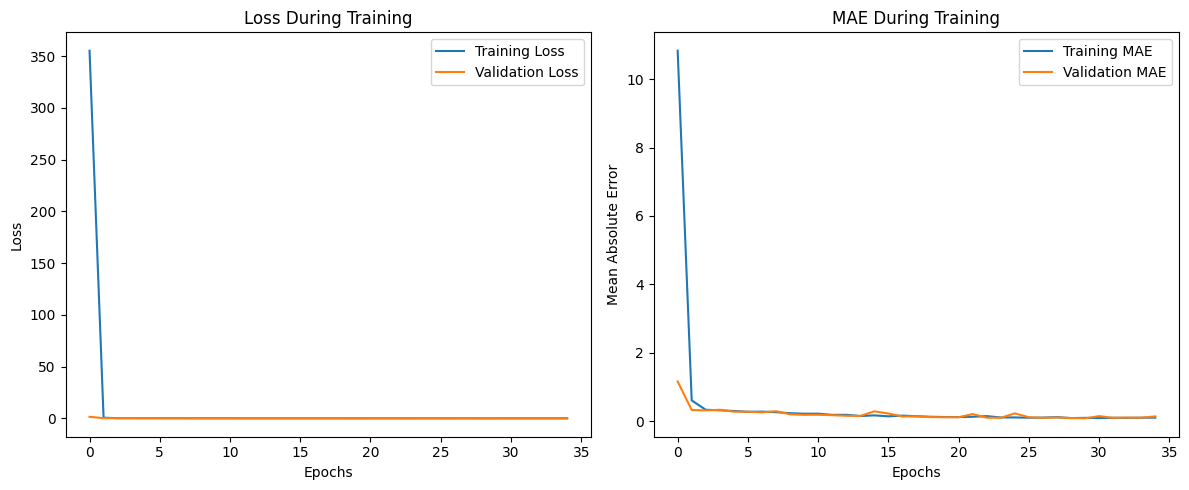

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=x_ffnn_train.shape[1], activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'Adam', loss = tf.keras.losses.MeanSquaredError(),metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_ffnn_train, y_ffnn_train, validation_data=(x_ffnn_test, y_ffnn_test), epochs=50, batch_size=16, verbose=1,callbacks=[early_stopping])

# Dự đoán
y_pred = model.predict(x_ffnn_test)

# Đảo ngược chuẩn hóa y_pred và y_eval để trả về giá trị gốc
y_pred_original = scaler.inverse_transform(y_pred)  # Dự đoán (gốc)
y_eval_original = scaler.inverse_transform(y_ffnn_test.reshape(-1, 1))  # Giá trị thực tế (gốc)

# Tính toán các chỉ số đánh giá
mse_ffnn_early = mean_squared_error(y_eval_original, y_pred_original)
mae_ffnn_early = mean_absolute_error(y_eval_original, y_pred_original)
r2_ffnn_early = r2_score(y_eval_original, y_pred_original)

# In kết quả
print(f"Mean Squared Error (MSE): {mse_ffnn_early}")
print(f"Mean Absolute Error (MAE): {mae_ffnn_early}")
print(f"R^2 Score: {r2_ffnn_early}")

# # Hiệu suất trên tập huấn luyện
# y_train_pred = model.predict(X_train)
# y_train_pred_original = scaler.inverse_transform(y_train_pred)
# y_train_original = scaler.inverse_transform(y_train)

# mse_train = mean_squared_error(y_train_original, y_train_pred_original)
# mae_train = mean_absolute_error(y_train_original, y_train_pred_original)
# r2_train = r2_score(y_train_original, y_train_pred_original)

# print(f"Train MSE: {mse_train}")
# print(f"Train MAE: {mae_train}")
# print(f"Train R^2: {r2_train}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####Dropout (remove neurons)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error (MSE): 195.74513336406307
Mean Absolute Error (MAE): 11.434648481466002
R^2 Score: 0.6202095096520388


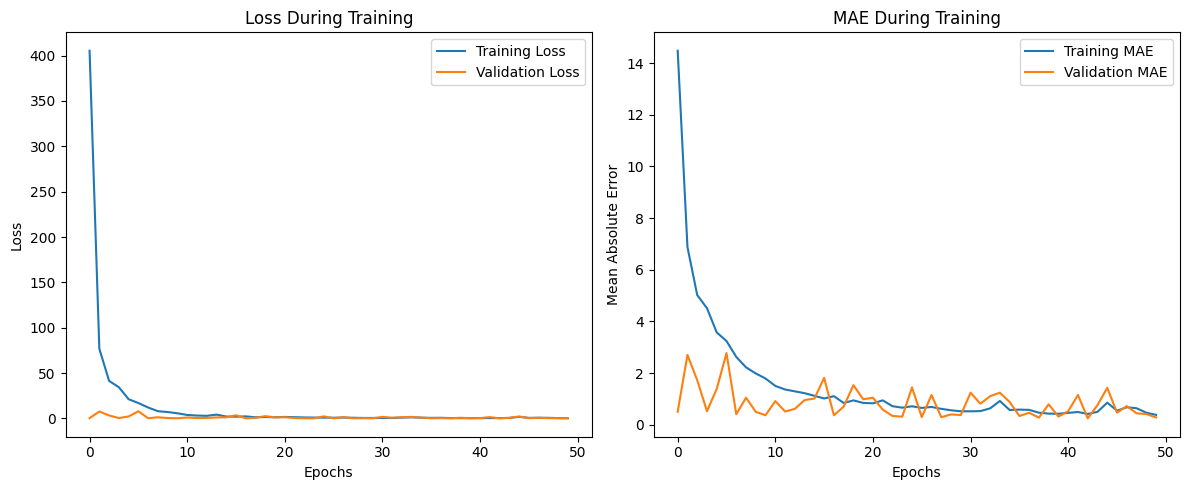

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=x_ffnn_train.shape[1], activation='relu'))
model.add(Dropout(0.1))  # Loại bỏ 10% nơ-ron
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mae'])

history = model.fit(x_ffnn_train, y_ffnn_train, validation_data=(x_ffnn_test, y_ffnn_test), epochs=50, batch_size=16, verbose=0)

# Dự đoán
y_pred = model.predict(x_ffnn_test)

# Đảo ngược chuẩn hóa y_pred và y_eval để trả về giá trị gốc
y_pred_original = scaler.inverse_transform(y_pred)  # Dự đoán (gốc)
y_eval_original = scaler.inverse_transform(y_ffnn_test.reshape(-1, 1))  # Giá trị thực tế (gốc)

# Tính toán các chỉ số đánh giá
mse_ffnn_drop = mean_squared_error(y_eval_original, y_pred_original)
mae_ffnn_drop = mean_absolute_error(y_eval_original, y_pred_original)
r2_ffnn_drop = r2_score(y_eval_original, y_pred_original)

# In kết quả
print(f"Mean Squared Error (MSE): {mse_ffnn_drop}")
print(f"Mean Absolute Error (MAE): {mae_ffnn_drop}")
print(f"R^2 Score: {r2_ffnn_drop}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####L2 Regularization (Weight constraint number)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error (MSE): 17.11163213858539
Mean Absolute Error (MAE): 3.206359475345935
R^2 Score: 0.966799505822297


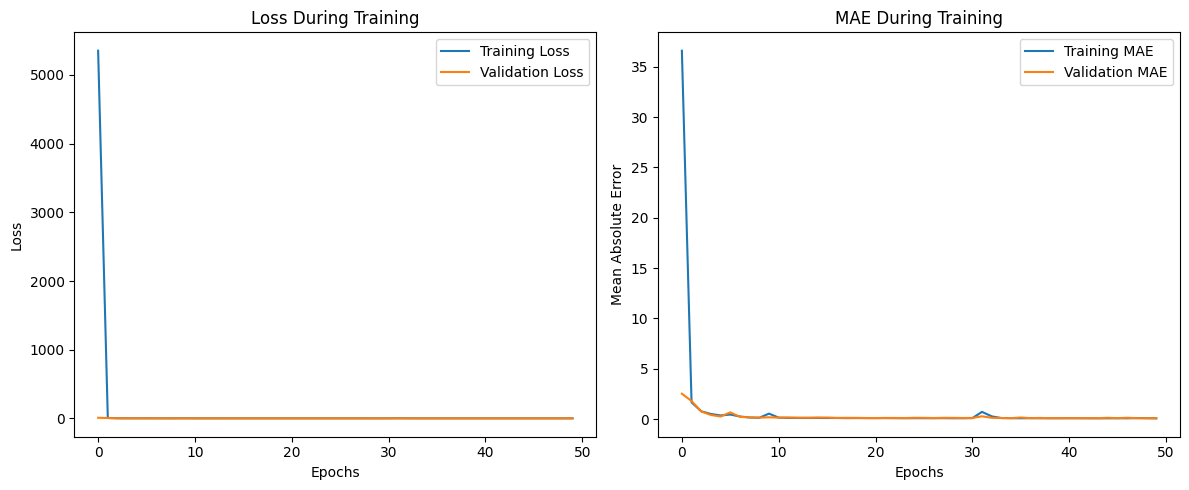

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=x_ffnn_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1))
model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mae'])
history = model.fit(x_ffnn_train, y_ffnn_train, validation_data=(x_ffnn_test, y_ffnn_test), epochs=50, batch_size=16, verbose=0)

# Dự đoán
y_pred = model.predict(x_ffnn_test)

# Đảo ngược chuẩn hóa y_pred và y_eval để trả về giá trị gốc
y_pred_original = scaler.inverse_transform(y_pred)  # Dự đoán (gốc)
y_eval_original = scaler.inverse_transform(y_ffnn_test.reshape(-1, 1))  # Giá trị thực tế (gốc)

# Tính toán các chỉ số đánh giá
mse_ffnn_l2 = mean_squared_error(y_eval_original, y_pred_original)
mae_ffnn_l2 = mean_absolute_error(y_eval_original, y_pred_original)
r2_ffnn_l2 = r2_score(y_eval_original, y_pred_original)

# In kết quả
print(f"Mean Squared Error (MSE): {mse_ffnn_l2}")
print(f"Mean Absolute Error (MAE): {mae_ffnn_l2}")
print(f"R^2 Score: {r2_ffnn_l2}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####Compare

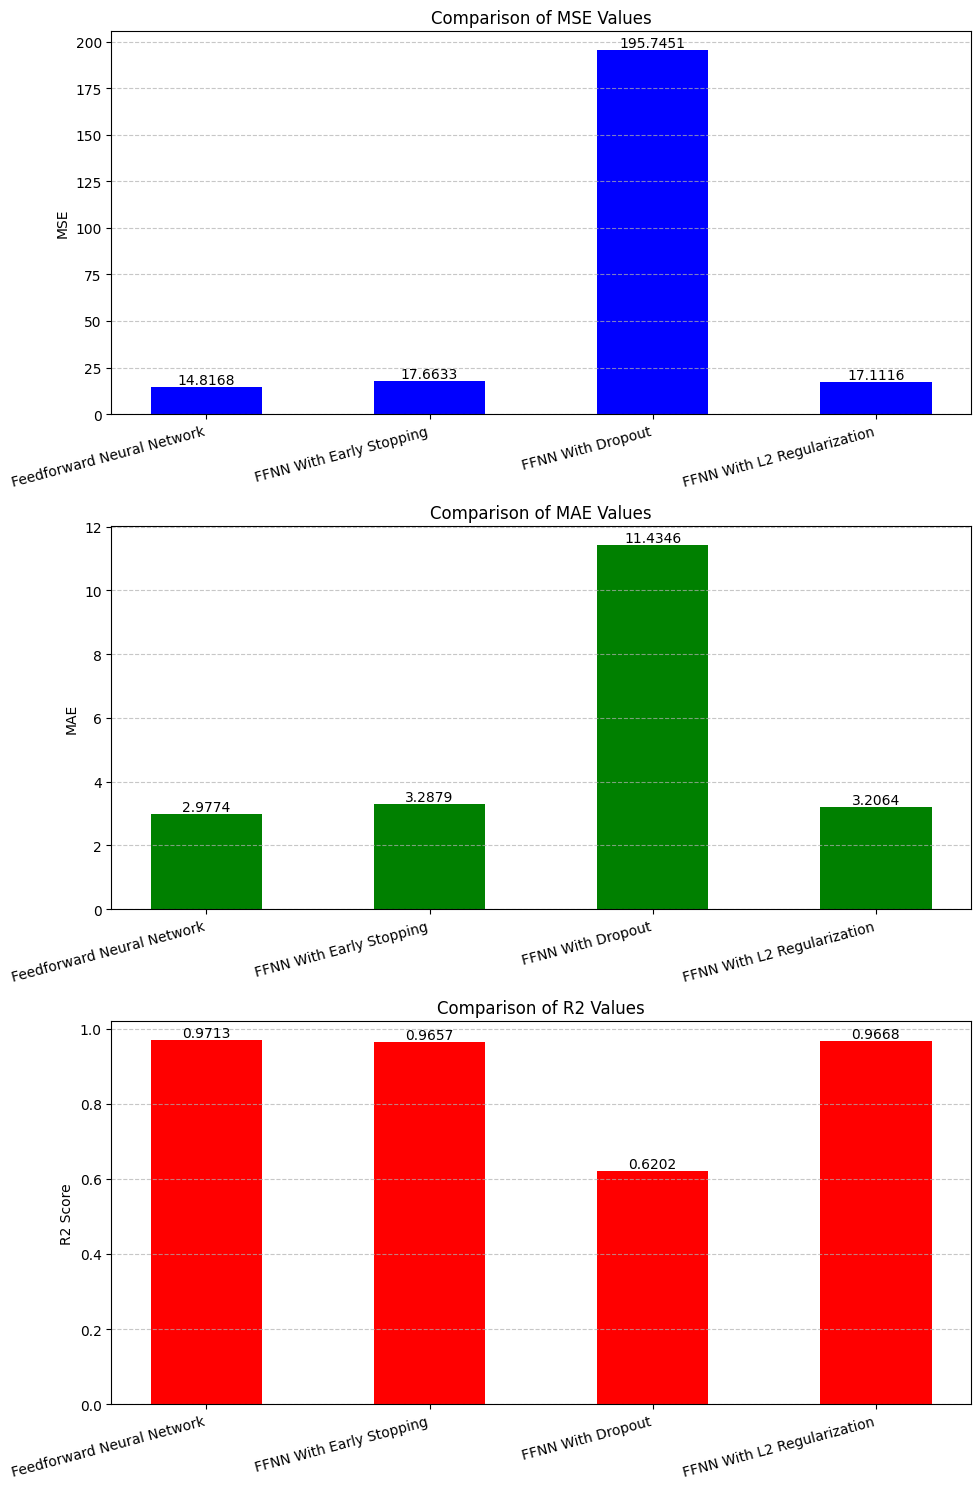

In [ ]:
# Data for visualization
methods = [
    "Feedforward Neural Network",
    "FFNN With Early Stopping",
    "FFNN With Dropout",
    "FFNN With L2 Regularization"
]
mse_values = [
    round(mse_ffnn, 4),
    round(mse_ffnn_early, 4),
    round(mse_ffnn_drop, 4),
    round(mse_ffnn_l2, 4)
]

mae_values = [
    round(mae_ffnn, 4),
    round(mae_ffnn_early, 4),
    round(mae_ffnn_drop, 4),
    round(mae_ffnn_l2, 4)
]

r2_values = [
    round(r2_ffnn, 4),
    round(r2_ffnn_early, 4),
    round(r2_ffnn_drop, 4),
    round(r2_ffnn_l2, 4)
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##Recurrent Neural Network (RNN)

###Task 1: Experiment

In [ ]:
# ---------------------- 1. Xây dựng mô hình ----------------------

# Đầu vào 1: Giá trị Open của 60 ngày trước (chuỗi thời gian)
seq_input = Input(shape=(x_seq_train.shape[1], 1), name="Sequence_Input")
rnn_output = SimpleRNN(64, activation='relu', return_sequences=True)(seq_input)
rnn_output = SimpleRNN(32, activation='relu', return_sequences=False)(rnn_output)

# Đầu vào 2: Các đặc trưng ngày hiện tại (phi chuỗi)
cur_input = Input(shape=(x_cur_train.shape[1],), name="Current_Features_Input")
dense_cur = Dense(32, activation='relu')(cur_input)

# Kết hợp hai đầu vào
combined = concatenate([rnn_output, dense_cur])
dense1 = Dense(64, activation='relu')(combined)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='linear', name="Output")(dense2) #dự đoán giá Open cho ngày hiên tại

# Tạo mô hình
model = Model(inputs=[seq_input, cur_input], outputs=output)
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

# ---------------------- 2. Huấn luyện mô hình ----------------------

# Định dạng lại x_seq_train để phù hợp với đầu vào RNN
x_seq_train_rnn = x_seq_train.reshape(x_seq_train.shape[0], x_seq_train.shape[1], 1)
x_seq_test_rnn = x_seq_test.reshape(x_seq_test.shape[0], x_seq_test.shape[1], 1)

# Huấn luyện mô hình
history = model.fit(
    [x_seq_train_rnn, x_cur_train], y_train,
    validation_data=([x_seq_test_rnn, x_cur_test], y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# ---------------------- 3. Dự đoán ----------------------
y_pred = model.predict([x_seq_test_rnn, x_cur_test])

# Đảo ngược chuẩn hóa y_pred và y_test
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# ---------------------- 4. Đánh giá mô hình ----------------------
mse_rnn = mean_squared_error(y_test_original, y_pred_original)
mae_rnn = mean_absolute_error(y_test_original, y_pred_original)
r2_rnn = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE): {mse_rnn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rnn:.4f}")
print(f"R^2 Score: {r2_rnn:.4f}")

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - loss: 1661.2244 - mae: 32.3591 - val_loss: 97.2052 - val_mae: 9.7366
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 56.1692 - mae: 6.4205 - val_loss: 2.3458 - val_mae: 1.3090
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 4.4879 - mae: 1.7260 - val_loss: 3.0588 - val_mae: 1.4574
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 2.3473 - mae: 1.2782 - val_loss: 4.8247 - val_mae: 1.7996
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 2.3589 - mae: 1.2887 - val_loss: 3.6996 - val_mae: 1.5765
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 1.9751 - mae: 1.1968 - val_loss: 2.7955 - val_mae: 1.3920
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 1.7604 - mae: 1.1334 - val_loss: 2.1152 - val_mae: 1.2289
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 1.8472 - mae: 1.1442 - val_loss: 2.8817 - val_mae: 1.4007
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - los

###Task 2: Apply techniques to prevent overfitting and plot training graphs

####Early Stopping

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 540.9597 - mae: 18.2892 - val_loss: 22.6132 - val_mae: 4.7267
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 16.8481 - mae: 3.5496 - val_loss: 0.6247 - val_mae: 0.6611
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.2245 - mae: 0.8827 - val_loss: 1.7127 - val_mae: 1.2547
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3388 - mae: 0.4588 - val_loss: 0.4992 - val_mae: 0.5676
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.1087 - mae: 0.2426 - val_loss: 0.3935 - val_mae: 0.4671
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0292 - mae: 0.1354 - val_loss: 0.2902 - val_mae: 0.4185
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0357 - mae: 0.1496 - val_loss: 0.2219 - val_mae: 0.3652
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0277 - mae: 0.1321 - val_loss: 0.2059 - val_mae: 0.3825
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 

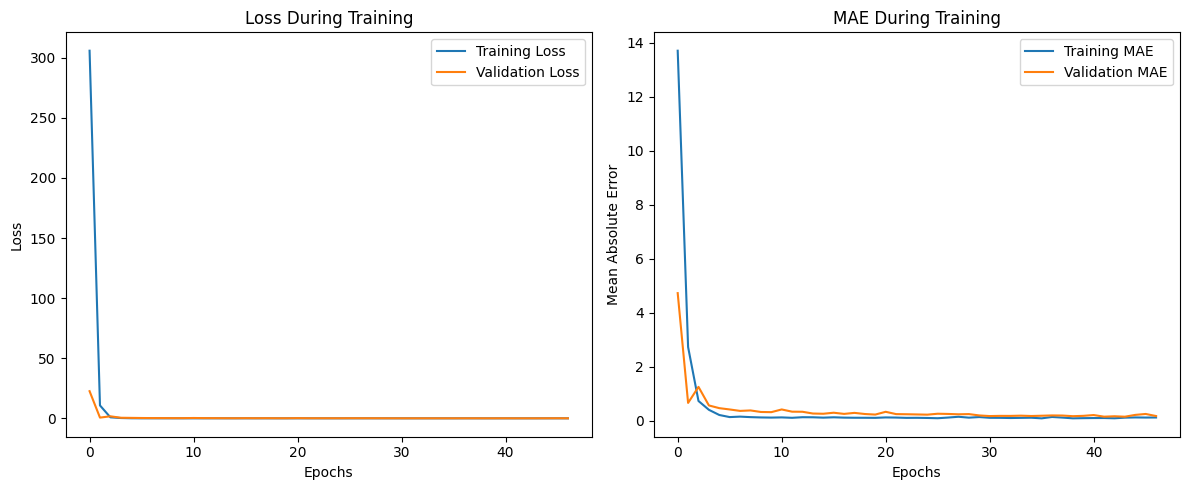

In [ ]:
seq_input = Input(shape=(x_seq_train.shape[1], 1), name="Sequence_Input")
rnn_output = SimpleRNN(64, activation='relu', return_sequences=True)(seq_input)
rnn_output = SimpleRNN(32, activation='relu', return_sequences=False)(rnn_output)

# Đầu vào 2: Các đặc trưng ngày hiện tại (phi chuỗi)
cur_input = Input(shape=(x_cur_train.shape[1],), name="Current_Features_Input")
dense_cur = Dense(32, activation='relu')(cur_input)

# Kết hợp hai đầu vào
combined = concatenate([rnn_output, dense_cur])
dense1 = Dense(64, activation='relu')(combined)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='linear', name="Output")(dense2)

# Tạo mô hình
model = Model(inputs=[seq_input, cur_input], outputs=output)
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Định dạng lại x_seq_train để phù hợp với đầu vào RNN
x_seq_train_rnn = x_seq_train.reshape(x_seq_train.shape[0], x_seq_train.shape[1], 1)
x_seq_test_rnn = x_seq_test.reshape(x_seq_test.shape[0], x_seq_test.shape[1], 1)

# Huấn luyện mô hình
history = model.fit(
    [x_seq_train_rnn, x_cur_train], y_train,
    validation_data=([x_seq_test_rnn, x_cur_test], y_test),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks = [early_stopping]
)

# ---------------------- 3. Dự đoán ----------------------
y_pred = model.predict([x_seq_test_rnn, x_cur_test])

# Đảo ngược chuẩn hóa y_pred và y_test
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# ---------------------- 4. Đánh giá mô hình ----------------------
mse_rnn_early = mean_squared_error(y_test_original, y_pred_original)
mae_rnn_early = mean_absolute_error(y_test_original, y_pred_original)
r2_rnn_early = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE): {mse_rnn_early:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rnn_early:.4f}")
print(f"R^2 Score: {r2_rnn_early:.4f}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####Dropout

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - loss: 81.4588 - mae: 7.4892 - val_loss: 24.9631 - val_mae: 4.9806
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 4.9225 - mae: 1.8861 - val_loss: 3.5628 - val_mae: 1.8521
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.4070 - mae: 0.5126 - val_loss: 0.6108 - val_mae: 0.7079
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.1597 - mae: 0.3324 - val_loss: 0.5881 - val_mae: 0.7101
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0952 - mae: 0.2602 - val_loss: 0.1112 - val_mae: 0.2929
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1118 - mae: 0.2668 - val_loss: 0.2446 - val_mae: 0.4663
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0848 - mae: 0.2402 - val_loss: 0.1577 - val_mae: 0.3659
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0735 - mae: 0.2194 - val_loss: 0.1700 - val_mae: 0.3823
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0

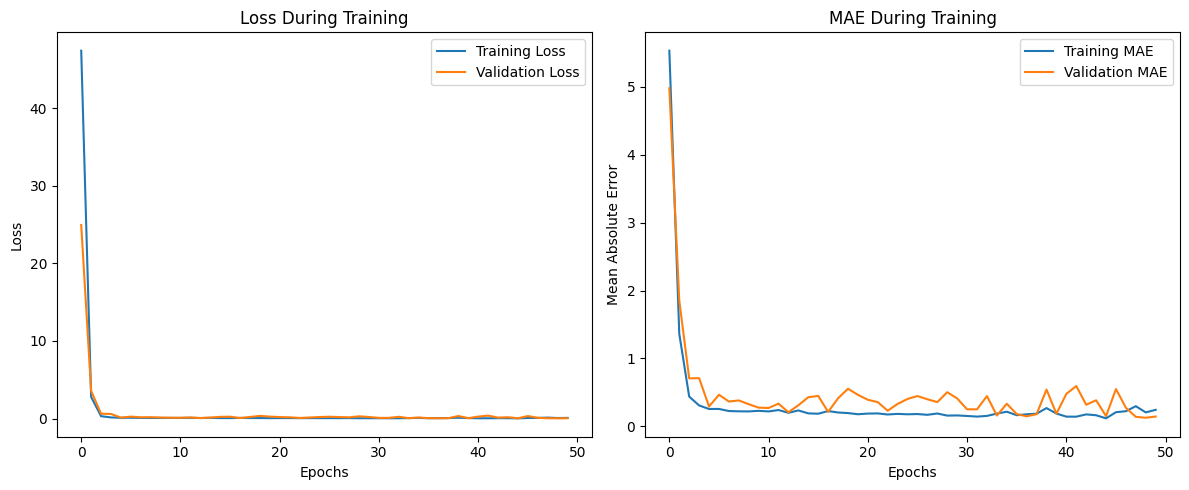

In [ ]:
seq_input = Input(shape=(x_seq_train.shape[1], 1), name="Sequence_Input")
rnn_output = SimpleRNN(64, activation='relu', return_sequences=True)(seq_input)
rnn_output = SimpleRNN(32, activation='relu', return_sequences=False)(rnn_output)

# Đầu vào 2: Các đặc trưng ngày hiện tại (phi chuỗi)
cur_input = Input(shape=(x_cur_train.shape[1],), name="Current_Features_Input")
dense_cur = Dense(32, activation='relu')(cur_input)

# Kết hợp hai đầu vào
combined = concatenate([rnn_output, dense_cur])
dense1 = Dense(64, activation='relu')(combined)
dropout = Dropout(0.1)(dense1)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='linear', name="Output")(dense2)

# Tạo mô hình
model = Model(inputs=[seq_input, cur_input], outputs=output)
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

# Định dạng lại x_seq_train để phù hợp với đầu vào RNN
x_seq_train_rnn = x_seq_train.reshape(x_seq_train.shape[0], x_seq_train.shape[1], 1)
x_seq_test_rnn = x_seq_test.reshape(x_seq_test.shape[0], x_seq_test.shape[1], 1)

# Huấn luyện mô hình
history = model.fit(
    [x_seq_train_rnn, x_cur_train], y_train,
    validation_data=([x_seq_test_rnn, x_cur_test], y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# ---------------------- 3. Dự đoán ----------------------
y_pred = model.predict([x_seq_test_rnn, x_cur_test])

# Đảo ngược chuẩn hóa y_pred và y_test
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# ---------------------- 4. Đánh giá mô hình ----------------------
mse_rnn_drop = mean_squared_error(y_test_original, y_pred_original)
mae_rnn_drop = mean_absolute_error(y_test_original, y_pred_original)
r2_rnn_drop = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE): {mse_rnn_drop:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rnn_drop:.4f}")
print(f"R^2 Score: {r2_rnn_drop:.4f}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####L2 Regularization (Weight constraint number)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 1037.4198 - mae: 26.3210 - val_loss: 30.9407 - val_mae: 5.3788
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 31.5223 - mae: 4.7752 - val_loss: 10.0168 - val_mae: 2.8918
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.2327 - mae: 1.2943 - val_loss: 2.0821 - val_mae: 1.0244
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.0194 - mae: 1.0010 - val_loss: 1.3448 - val_mae: 0.8034
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.9145 - mae: 0.9801 - val_loss: 1.8976 - val_mae: 0.9980
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 1.5154 - mae: 0.8672 - val_loss: 1.2942 - val_mae: 0.8049
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.3334 - mae: 0.8242 - val_loss: 1.2781 - val_mae: 0.7997
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.5430 - mae: 0.8804 - val_loss: 2.6531 - val_mae: 1.2714
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss

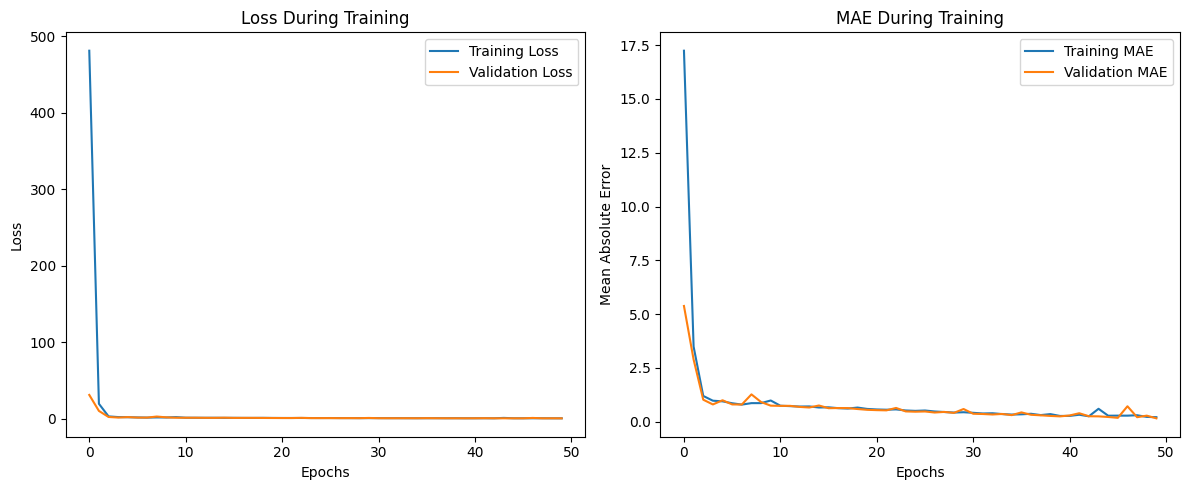

In [ ]:
seq_input = Input(shape=(x_seq_train.shape[1], 1), name="Sequence_Input")
rnn_output = SimpleRNN(64, activation='relu', return_sequences=True)(seq_input)
rnn_output = SimpleRNN(32, activation='relu', return_sequences=False)(rnn_output)

# Đầu vào 2: Các đặc trưng ngày hiện tại (phi chuỗi)
cur_input = Input(shape=(x_cur_train.shape[1],), name="Current_Features_Input")
dense_cur = Dense(32, activation='relu')(cur_input)

# Kết hợp hai đầu vào
combined = concatenate([rnn_output, dense_cur])
dense1 = Dense(64, activation='relu',kernel_regularizer=l2(0.01))(combined)
dense2 = Dense(32, activation='relu',kernel_regularizer=l2(0.01))(dense1)
output = Dense(1, activation='linear', name="Output")(dense2)

# Tạo mô hình
model = Model(inputs=[seq_input, cur_input], outputs=output)
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

# Định dạng lại x_seq_train để phù hợp với đầu vào RNN
x_seq_train_rnn = x_seq_train.reshape(x_seq_train.shape[0], x_seq_train.shape[1], 1)
x_seq_test_rnn = x_seq_test.reshape(x_seq_test.shape[0], x_seq_test.shape[1], 1)

# Huấn luyện mô hình
history = model.fit(
    [x_seq_train_rnn, x_cur_train], y_train,
    validation_data=([x_seq_test_rnn, x_cur_test], y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# ---------------------- 3. Dự đoán ----------------------
y_pred = model.predict([x_seq_test_rnn, x_cur_test])

# Đảo ngược chuẩn hóa y_pred và y_test
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# ---------------------- 4. Đánh giá mô hình ----------------------
mse_rnn_l2 = mean_squared_error(y_test_original, y_pred_original)
mae_rnn_l2 = mean_absolute_error(y_test_original, y_pred_original)
r2_rnn_l2 = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE): {mse_rnn_l2:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rnn_l2:.4f}")
print(f"R^2 Score: {r2_rnn_l2:.4f}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####Compare

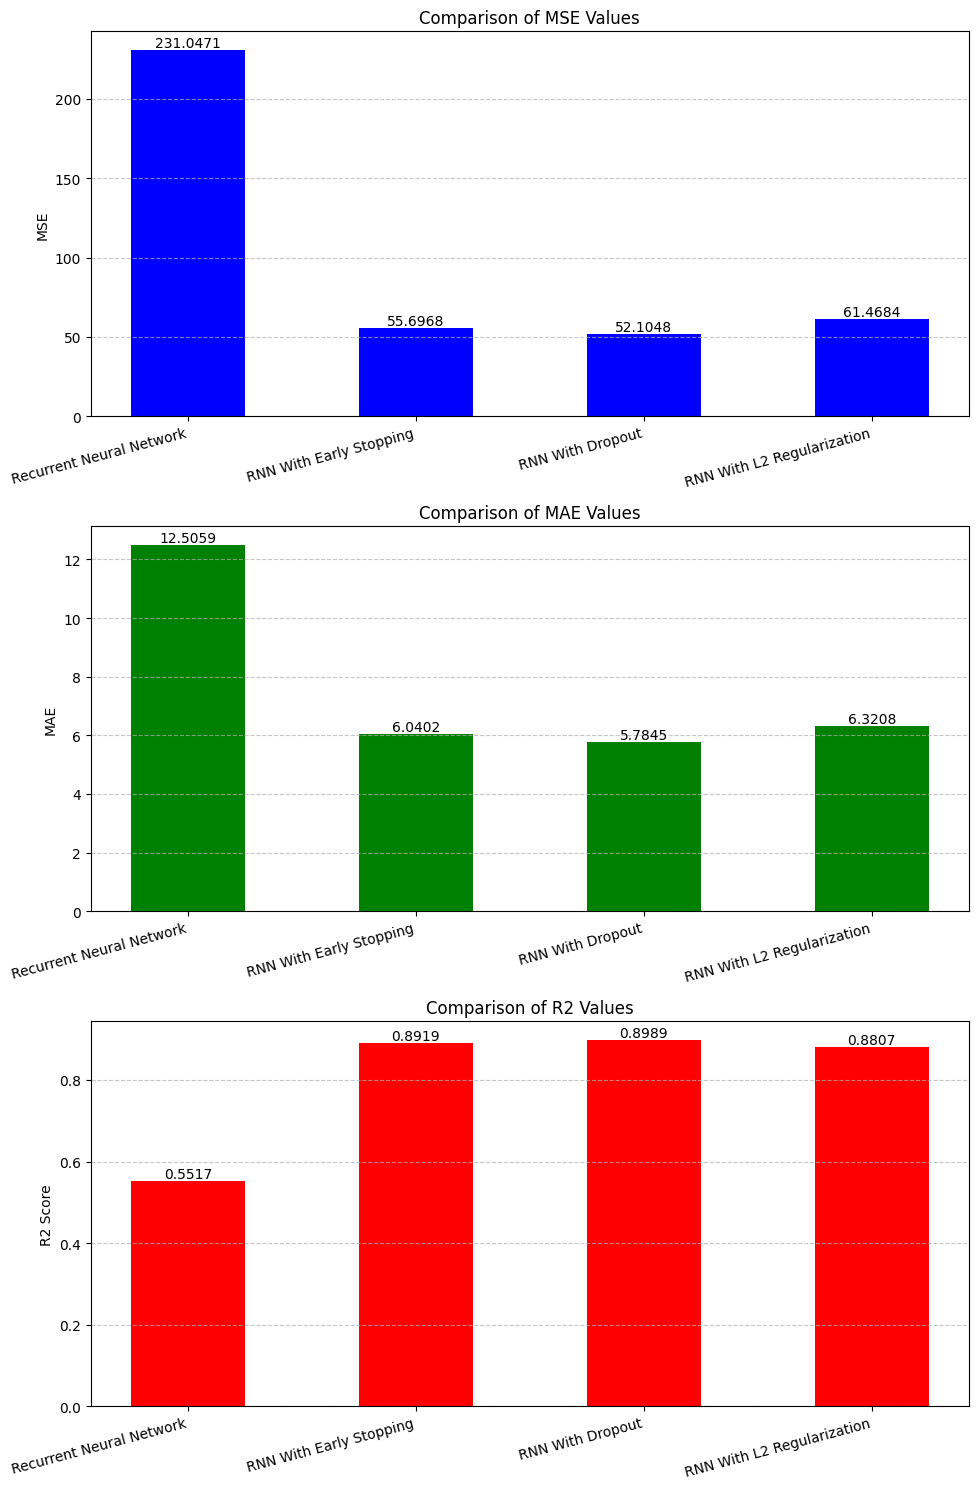

In [ ]:
# Data for visualization
methods = [
    "Recurrent Neural Network",
    "RNN With Early Stopping",
    "RNN With Dropout",
    "RNN With L2 Regularization"
]
mse_values = [
    round(mse_rnn, 4),
    round(mse_rnn_early, 4),
    round(mse_rnn_drop, 4),
    round(mse_rnn_l2, 4)
]

mae_values = [
    round(mae_rnn, 4),
    round(mae_rnn_early, 4),
    round(mae_rnn_drop, 4),
    round(mae_rnn_l2, 4)
]

r2_values = [
    round(r2_rnn, 4),
    round(r2_rnn_early, 4),
    round(r2_rnn_drop, 4),
    round(r2_rnn_l2, 4)
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##Linear Regression


###Task 1: Experiment

In [ ]:
# Chuẩn bị dữ liệu đầu vào
# Kết hợp dữ liệu tuần tự và đặc trưng hiện tại cho Linear Regression
def prepare_linear_regression_data(x_seq, x_cur, y):
    x_combined = np.hstack((x_seq.reshape(x_seq.shape[0], -1), x_cur))  # Kết hợp x_seq và x_cur
    return x_combined, y

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
x_lr_train, y_lr_train = prepare_linear_regression_data(x_seq_train, x_cur_train, y_train)
x_lr_test, y_lr_test = prepare_linear_regression_data(x_seq_test, x_cur_test, y_test)

In [ ]:
# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_lr_train, y_lr_train)

# Dự đoán trên tập kiểm tra
lr_preds = lr_model.predict(x_lr_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_lr_test_original = scaler.inverse_transform(y_lr_test.reshape(-1, 1))
lr_preds_original = scaler.inverse_transform(lr_preds.reshape(-1, 1))

# Đánh giá mô hình Linear Regression
lr_mse = mean_squared_error(y_lr_test_original, lr_preds_original)
lr_mae = mean_absolute_error(y_lr_test_original, lr_preds_original)
lr_r2 = r2_score(y_lr_test_original, lr_preds_original)

# In kết quả
print(f"Linear Regression - MSE: {lr_mse:.4f}, MAE: {lr_mae:.4f}, R2: {lr_r2:.4f}")

Linear Regression - MSE: 1.4343, MAE: 0.8732, R2: 0.9972


###Task 2: Apply techniques to prevent overfitting and plot training graphs


####Cross-Validation

Cross-Validation Results for Linear Regression:
Mean MSE (CV): 0.0006
Mean MAE (CV): 0.0181
Mean R² (CV): 0.9935


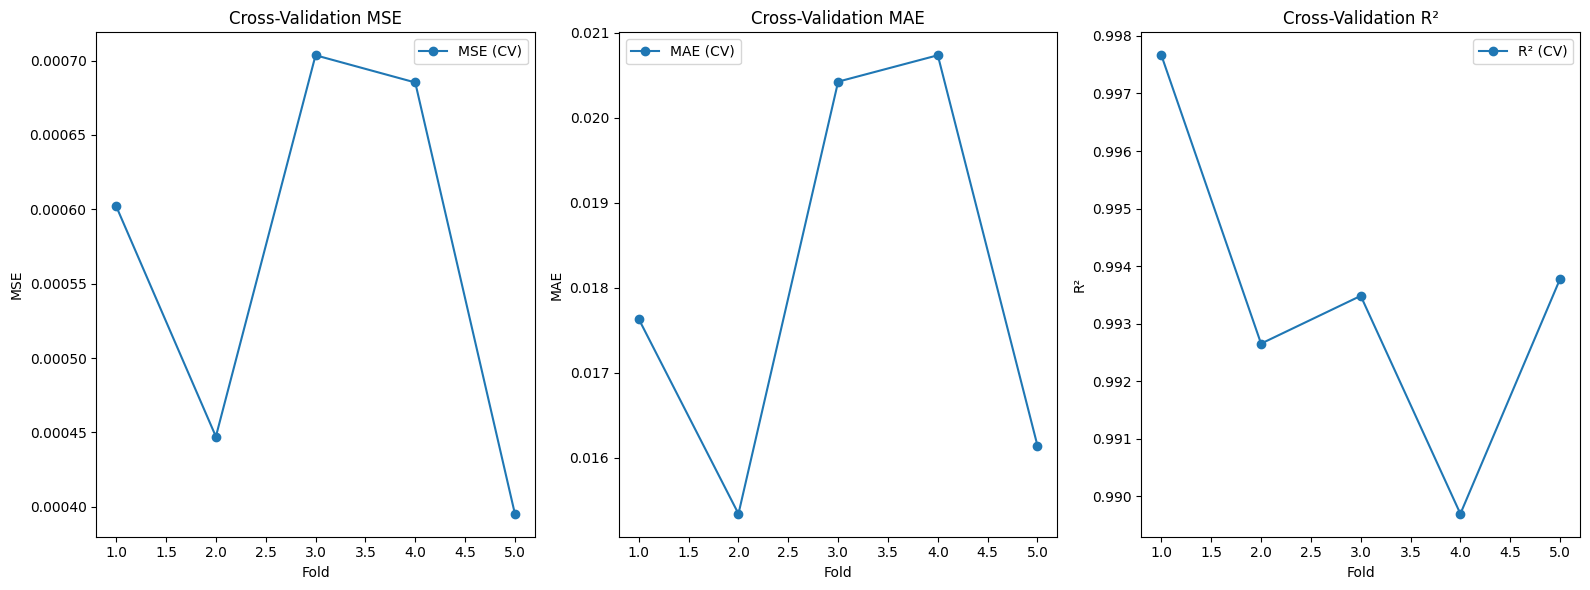

In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

lr_model = LinearRegression()

# Cross-validation for MSE, MAE, and R²
cv_mse = cross_val_score(lr_model, x_lr_train, y_lr_train, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(lr_model, x_lr_train, y_lr_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(lr_model, x_lr_train, y_lr_train, cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
lr_cv_mse = -cv_mse
lr_cv_mae = -cv_mae
lr_cv_r2 = cv_r2

# Calculate mean values
lr_mean_cv_mse = np.mean(lr_cv_mse)
lr_mean_cv_mae = np.mean(lr_cv_mae)
lr_mean_cv_r2 = np.mean(lr_cv_r2)

# Print results
print("Cross-Validation Results for Linear Regression:")
print(f"Mean MSE (CV): {lr_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {lr_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {lr_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(lr_cv_mse) + 1), lr_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(lr_cv_mae) + 1), lr_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(lr_cv_r2) + 1), lr_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()

####L2 Regularization (Ridge Regression)

Ridge Regression Results:
Test MSE: 0.0012
Test MAE: 0.0242
Test R²: 0.9963
Cross-Validation Results for Ridge Regression:
Mean MSE (CV): 0.0009
Mean MAE (CV): 0.0228
Mean R² (CV): 0.9897


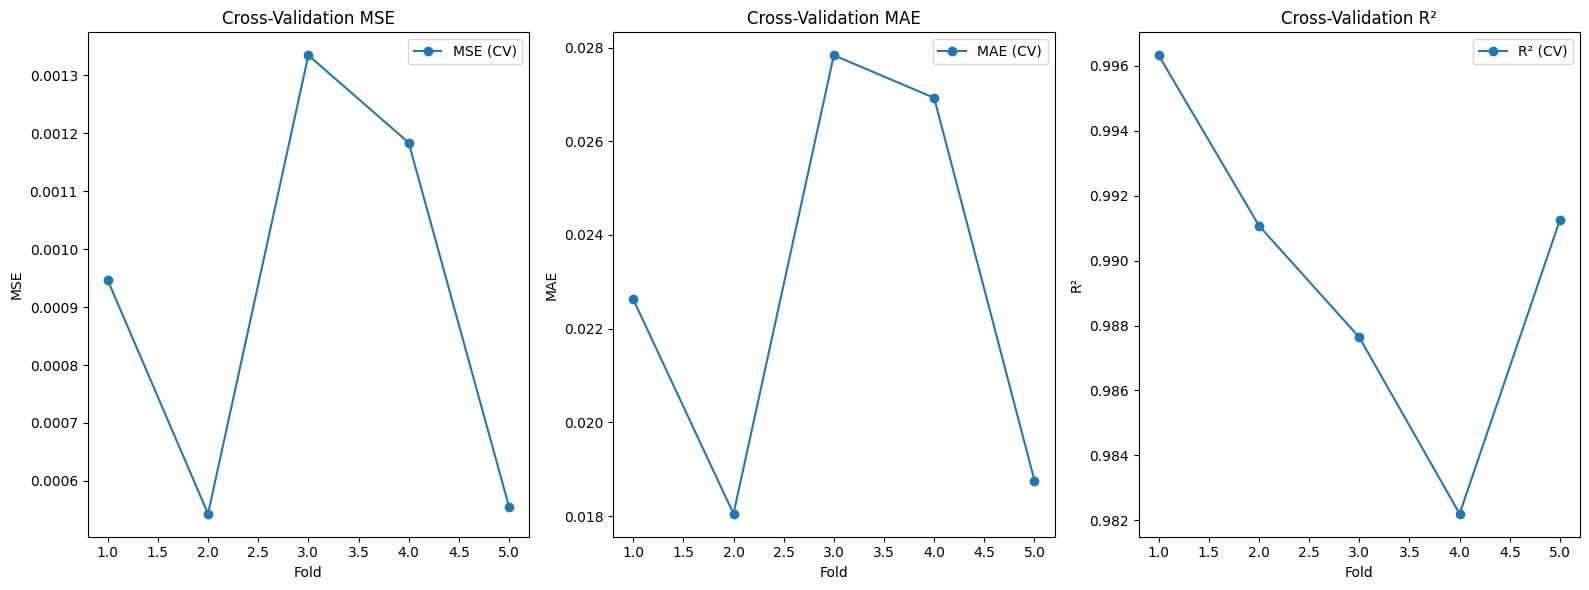

In [ ]:
# Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Perform Cross-Validation
cv_mse_scores = cross_val_score(ridge_model, x_lr_train, y_lr_train, cv=5, scoring='neg_mean_squared_error')
cv_mae_scores = cross_val_score(ridge_model, x_lr_train, y_lr_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(ridge_model, x_lr_train, y_lr_train, cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
ridge_cv_mse = -cv_mse_scores
ridge_cv_mae = -cv_mae_scores
ridge_cv_r2 = cv_r2_scores

# Calculate mean values
ridge_mean_cv_mse = np.mean(ridge_cv_mse)
ridge_mean_cv_mae = np.mean(ridge_cv_mae)
ridge_mean_cv_r2 = np.mean(ridge_cv_r2)

# Train the model
ridge_model.fit(x_lr_train, y_lr_train)

# Predict on evaluation set
ridge_preds = ridge_model.predict(x_lr_test)

# Evaluate on test set
ridge_mse = mean_squared_error(y_lr_test, ridge_preds)
ridge_mae = mean_absolute_error(y_lr_test, ridge_preds)
ridge_r2 = r2_score(y_lr_test, ridge_preds)

# Print results
print("Ridge Regression Results:")
print(f"Test MSE: {ridge_mse:.4f}")
print(f"Test MAE: {ridge_mae:.4f}")
print(f"Test R²: {ridge_r2:.4f}")
# Print results
print("Cross-Validation Results for Ridge Regression:")
print(f"Mean MSE (CV): {ridge_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {ridge_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {ridge_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(ridge_cv_mse) + 1), ridge_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(ridge_cv_mae) + 1), ridge_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(ridge_cv_r2) + 1), ridge_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()

####Compare

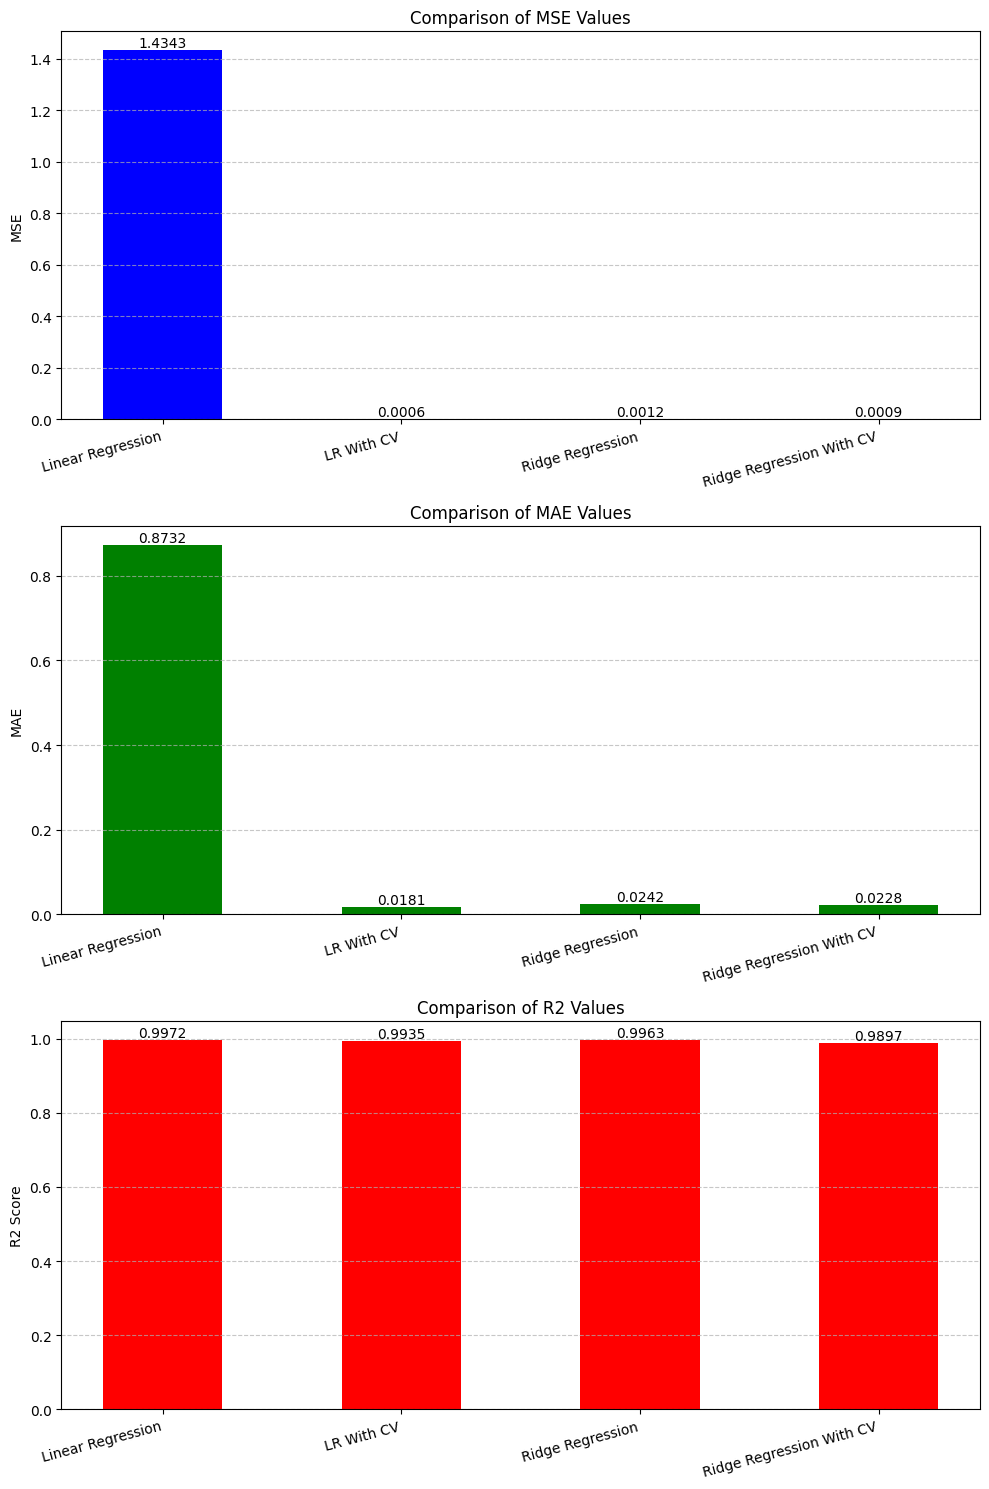

In [ ]:
# Data for visualization
methods = [
    "Linear Regression",
    "LR With CV",
    "Ridge Regression",
    "Ridge Regression With CV"
]
mse_values = [
    round(lr_mse, 4),
    round(lr_mean_cv_mse, 4),
    round(ridge_mse, 4),
    round(ridge_mean_cv_mse, 4)
]

mae_values = [
    round(lr_mae, 4),
    round(lr_mean_cv_mae, 4),
    round(ridge_mae, 4),
    round(ridge_mean_cv_mae, 4)
]

r2_values = [
    round(lr_r2, 4),
    round(lr_mean_cv_r2, 4),
    round(ridge_r2, 4),
    round(ridge_mean_cv_r2, 4)
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##SVM

###Task 1: Experiment

In [ ]:
# Chuẩn bị dữ liệu đầu vào
# Kết hợp dữ liệu tuần tự và đặc trưng hiện tại cho SVM
def prepare_svm_data(x_seq, x_cur, y):
    x_combined = np.hstack((x_seq.reshape(x_seq.shape[0], -1), x_cur))  # Kết hợp x_seq và x_cur
    return x_combined, y

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
x_svm_train, y_svm_train = prepare_svm_data(x_seq_train, x_cur_train, y_train)
x_svm_test, y_svm_test = prepare_svm_data(x_seq_test, x_cur_test, y_test)

In [ ]:
# Huấn luyện mô hình SVM
svm_model = SVR(kernel='rbf', C=100, epsilon=0.1) #C nhỏ giảm overfitting
svm_model.fit(x_svm_train, y_svm_train.ravel())  # Sử dụng .ravel() để làm phẳng y_train

# Dự đoán trên tập kiểm tra
svm_preds = svm_model.predict(x_svm_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_svm_test_original = scaler.inverse_transform(y_svm_test.reshape(-1, 1))
svm_preds_original = scaler.inverse_transform(svm_preds.reshape(-1, 1))

# Đánh giá mô hình SVM
svm_mse = mean_squared_error(y_svm_test_original, svm_preds_original)
svm_mae = mean_absolute_error(y_svm_test_original, svm_preds_original)
svm_r2 = r2_score(y_svm_test_original, svm_preds_original)

# In kết quả
print(f"SVM - MSE: {svm_mse:.4f}, MAE: {svm_mae:.4f}, R2: {svm_r2:.4f}")

SVM - MSE: 313.0883, MAE: 14.6444, R2: 0.3925


###Task 2: Apply techniques to prevent overfitting and plot training graphs

####Cross-Validation

Cross-Validation Results for SVM Regression:
Mean MSE (CV): 0.1450
Mean MAE (CV): 0.3030
Mean R² (CV): -0.3120


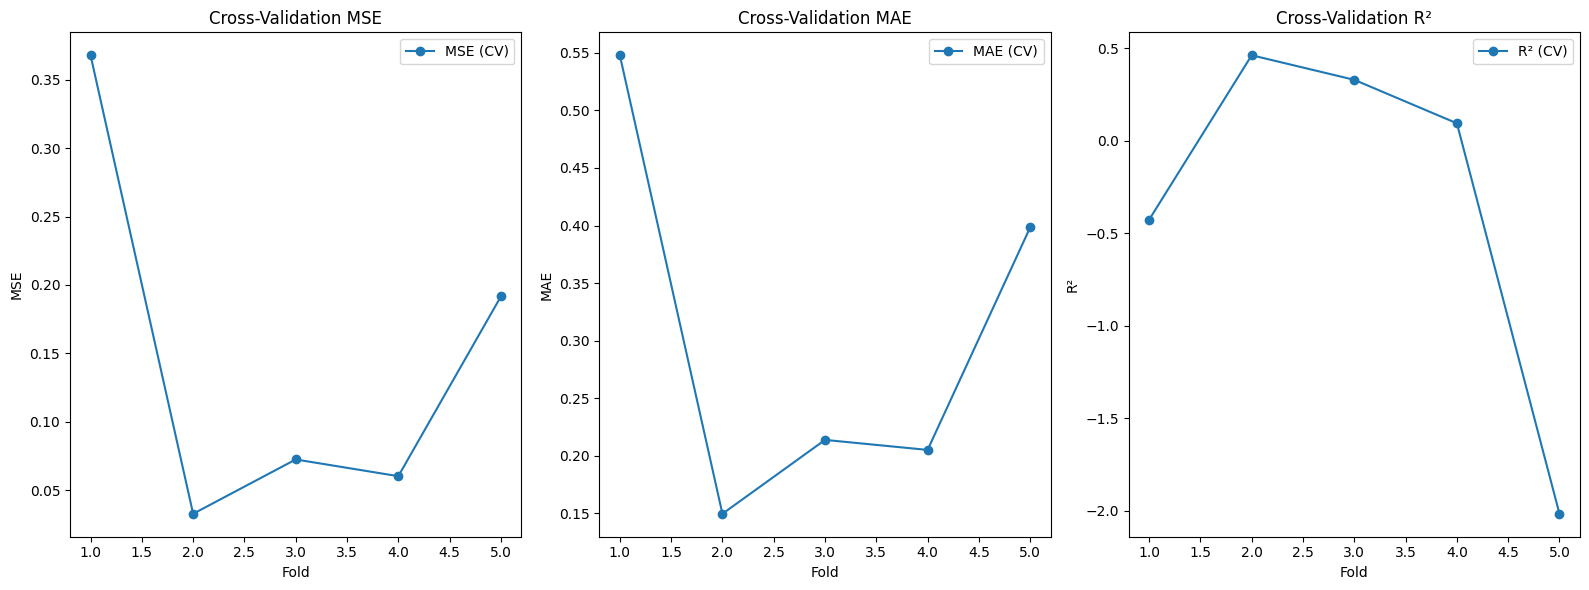

In [ ]:
# Ensure y_train is 1D arrays
y_train_cv = y_svm_train.ravel()

# Cross-validation for MSE, MAE, and R²
cv_mse = cross_val_score(svm_model, x_svm_train, y_train_cv, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(svm_model, x_svm_train, y_train_cv, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(svm_model, x_svm_train, y_train_cv, cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
svm_cv_mse = -cv_mse
svm_cv_mae = -cv_mae
svm_cv_r2 = cv_r2

# Calculate mean values
svm_mean_cv_mse = np.mean(svm_cv_mse)
svm_mean_cv_mae = np.mean(svm_cv_mae)
svm_mean_cv_r2 = np.mean(svm_cv_r2)

# Print results
print("Cross-Validation Results for SVM Regression:")
print(f"Mean MSE (CV): {svm_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {svm_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {svm_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(svm_cv_mse) + 1), svm_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(svm_cv_mae) + 1), svm_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(svm_cv_r2) + 1), svm_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()

####Kernel Tuning

SVM Regression Results with new Kernel:
Test MSE: 0.1154
Test MAE: 0.2799
Test R²: 0.6433

Cross-Validation Results with new Kernel (SVM):
Mean MSE (CV): 0.0937
Mean MAE (CV): 0.2463
Mean R² (CV): 0.0924


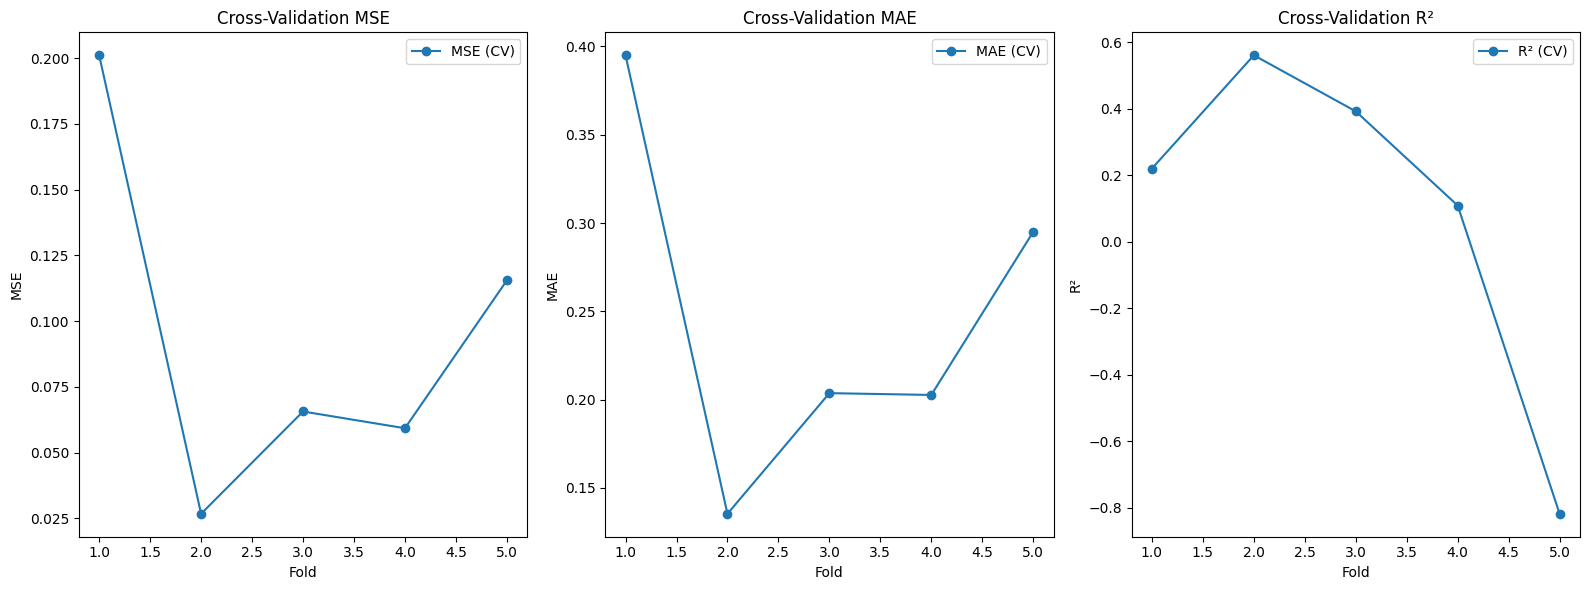

In [ ]:
# Using a Polynomial Kernel
svm_model = SVR(kernel='poly', C=100, degree=3, epsilon=0.1)

# Cross-validation for MSE, MAE, and R²
cv_mse = cross_val_score(svm_model, x_svm_train, y_svm_train.ravel(), cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(svm_model, x_svm_train, y_svm_train.ravel(), cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(svm_model, x_svm_train, y_svm_train.ravel(), cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
svmpoly_cv_mse = -cv_mse
svmpoly_cv_mae = -cv_mae
svmpoly_cv_r2 = cv_r2

# Calculate mean values
svmpoly_mean_cv_mse = np.mean(svmpoly_cv_mse)
svmpoly_mean_cv_mae = np.mean(svmpoly_cv_mae)
svmpoly_mean_cv_r2 = np.mean(svmpoly_cv_r2)

# Train the model
svm_model.fit(x_svm_train, y_svm_train.ravel())

# Predict on evaluation set
svm_preds = svm_model.predict(x_svm_test)

# Evaluate on test set
svmpoly_mse = mean_squared_error(y_svm_test, svm_preds)
svmpoly_mae = mean_absolute_error(y_svm_test, svm_preds)
svmpoly_r2 = r2_score(y_svm_test, svm_preds)

# Print results
print("SVM Regression Results with new Kernel:")
print(f"Test MSE: {svmpoly_mse:.4f}")
print(f"Test MAE: {svmpoly_mae:.4f}")
print(f"Test R²: {svmpoly_r2:.4f}")
print("\nCross-Validation Results with new Kernel (SVM):")
print(f"Mean MSE (CV): {svmpoly_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {svmpoly_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {svmpoly_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(svmpoly_cv_mse) + 1), svmpoly_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(svmpoly_cv_mae) + 1), svmpoly_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(svmpoly_cv_r2) + 1), svmpoly_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()


####Compare

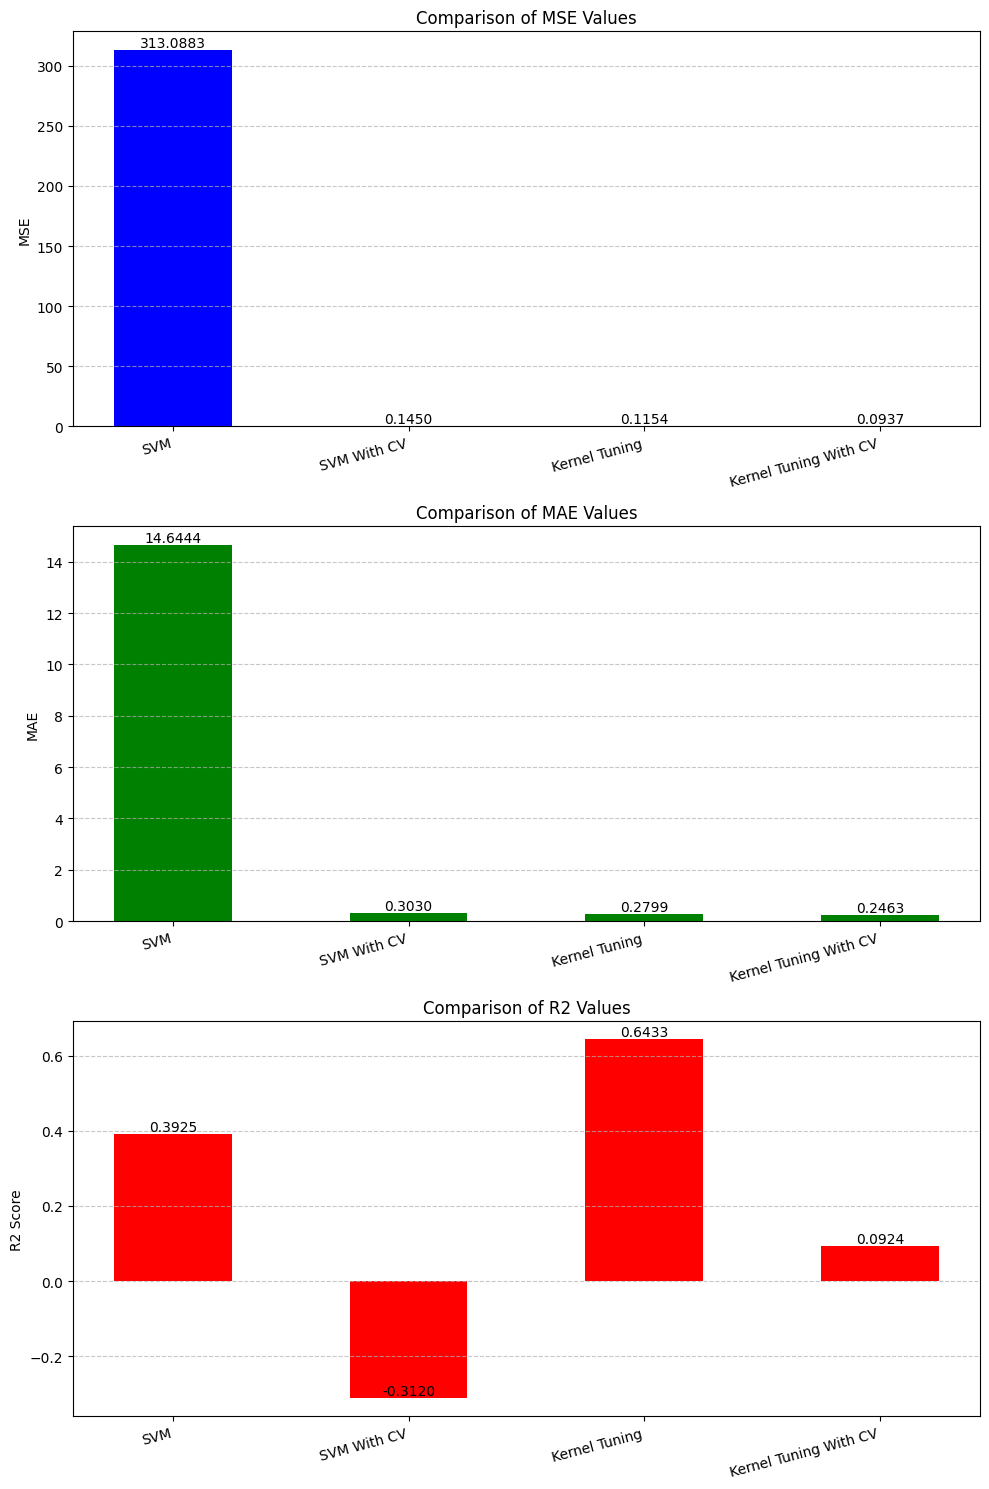

In [ ]:
# Data for visualization
methods = [
    "SVM",
    "SVM With CV",
    "Kernel Tuning",
    "Kernel Tuning With CV"
]
mse_values = [
    round(svm_mse, 4),
    round(svm_mean_cv_mse, 4),
    round(svmpoly_mse, 4),
    round(svmpoly_mean_cv_mse, 4)
]

mae_values = [
    round(svm_mae, 4),
    round(svm_mean_cv_mae, 4),
    round(svmpoly_mae, 4),
    round(svmpoly_mean_cv_mae, 4)
]

r2_values = [
    round(svm_r2, 4),
    round(svm_mean_cv_r2, 4),
    round(svmpoly_r2, 4),
    round(svmpoly_mean_cv_r2, 4)
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##Decision Tree

###Task 1: Experiment

In [ ]:
# Kết hợp dữ liệu tuần tự và đặc trưng hiện tại
def prepare_decision_tree_data(x_seq, x_cur, y):
    x_combined = np.hstack((x_seq.reshape(x_seq.shape[0], -1), x_cur))  # Kết hợp x_seq và x_cur
    return x_combined, y

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
x_dt_train, y_dt_train = prepare_decision_tree_data(x_seq_train, x_cur_train, y_train)
x_dt_test, y_dt_test = prepare_decision_tree_data(x_seq_test, x_cur_test, y_test)

In [ ]:
# Huấn luyện mô hình Decision Tree
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(x_dt_train, y_dt_train)

# Dự đoán trên tập kiểm tra
dt_preds = dt_model.predict(x_dt_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_dt_test_original = scaler.inverse_transform(y_dt_test.reshape(-1, 1))
dt_preds_original = scaler.inverse_transform(dt_preds.reshape(-1, 1))

# Đánh giá mô hình Decision Tree
dt_mse = mean_squared_error(y_dt_test_original, dt_preds_original)
dt_mae = mean_absolute_error(y_dt_test_original, dt_preds_original)
dt_r2 = r2_score(y_dt_test_original, dt_preds_original)

# In kết quả
print(f"Decision Tree - MSE: {dt_mse:.4f}, MAE: {dt_mae:.4f}, R²: {dt_r2:.4f}")

Decision Tree - MSE: 373.9994, MAE: 13.9969, R²: 0.2744


###Task 2: Apply techniques to prevent overfitting and plot training graphs

####Cross-Validation

Mean MSE (CV): 0.1030
Mean MAE (CV): 0.1448
Mean R² (CV): 0.5380


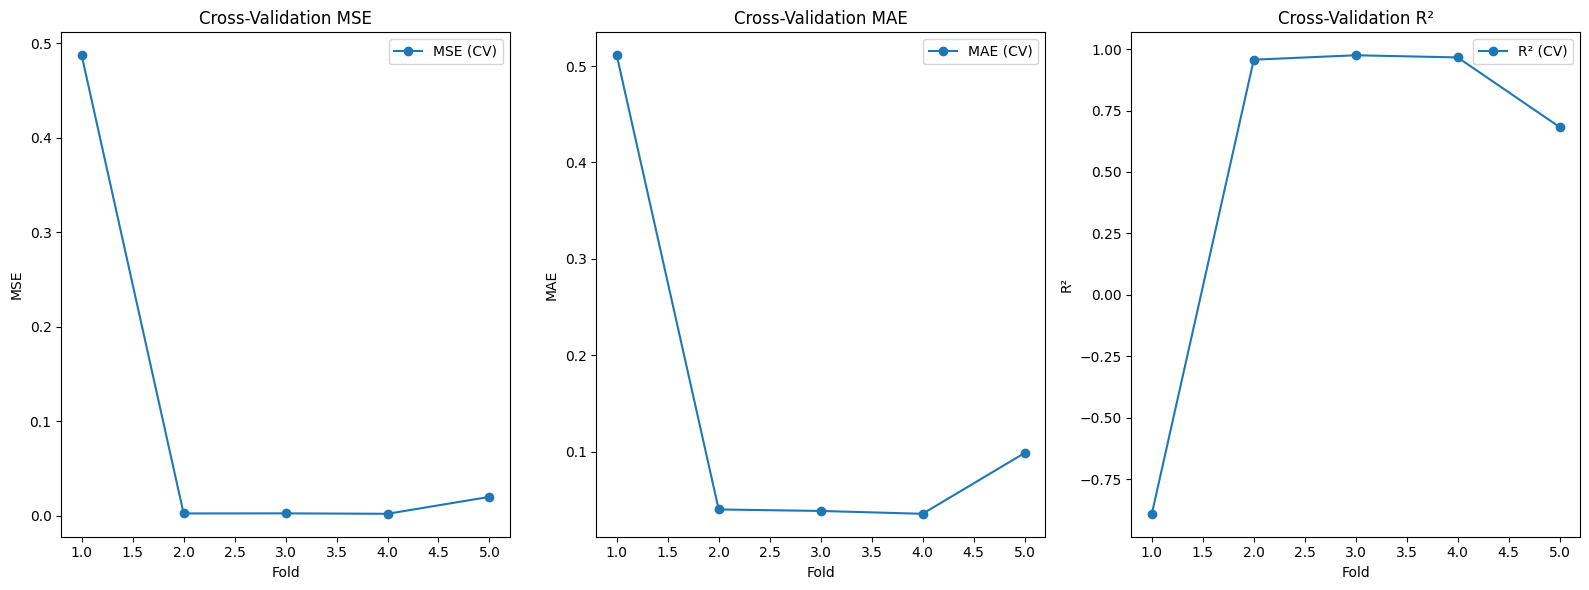

In [ ]:
# Perform Cross-Validation
cv_mse_dt = cross_val_score(dt_model, x_dt_train, y_dt_train, cv=5, scoring='neg_mean_squared_error')
cv_mae_dt = cross_val_score(dt_model, x_dt_train, y_dt_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_dt = cross_val_score(dt_model, x_dt_train, y_dt_train, cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
dt_cv_mse = -cv_mse_dt
dt_cv_mae = -cv_mae_dt
dt_cv_r2 = cv_r2_dt

dt_mean_cv_mse = np.mean(dt_cv_mse)
dt_mean_cv_mae = np.mean(dt_cv_mae)
dt_mean_cv_r2 = np.mean(dt_cv_r2
                        )
print(f"Mean MSE (CV): {dt_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {dt_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {dt_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(dt_cv_mse) + 1), dt_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(dt_cv_mae) + 1), dt_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(dt_cv_r2) + 1), dt_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()

####Parameter Tuning

In [ ]:
# Huấn luyện mô hình Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(x_dt_train, y_dt_train)

# Dự đoán trên tập kiểm tra
dt_preds = dt_model.predict(x_dt_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_dt_test_original = scaler.inverse_transform(y_dt_test.reshape(-1, 1))
dt_preds_original = scaler.inverse_transform(dt_preds.reshape(-1, 1))

# Đánh giá mô hình Decision Tree
dt_mse_tuning = mean_squared_error(y_dt_test_original, dt_preds_original)
dt_mae_tuning = mean_absolute_error(y_dt_test_original, dt_preds_original)
dt_r2_tuning = r2_score(y_dt_test_original, dt_preds_original)

# In kết quả
print(f"Decision Tree - MSE: {dt_mse_tuning:.4f}, MAE: {dt_mae_tuning:.4f}, R²: {dt_r2_tuning:.4f}")

Decision Tree - MSE: 382.2386, MAE: 14.1280, R²: 0.2584


####Compare

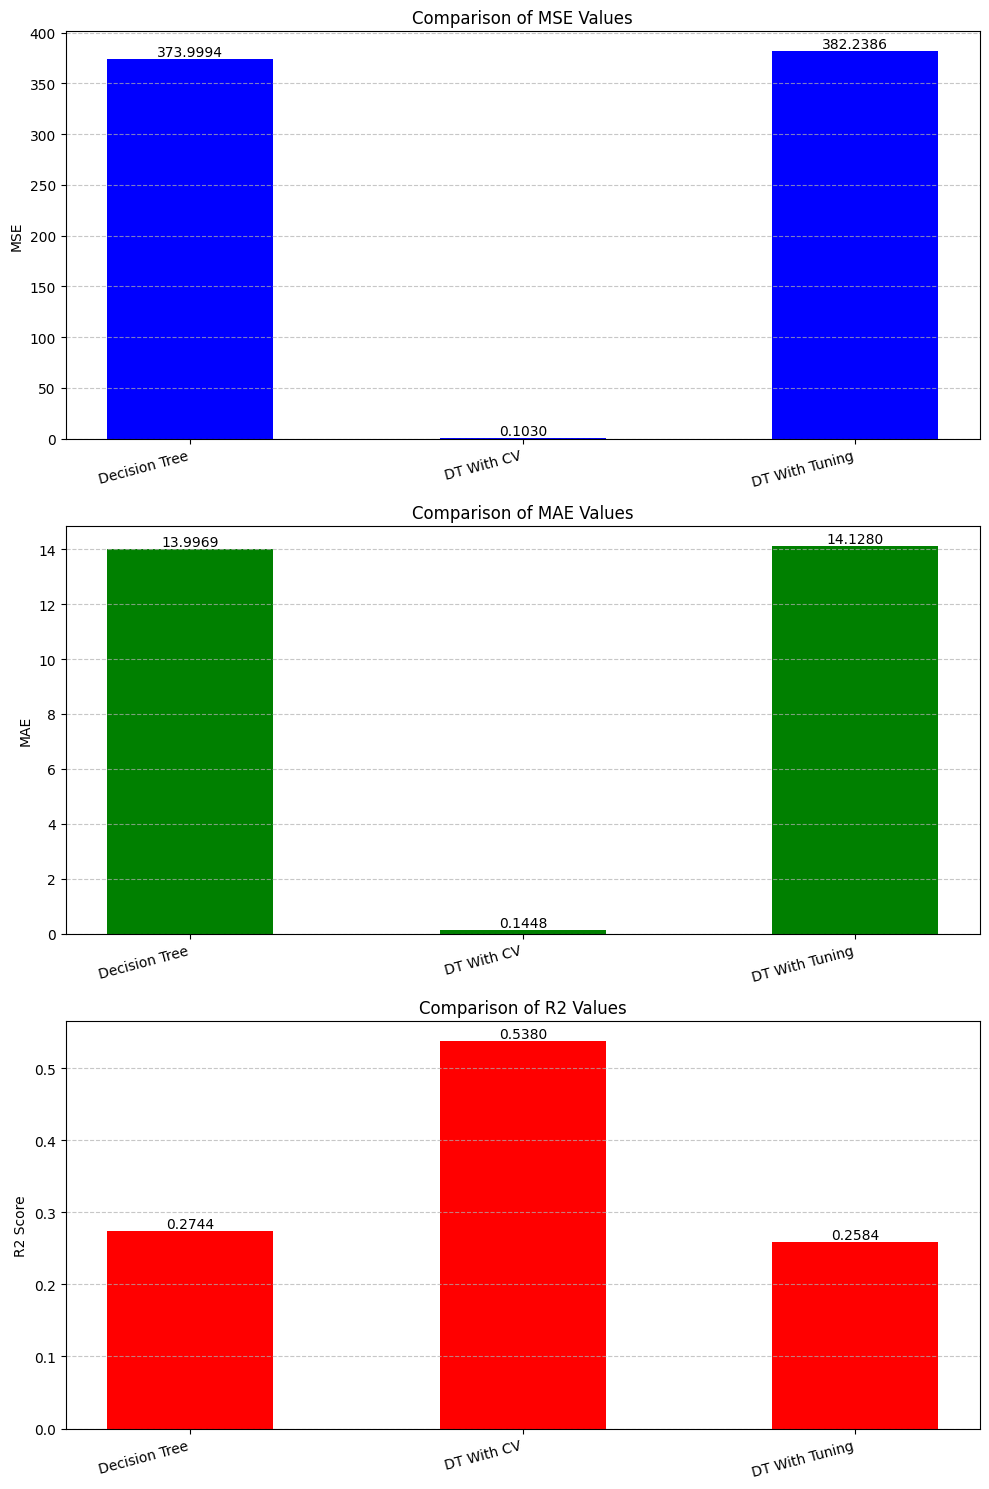

In [ ]:
# Data for visualization
methods = [
    "Decision Tree",
    "DT With CV",
    "DT With Tuning",
]
mse_values = [
    round(dt_mse, 4),
    round(dt_mean_cv_mse, 4),
    round(dt_mse_tuning, 4),
]

mae_values = [
    round(dt_mae, 4),
    round(dt_mean_cv_mae, 4),
    round(dt_mae_tuning, 4),
]

r2_values = [
    round(dt_r2, 4),
    round(dt_mean_cv_r2, 4),
    round(dt_r2_tuning, 4),
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##Random Forest

###Task 1: Experiment

In [ ]:
# Kết hợp dữ liệu tuần tự và đặc trưng hiện tại
def prepare_random_forest_data(x_seq, x_cur, y):
    x_combined = np.hstack((x_seq.reshape(x_seq.shape[0], -1), x_cur))  # Kết hợp x_seq và x_cur
    return x_combined, y

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
x_rf_train, y_rf_train = prepare_random_forest_data(x_seq_train, x_cur_train, y_train)
x_rf_test, y_rf_test = prepare_random_forest_data(x_seq_test, x_cur_test, y_test)

In [ ]:
# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=10, max_depth=100, random_state=42)
rf_model.fit(x_rf_train, y_rf_train.ravel())  # Sử dụng .ravel() để làm phẳng y_train

# Dự đoán trên tập kiểm tra
rf_preds = rf_model.predict(x_rf_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_rf_test_original = scaler.inverse_transform(y_rf_test.reshape(-1, 1))
rf_preds_original = scaler.inverse_transform(rf_preds.reshape(-1, 1))

# Đánh giá mô hình Random Forest
rf_mse = mean_squared_error(y_rf_test_original, rf_preds_original)
rf_mae = mean_absolute_error(y_rf_test_original, rf_preds_original)
rf_r2 = r2_score(y_rf_test_original, rf_preds_original)

# In kết quả
print(f"Random Forest - MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}, R²: {rf_r2:.4f}")

Random Forest - MSE: 405.9065, MAE: 14.3003, R²: 0.2124


###Task 2: Apply techniques to prevent overfitting and plot training graphs

####Cross-Validation

Mean MSE (CV): 0.1075
Mean MAE (CV): 0.1449
Mean R² (CV): 0.5007


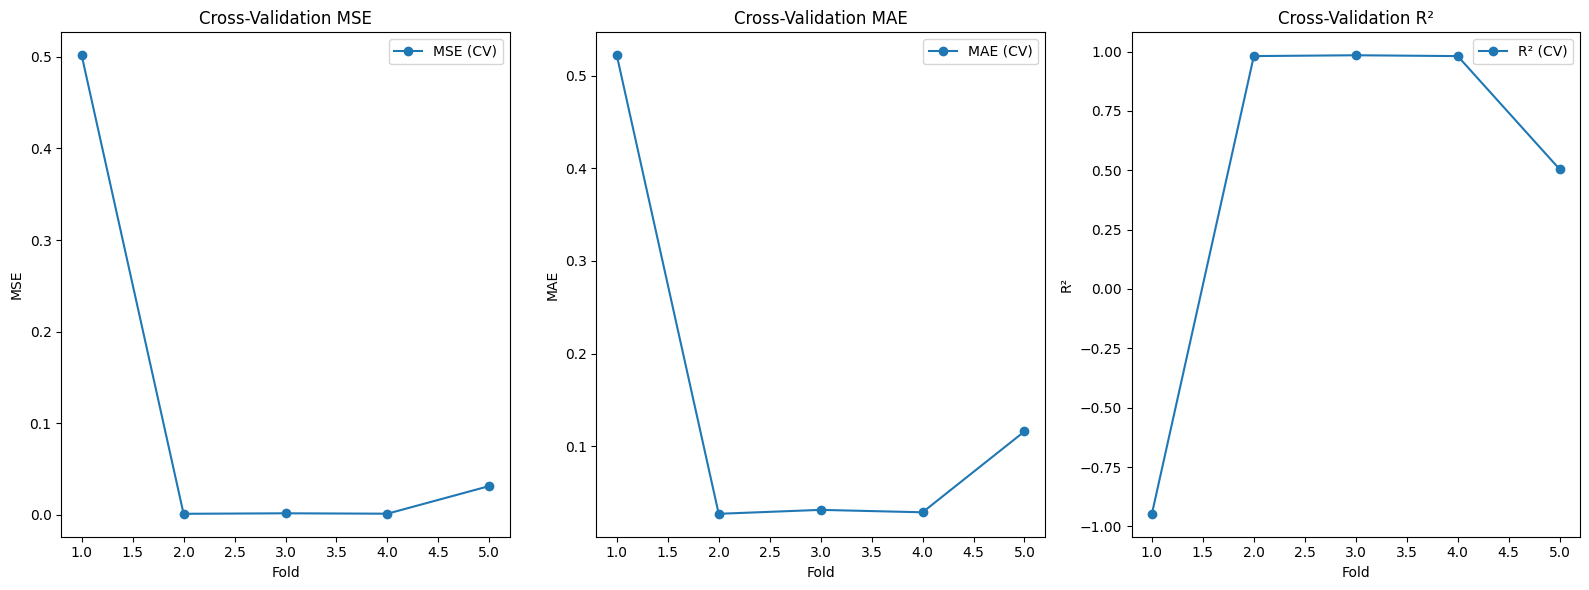

In [ ]:
# Ensure y_train is a 1D array
y_train_rf = y_rf_train.ravel()

# Perform Cross-Validation
cv_mse_rf = cross_val_score(rf_model, x_rf_train, y_train_rf, cv=5, scoring='neg_mean_squared_error')
cv_mae_rf = cross_val_score(rf_model, x_rf_train, y_train_rf, cv=5, scoring='neg_mean_absolute_error')
cv_r2_rf = cross_val_score(rf_model, x_rf_train, y_train_rf, cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
rf_cv_mse = -cv_mse_rf
rf_cv_mae = -cv_mae_rf
rf_cv_r2 = cv_r2_rf

rf_mean_cv_mse = np.mean(rf_cv_mse)
rf_mean_cv_mae = np.mean(rf_cv_mae)
rf_mean_cv_r2 = np.mean(rf_cv_r2)

print(f"Mean MSE (CV): {rf_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {rf_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {rf_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(rf_cv_mse) + 1), rf_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(rf_cv_mae) + 1), rf_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(rf_cv_r2) + 1), rf_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()

####Parameter Tuning

In [ ]:
# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)
rf_model.fit(x_rf_train, y_rf_train.ravel())  # Sử dụng .ravel() để làm phẳng y_train

# Dự đoán trên tập kiểm tra
rf_preds = rf_model.predict(x_rf_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_rf_test_original = scaler.inverse_transform(y_rf_test.reshape(-1, 1))
rf_preds_original = scaler.inverse_transform(rf_preds.reshape(-1, 1))

# Đánh giá mô hình Random Forest
rf_mse_tuning = mean_squared_error(y_rf_test_original, rf_preds_original)
rf_mae_tuning = mean_absolute_error(y_rf_test_original, rf_preds_original)
rf_r2_tuning = r2_score(y_rf_test_original, rf_preds_original)

# In kết quả
print(f"Random Forest - MSE: {rf_mse_tuning:.4f}, MAE: {rf_mae_tuning:.4f}, R²: {rf_r2_tuning:.4f}")

Random Forest - MSE: 398.7651, MAE: 14.1440, R²: 0.2263


####Compare

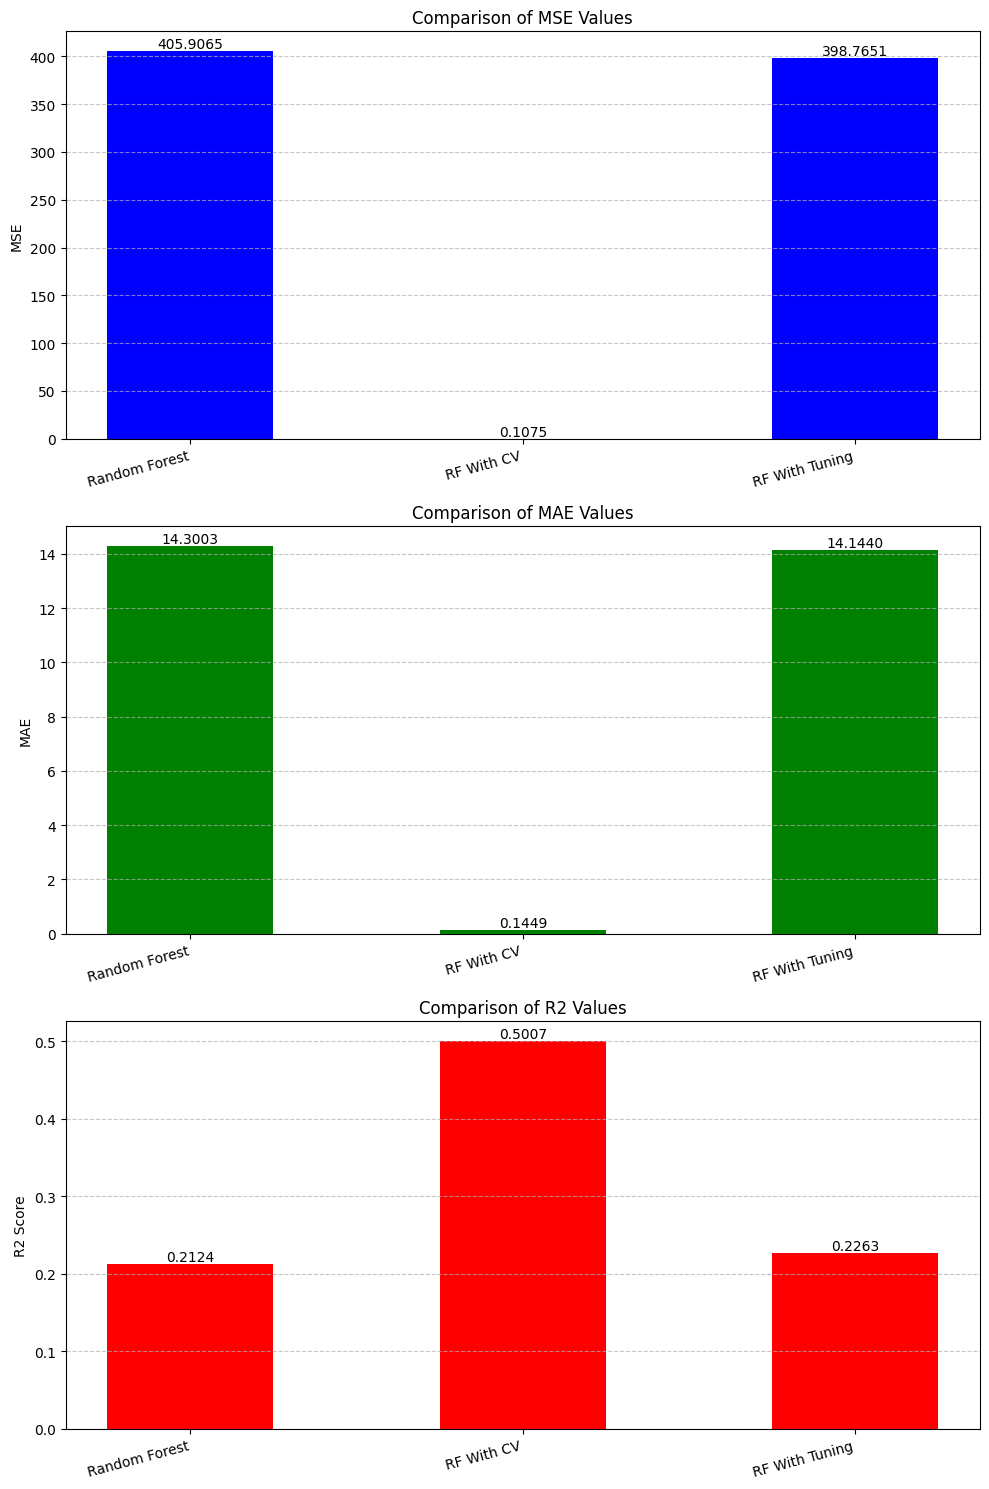

In [ ]:
# Data for visualization
methods = [
    "Random Forest",
    "RF With CV",
    "RF With Tuning",
]
mse_values = [
    round(rf_mse, 4),
    round(rf_mean_cv_mse, 4),
    round(rf_mse_tuning, 4),
]

mae_values = [
    round(rf_mae, 4),
    round(rf_mean_cv_mae, 4),
    round(rf_mae_tuning, 4),
]

r2_values = [
    round(rf_r2, 4),
    round(rf_mean_cv_r2, 4),
    round(rf_r2_tuning, 4),
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##Task 3: Evaluate the models and compare them, plotting the results.

FeedForward Neural Network
Mean Squared Error (MSE): 14.816847520125675
Mean Absolute Error (MAE): 2.9774283069675254
R^2 Score: 0.9712519147302968

Recurrent Neural Network
Mean Squared Error (MSE): 231.04706004082217
Mean Absolute Error (MAE): 12.505942781092758
R^2 Score: 0.5517156686437005

Linear Regression
Mean Squared Error (MSE): 1.4343238899116393
Mean Absolute Error (MAE): 0.8731548084834825
R^2 Score: 0.9972170824167864

Support Vector Machine
Mean Squared Error (MSE): 313.0883354275706
Mean Absolute Error (MAE): 14.64437907607041
R^2 Score: 0.39253676252012326

Decision Tree
Mean Squared Error (MSE): 373.99940733897904
Mean Absolute Error (MAE): 13.996892658856597
R^2 Score: 0.2743553013962432

Random Forest
Mean Squared Error (MSE): 405.90652999085114
Mean Absolute Error (MAE): 14.300309287895583
R^2 Score: 0.21244815944442297



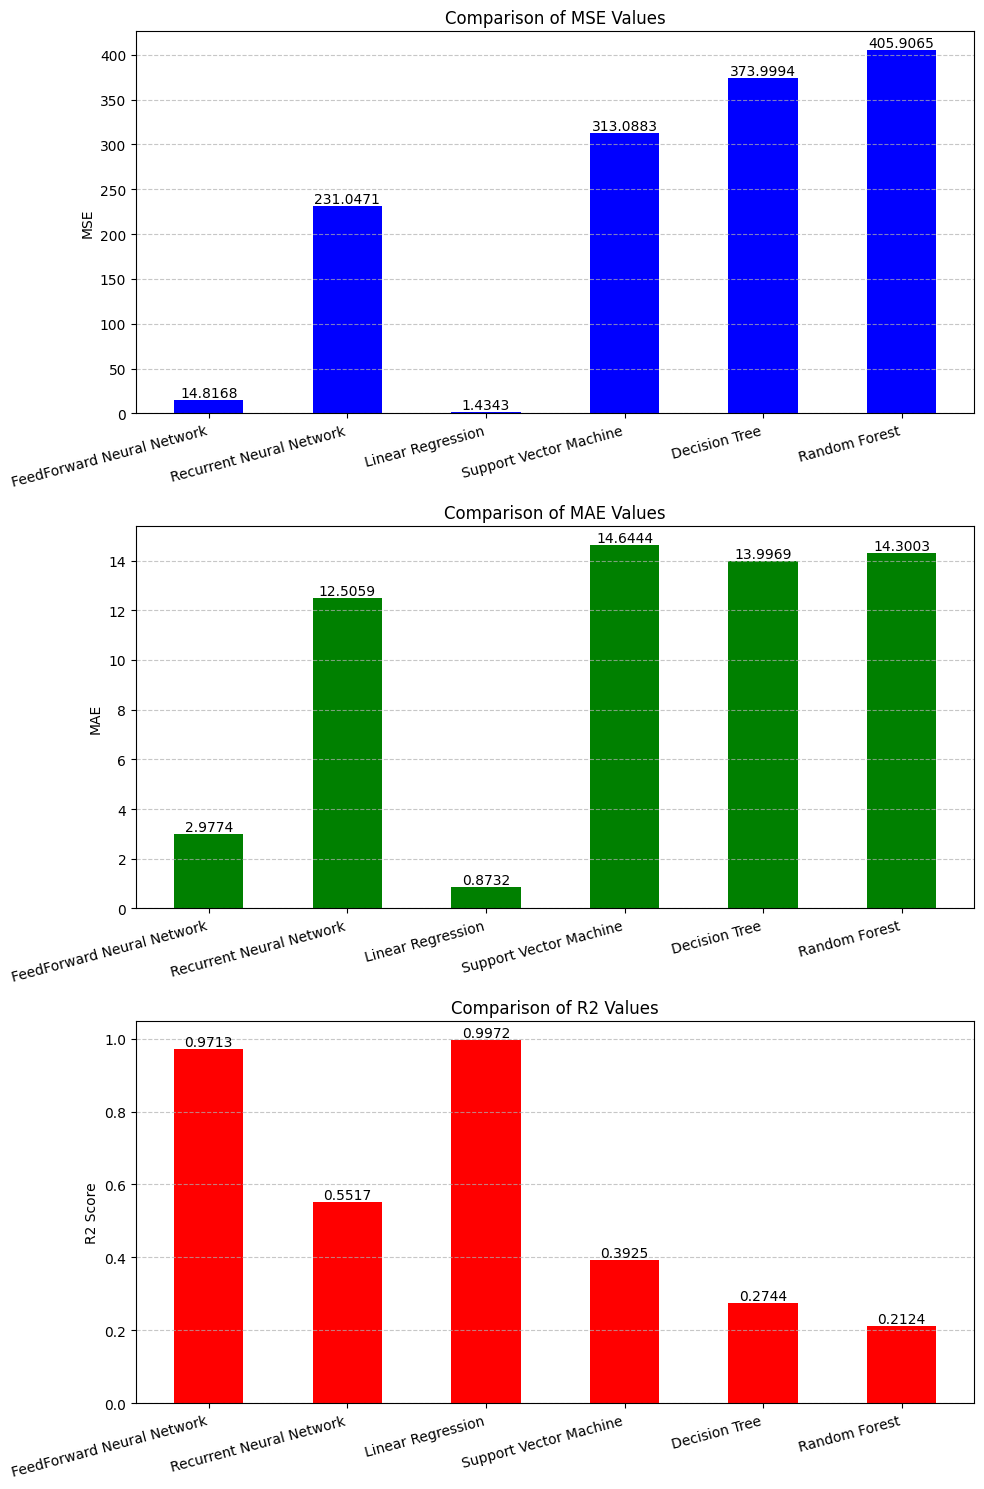

In [ ]:
print(f"FeedForward Neural Network")
print(f"Mean Squared Error (MSE): {mse_ffnn}")
print(f"Mean Absolute Error (MAE): {mae_ffnn}")
print(f"R^2 Score: {r2_ffnn}\n")

print("Recurrent Neural Network")
print(f"Mean Squared Error (MSE): {mse_rnn}")
print(f"Mean Absolute Error (MAE): {mae_rnn}")
print(f"R^2 Score: {r2_rnn}\n")

print("Linear Regression")
print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"Mean Absolute Error (MAE): {lr_mae}")
print(f"R^2 Score: {lr_r2}\n")

print("Support Vector Machine")
print(f"Mean Squared Error (MSE): {svm_mse}")
print(f"Mean Absolute Error (MAE): {svm_mae}")
print(f"R^2 Score: {svm_r2}\n")

print("Decision Tree")
print(f"Mean Squared Error (MSE): {dt_mse}")
print(f"Mean Absolute Error (MAE): {dt_mae}")
print(f"R^2 Score: {dt_r2}\n")

print("Random Forest")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"R^2 Score: {rf_r2}\n")

# Data for visualization
methods = [
    "FeedForward Neural Network",
    "Recurrent Neural Network",
    "Linear Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest",
]
mse_values = [
    round(mse_ffnn, 4),
    round(mse_rnn, 4),
    round(lr_mse, 4),
    round(svm_mse, 4),
    round(dt_mse, 4),
    round(rf_mse, 4),
]

mae_values = [
    round(mae_ffnn, 4),
    round(mae_rnn, 4),
    round(lr_mae, 4),
    round(svm_mae, 4),
    round(dt_mae, 4),
    round(rf_mae, 4),
]

r2_values = [
    round(r2_ffnn, 4),
    round(r2_rnn, 4),
    round(lr_r2, 4),
    round(svm_r2, 4),
    round(dt_r2, 4),
    round(rf_r2, 4),
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

#Question 2 (more features)#



##Uninstall Libraries

In [ ]:
!pip uninstall fredapi -y
!pip uninstall tensorflow -y

Found existing installation: fredapi 0.5.2
Uninstalling fredapi-0.5.2:
  Successfully uninstalled fredapi-0.5.2
Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0


##Download Libraries

In [ ]:
!pip install fredapi
!pip install tensorflow==2.17.0

  Using cached fredapi-0.5.2-py3-none-any.whl.metadata (5.0 kB)
Using cached fredapi-0.5.2-py3-none-any.whl (11 kB)
  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)


##Import Libraries

In [ ]:
from tensorflow.keras.models import Model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Activation,SimpleRNN,concatenate,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import yfinance as yf
from fredapi import Fred

##Data preparation

In [ ]:
# ---------------------- Bước 1: Lấy dữ liệu cổ phiếu Apple ----------------------
stock = yf.Ticker("AAPL")
data_cau2 = yf.download('AAPL', start='2020-01-01', end='2024-12-01')

# Thêm các đặc trưng về thời gian
data_cau2['Year'] = data_cau2.index.year
data_cau2['Month'] = data_cau2.index.month
data_cau2['Day'] = data_cau2.index.day
data_cau2['Weekday'] = data_cau2.index.weekday  # 0: Monday, 1: Tuesday, ..., 6: Sunday

# ---------------------- Bước 2: Lấy dữ liệu GDP ----------------------
fred = Fred(api_key='ac0a9837ae18d0df3b6aa88292e71ef4')

# Lấy dữ liệu GDP từ FRED
gdp_data = fred.get_series('GDP', start_date='2020-01-01', end_date='2024-12-01')
gdp_df = pd.DataFrame(gdp_data, columns=['GDP'])
gdp_df.index = pd.to_datetime(gdp_df.index)

# Resample GDP theo quý
gdp_quy = gdp_df.resample('QE').last()

# ---------------------- Bước 3: Lấy dữ liệu CPI ----------------------
cpi_data = fred.get_series('CPIAUCNS', start_date='2020-01-01', end_date='2024-12-01')
cpi_df = pd.DataFrame(cpi_data, columns=['CPI'])
cpi_df.index = pd.to_datetime(cpi_df.index)

# Resample CPI theo tháng
cpi_monthly = cpi_df.resample('ME').last()

# ---------------------- Bước 4: Chuyển các chỉ mục thời gian thành tz-naive ----------------------
# Chuyển chỉ mục thời gian của các DataFrame thành tz-naive (không có múi giờ)
data_cau2.index = data_cau2.index.tz_localize(None)
gdp_quy.index = gdp_quy.index.tz_localize(None)
cpi_monthly.index = cpi_monthly.index.tz_localize(None)

# ---------------------- Bước 5: Gán trực tiếp GDP và CPI vào dữ liệu cổ phiếu ----------------------
# Tạo các cột GDP và CPI trong DataFrame chính
data_cau2['GDP'] = None
data_cau2['CPI'] = None

# Vòng lặp qua từng hàng trong dữ liệu cổ phiếu
for date in data_cau2.index:
    # Tìm giá trị GDP gần nhất trước hoặc bằng ngày hiện tại
    gdp_value = gdp_quy.loc[gdp_quy.index <= date].iloc[-1]['GDP'] if not gdp_quy.empty else None
    # Tìm giá trị CPI gần nhất trước hoặc bằng ngày hiện tại
    cpi_value = cpi_monthly.loc[cpi_monthly.index <= date].iloc[-1]['CPI'] if not cpi_monthly.empty else None

    # Gán giá trị GDP và CPI vào DataFrame
    data_cau2.at[date, 'GDP'] = gdp_value
    data_cau2.at[date, 'CPI'] = cpi_value

# ---------------------- Bước 7: Lấy dữ liệu lãi suất từ FRED ----------------------
# Lấy dữ liệu lãi suất từ FRED (Federal Funds Rate)
interest_rate_data = fred.get_series('FEDFUNDS', start_date='2020-01-01', end_date='2024-12-01')
interest_rate_df = pd.DataFrame(interest_rate_data, columns=['Interest Rate'])
interest_rate_df.index = pd.to_datetime(interest_rate_df.index)

# Resample lãi suất theo tháng
interest_rate_monthly = interest_rate_df.resample('ME').last()

# ---------------------- Bước 8: Gán trực tiếp lãi suất vào dữ liệu cổ phiếu ----------------------
# Tạo cột lãi suất trong DataFrame chính
data_cau2['Interest Rate'] = None

# Vòng lặp qua từng hàng trong dữ liệu cổ phiếu để gán giá trị lãi suất
for date in data_cau2.index:
    # Tìm giá trị lãi suất gần nhất trước hoặc bằng ngày hiện tại
    interest_rate_value = interest_rate_monthly.loc[interest_rate_monthly.index <= date].iloc[-1]['Interest Rate'] if not interest_rate_monthly.empty else None
    # Gán giá trị lãi suất vào DataFrame
    data_cau2.at[date, 'Interest Rate'] = interest_rate_value

# ---------------------- Bước 6: Kiểm tra ----------------------
data_cau2['Industry'] = 'Technology'
data_cau2

[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2020-01-02   72.796013   75.087502   75.150002   73.797501   74.059998   
2020-01-03   72.088287   74.357498   75.144997   74.125000   74.287498   
2020-01-06   72.662720   74.949997   74.989998   73.187500   73.447502   
2020-01-07   72.320984   74.597504   75.224998   74.370003   74.959999   
2020-01-08   73.484337   75.797501   76.110001   74.290001   74.290001   
...                ...         ...         ...         ...         ...   
2024-11-22  229.869995  229.869995  230.720001  228.059998  228.059998   
2024-11-25  232.869995  232.869995  233.250000  229.740005  231.460007   
2024-11-26  235.059998  235.059998  235.570007  233.330002  233.330002   
2024-11-27  234.929993  234.929993  235.690002  233.809998  234.470001   
2024-11-29  237.330002  237.330002  237.809998  233.970001  234.809998   

Price          Volume  Year Month Day Weekday        GDP      CPI  \
Ticker           AAPL                                               
Date                                                                
2020-01-02  135480400  2020     1   2       3  21933.217  256.974   
2020-01-03  146322800  2020     1   3       4  21933.217  256.974   
2020-01-06  118387200  2020     1   6       0  21933.217  256.974   
2020-01-07  108872000  2020     1   7       1  21933.217  256.974   
2020-01-08  132079200  2020     1   8       2  21933.217  256.974   
...               ...   ...   ...  ..     ...        ...      ...   
2024-11-22   38168300  2024    11  22       4  29374.914  315.664   
2024-11-25   90152800  2024    11  25       0  29374.914  315.664   
2024-11-26   45986200  2024    11  26       1  29374.914  315.664   
2024-11-27   33498400  2024    11  27       2  29374.914  315.664   
2024-11-29   28481400  2024    11  29       4  29374.914  315.664   

Price      Interest Rate    Industry  
Ticker                                
Date                                  
2020-01-02          1.55  Technology  
2020-01-03          1.55  Technology  
2020-01-06          1.55  Technology  
2020-01-07          1.55  Technology  
2020-01-08          1.55  Technology  
...                  ...         ...  
2024-11-22          4.83  Technology  
2024-11-25          4.83  Technology  
2024-11-26          4.83  Technology  
2024-11-27          4.83  Technology  
2024-11-29          4.83  Technology  

[1237 rows x 14 columns]

##Data Preprocess

In [ ]:
# Sao chép dữ liệu gốc để xử lý
data_cau2_copy = data_cau2.copy()

# Tách dữ liệu đầu vào (X) và đầu ra (y)
X = data_cau2_copy.drop('Open', axis=1)  # Loại bỏ cột target (Open) khỏi X
y = data_cau2_copy['Open']  # Dữ liệu đầu ra (Open)

#Gán một số nguyên cho mỗi giá trị duy nhất trong Industry
le = LabelEncoder()
X['Industry'] = le.fit_transform(X['Industry'])

# Chỉ định các biến liên tục
continuous_vars = ['Adj Close','Close','High','Low','Volume','GDP','CPI','Interest Rate']

# Chuẩn hóa các biến liên tục
scaler = StandardScaler()
X[continuous_vars] = scaler.fit_transform(X[continuous_vars])
print(X.head())
y = scaler.fit_transform(y.values.reshape(-1, 1)) # Reshape y before scaling
y = pd.DataFrame(y, columns=['Open'], index=data_cau2_copy.index) # Convert y back to DataFrame
print(y.head())

Price      Adj Close     Close      High       Low    Volume  Year Month Day  \
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL                   
Date                                                                           
2020-01-02 -1.923736 -1.938235 -1.968477 -1.937101  0.828859  2020     1   2   
2020-01-03 -1.941213 -1.956514 -1.968602 -1.928860  1.032368  2020     1   3   
2020-01-06 -1.927028 -1.941678 -1.972469 -1.952451  0.508025  2020     1   6   
2020-01-07 -1.935467 -1.950505 -1.966606 -1.922694  0.329428  2020     1   7   
2020-01-08 -1.906739 -1.920456 -1.944524 -1.924707  0.765020  2020     1   8   

Price      Weekday       GDP      CPI Interest Rate Industry  
Ticker                                                        
Date                                                          
2020-01-02       3 -1.147838 -1.43205      -0.35703        0  
2020-01-03       4 -1.147838 -1.43205      -0.35703        0  
2020-01-06       0 -1.147838 -1.43205      -

##Data Preprocess

In [ ]:
def create_combined_dataset(data_x, data_y, time_step=60):
    x_seq, x_cur, y_out = [], [], []
    for i in range(time_step, len(data_x)):
        # Dữ liệu tuần tự: Giá Open của 60 ngày trước
        x_seq.append(data_y['Open'].values[i-time_step:i])
        # Dữ liệu hiện tại: Các đặc trưng khác tại ngày i
        x_cur.append(data_x.iloc[i].values)
        # Dữ liệu đầu ra: Giá Open tại ngày i
        y_out.append(data_y['Open'].values[i])
    return np.array(x_seq), np.array(x_cur), np.array(y_out)

# Gọi hàm để tạo tập dữ liệu
time_step = 60
x_seq_data, x_cur_data, y_data = create_combined_dataset(X, y, time_step)

x_seq_data.shape, x_cur_data.shape, y_data.shape

((1177, 60), (1177, 13), (1177,))

##Split train/test dataset

In [ ]:
train_size = int(len(x_seq_data) * 0.8)
x_seq_train, x_seq_test = x_seq_data[:train_size], x_seq_data[train_size:]
x_cur_train, x_cur_test = x_cur_data[:train_size], x_cur_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Kiểm tra kích thước dữ liệu
print("x_seq_train shape:", x_seq_train.shape)  # Dữ liệu tuần tự
print("x_cur_train shape:", x_cur_train.shape)  # Dữ liệu đặc trưng hiện tại
print("y_train shape:", y_train.shape)          # Dữ liệu đầu ra
print("x_seq_test shape:", x_seq_test.shape)
print("x_cur_test shape:", x_cur_test.shape)
print("y_test shape:", y_test.shape)

x_seq_train shape: (941, 60)
x_cur_train shape: (941, 13)
y_train shape: (941,)
x_seq_test shape: (236, 60)
x_cur_test shape: (236, 13)
y_test shape: (236,)


##Feedforward Neural Network

In [ ]:
# Chuẩn bị dữ liệu cho FFNN
def prepare_ffnn_data(x_seq, x_cur, y):
    # x_seq: (samples, 60) - Giá trị Open của 60 ngày trước
    # x_cur: (samples, số đặc trưng) - Các đặc trưng hiện tại
    # y: (samples,) - Giá trị Open của ngày hiện tại
    x_combined = np.hstack((x_seq, x_cur))  # Kết hợp x_seq và x_cur
    return x_combined, y

# Chuẩn bị dữ liệu
x_ffnn_train, y_ffnn_train = prepare_ffnn_data(x_seq_train.reshape(x_seq_train.shape[0], -1),
                                               x_cur_train, y_train)
x_ffnn_test, y_ffnn_test = prepare_ffnn_data(x_seq_test.reshape(x_seq_test.shape[0], -1),
                                             x_cur_test, y_test)

###Task 1: Experiment

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=x_ffnn_train.shape[1], activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'Adam', loss = tf.keras.losses.MeanSquaredError(),metrics=['mae'])
model.fit(x_ffnn_train, y_ffnn_train, validation_data=(x_ffnn_test, y_ffnn_test), epochs=50, batch_size=16, verbose=1)

# Dự đoán
y_pred = model.predict(x_ffnn_test)

# Đảo ngược chuẩn hóa y_pred và y_eval để trả về giá trị gốc
y_pred_original = scaler.inverse_transform(y_pred)  # Dự đoán (gốc)
y_eval_original = scaler.inverse_transform(y_ffnn_test.reshape(-1, 1))  # Giá trị thực tế (gốc)

# Tính toán các chỉ số đánh giá
mse_ffnn = mean_squared_error(y_eval_original, y_pred_original)
mae_ffnn = mean_absolute_error(y_eval_original, y_pred_original)
r2_ffnn = r2_score(y_eval_original, y_pred_original)

# In kết quả
print(f"Mean Squared Error (MSE): {mse_ffnn}")
print(f"Mean Absolute Error (MAE): {mae_ffnn}")
print(f"R^2 Score: {r2_ffnn}")

# # Hiệu suất trên tập huấn luyện
# y_train_pred = model.predict(X_train)
# y_train_pred_original = scaler.inverse_transform(y_train_pred)
# y_train_original = scaler.inverse_transform(y_train)

# mse_train = mean_squared_error(y_train_original, y_train_pred_original)
# mae_train = mean_absolute_error(y_train_original, y_train_pred_original)
# r2_train = r2_score(y_train_original, y_train_pred_original)

# print(f"Train MSE: {mse_train}")
# print(f"Train MAE: {mae_train}")
# print(f"Train R^2: {r2_train}")

# # Vẽ đồ thị loss và mae trong quá trình đào tạo
# plt.figure(figsize=(12, 5))

# # Loss
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss During Training')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # MAE
# plt.subplot(1, 2, 2)
# plt.plot(history.history['mae'], label='Training MAE')
# plt.plot(history.history['val_mae'], label='Validation MAE')
# plt.title('MAE During Training')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Absolute Error')
# plt.legend()

# plt.tight_layout()
# plt.show()

# # Chỉ lấy 100 mẫu đầu tiên
# num_samples =  100  # Số lượng mẫu muốn hiển thị
# y_eval_subset = y_eval_original[:num_samples]  # 100 giá trị thực tế
# y_pred_subset = y_pred_original[:num_samples]  # 100 giá trị dự đoán

# # Vẽ biểu đồ
# plt.figure(figsize=(12, 6))
# plt.plot(y_eval_original, label='True Values', color='blue')
# plt.plot(y_pred_original, label='Predicted Values', color='orange')
# plt.title('True vs Predicted Values (200 Samples)')
# plt.xlabel('Sample Index')
# plt.ylabel('Open Price')
# plt.legend()
# plt.show()

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 923.8578 - mae: 20.7106 - val_loss: 2.1046 - val_mae: 1.3832
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5715 - mae: 0.6085 - val_loss: 0.2927 - val_mae: 0.4457
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0873 - mae: 0.2338 - val_loss: 0.1629 - val_mae: 0.3306
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0807 - mae: 0.2288 - val_loss: 0.1202 - val_mae: 0.2913
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0779 - mae: 0.2194 - val_loss: 0.1156 - val_mae: 0.2839
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0598 - mae: 0.1968 - val_loss: 0.1001 - val_mae: 0.2659
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0787 - mae: 0.2270 - val_loss: 0.1166 - val_mae: 0.2781
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0505 - mae: 0.1789 - val_loss: 0.1300 - val_mae: 0.2894
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0772 - mae: 0.2202

###Task 2: Apply techniques to prevent overfitting and plot training graphs

####EarlyStopping

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 1096.0498 - mae: 23.4063 - val_loss: 12.1754 - val_mae: 3.3973
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.0611 - mae: 1.1447 - val_loss: 0.5730 - val_mae: 0.6247
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2832 - mae: 0.4367 - val_loss: 0.3737 - val_mae: 0.5186
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2747 - mae: 0.4268 - val_loss: 0.3125 - val_mae: 0.4752
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.2263 - mae: 0.3905 - val_loss: 0.3144 - val_mae: 0.4628
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2065 - mae: 0.3648 - val_loss: 0.2725 - val_mae: 0.4304
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1767 - mae: 0.3407 - val_loss: 0.3156 - val_mae: 0.4571
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1653 - mae: 0.3283 - val_loss: 0.1800 - val_mae: 0.3517
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1570 - mae: 0.3

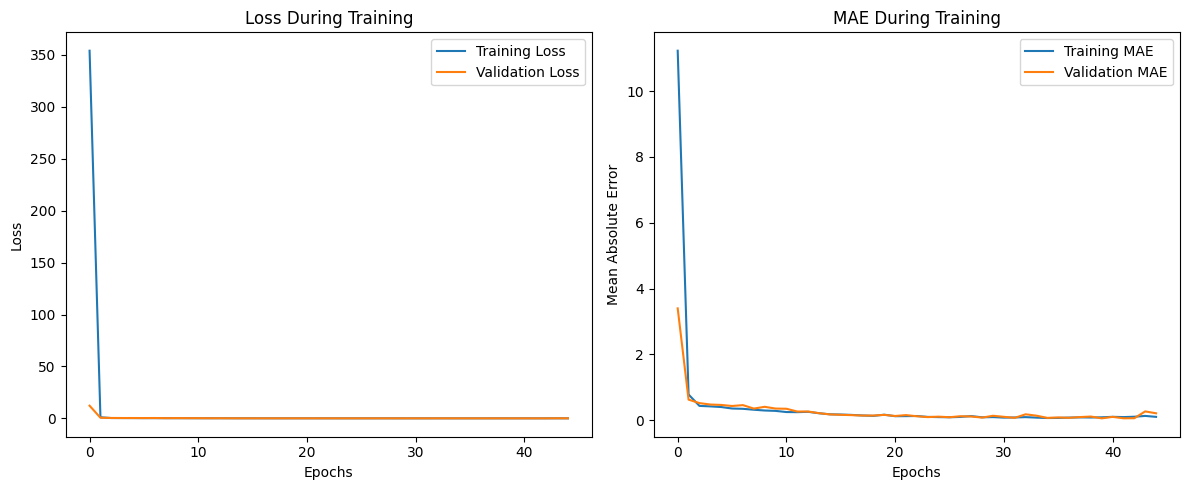

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=x_ffnn_train.shape[1], activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'Adam', loss = tf.keras.losses.MeanSquaredError(),metrics=['mae'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_ffnn_train, y_ffnn_train, validation_data=(x_ffnn_test, y_ffnn_test), epochs=50, batch_size=16, verbose=1,callbacks=[early_stopping])

# Dự đoán
y_pred = model.predict(x_ffnn_test)

# Đảo ngược chuẩn hóa y_pred và y_eval để trả về giá trị gốc
y_pred_original = scaler.inverse_transform(y_pred)  # Dự đoán (gốc)
y_eval_original = scaler.inverse_transform(y_ffnn_test.reshape(-1, 1))  # Giá trị thực tế (gốc)

# Tính toán các chỉ số đánh giá
mse_ffnn_early = mean_squared_error(y_eval_original, y_pred_original)
mae_ffnn_early = mean_absolute_error(y_eval_original, y_pred_original)
r2_ffnn_early = r2_score(y_eval_original, y_pred_original)

# In kết quả
print(f"Mean Squared Error (MSE): {mse_ffnn_early}")
print(f"Mean Absolute Error (MAE): {mae_ffnn_early}")
print(f"R^2 Score: {r2_ffnn_early}")

# # Hiệu suất trên tập huấn luyện
# y_train_pred = model.predict(X_train)
# y_train_pred_original = scaler.inverse_transform(y_train_pred)
# y_train_original = scaler.inverse_transform(y_train)

# mse_train = mean_squared_error(y_train_original, y_train_pred_original)
# mae_train = mean_absolute_error(y_train_original, y_train_pred_original)
# r2_train = r2_score(y_train_original, y_train_pred_original)

# print(f"Train MSE: {mse_train}")
# print(f"Train MAE: {mae_train}")
# print(f"Train R^2: {r2_train}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####Dropout (remove neurons)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error (MSE): 149.32525801399458
Mean Absolute Error (MAE): 9.779710737325377
R^2 Score: 0.7102747231166532


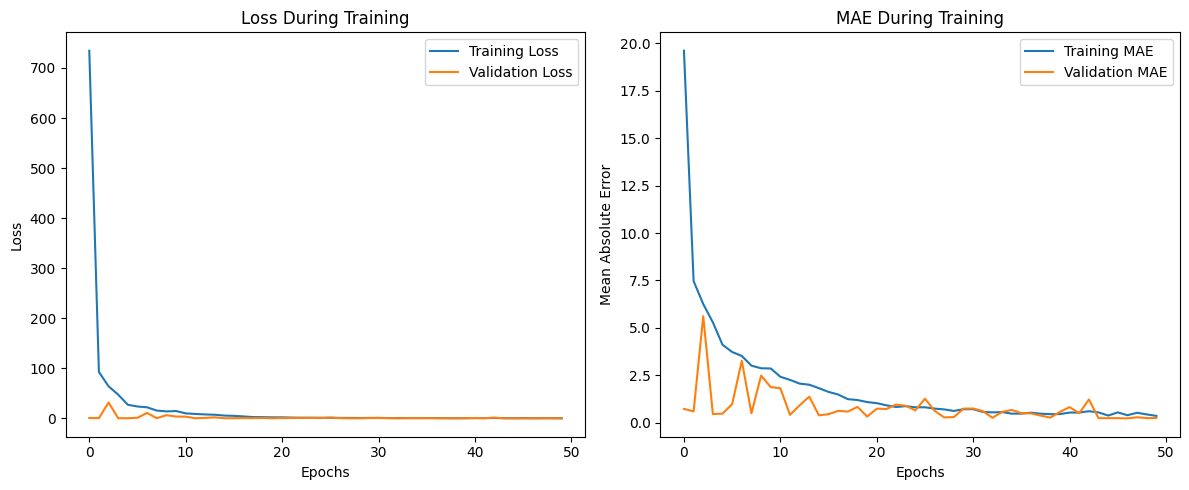

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=x_ffnn_train.shape[1], activation='relu'))
model.add(Dropout(0.1))  # Loại bỏ 10% nơ-ron
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mae'])

history = model.fit(x_ffnn_train, y_ffnn_train, validation_data=(x_ffnn_test, y_ffnn_test), epochs=50, batch_size=16, verbose=0)

# Dự đoán
y_pred = model.predict(x_ffnn_test)

# Đảo ngược chuẩn hóa y_pred và y_eval để trả về giá trị gốc
y_pred_original = scaler.inverse_transform(y_pred)  # Dự đoán (gốc)
y_eval_original = scaler.inverse_transform(y_ffnn_test.reshape(-1, 1))  # Giá trị thực tế (gốc)

# Tính toán các chỉ số đánh giá
mse_ffnn_drop = mean_squared_error(y_eval_original, y_pred_original)
mae_ffnn_drop = mean_absolute_error(y_eval_original, y_pred_original)
r2_ffnn_drop = r2_score(y_eval_original, y_pred_original)

# In kết quả
print(f"Mean Squared Error (MSE): {mse_ffnn_drop}")
print(f"Mean Absolute Error (MAE): {mae_ffnn_drop}")
print(f"R^2 Score: {r2_ffnn_drop}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####L2 Regularization (Weight constraint number)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error (MSE): 48.97619575384306
Mean Absolute Error (MAE): 6.093128850904562
R^2 Score: 0.9049749381705716


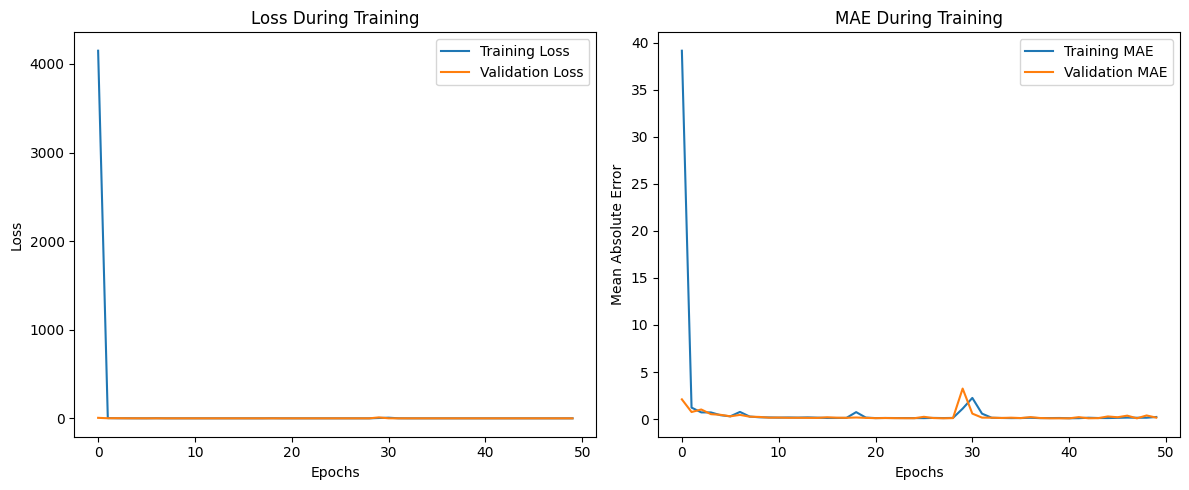

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=x_ffnn_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1))
model.compile(optimizer='Adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mae'])
history = model.fit(x_ffnn_train, y_ffnn_train, validation_data=(x_ffnn_test, y_ffnn_test), epochs=50, batch_size=16, verbose=0)

# Dự đoán
y_pred = model.predict(x_ffnn_test)

# Đảo ngược chuẩn hóa y_pred và y_eval để trả về giá trị gốc
y_pred_original = scaler.inverse_transform(y_pred)  # Dự đoán (gốc)
y_eval_original = scaler.inverse_transform(y_ffnn_test.reshape(-1, 1))  # Giá trị thực tế (gốc)

# Tính toán các chỉ số đánh giá
mse_ffnn_l2 = mean_squared_error(y_eval_original, y_pred_original)
mae_ffnn_l2 = mean_absolute_error(y_eval_original, y_pred_original)
r2_ffnn_l2 = r2_score(y_eval_original, y_pred_original)

# In kết quả
print(f"Mean Squared Error (MSE): {mse_ffnn_l2}")
print(f"Mean Absolute Error (MAE): {mae_ffnn_l2}")
print(f"R^2 Score: {r2_ffnn_l2}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####Compare

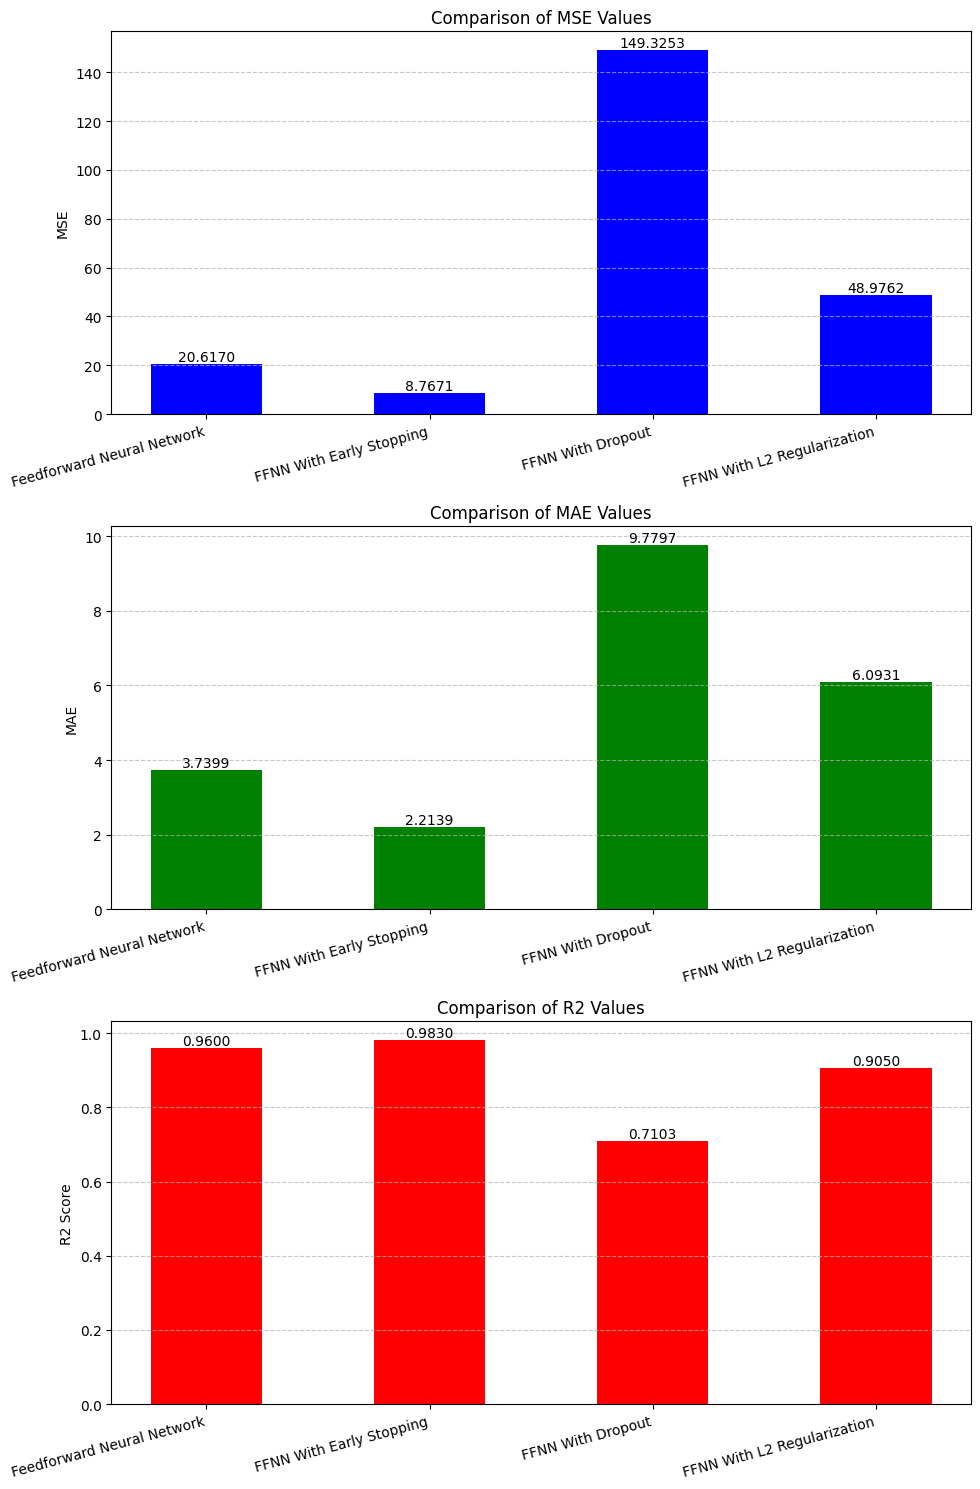

In [ ]:
# Data for visualization
methods = [
    "Feedforward Neural Network",
    "FFNN With Early Stopping",
    "FFNN With Dropout",
    "FFNN With L2 Regularization"
]
mse_values = [
    round(mse_ffnn, 4),
    round(mse_ffnn_early, 4),
    round(mse_ffnn_drop, 4),
    round(mse_ffnn_l2, 4)
]

mae_values = [
    round(mae_ffnn, 4),
    round(mae_ffnn_early, 4),
    round(mae_ffnn_drop, 4),
    round(mae_ffnn_l2, 4)
]

r2_values = [
    round(r2_ffnn, 4),
    round(r2_ffnn_early, 4),
    round(r2_ffnn_drop, 4),
    round(r2_ffnn_l2, 4)
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##Recurrent Neural Network (RNN)

###Task 1: Experiment

In [ ]:
# ---------------------- 1. Xây dựng mô hình ----------------------

# Đầu vào 1: Giá trị Open của 60 ngày trước (chuỗi thời gian)
seq_input = Input(shape=(x_seq_train.shape[1], 1), name="Sequence_Input")
rnn_output = SimpleRNN(64, activation='relu', return_sequences=True)(seq_input)
rnn_output = SimpleRNN(32, activation='relu', return_sequences=False)(rnn_output)

# Đầu vào 2: Các đặc trưng ngày hiện tại (phi chuỗi)
cur_input = Input(shape=(x_cur_train.shape[1],), name="Current_Features_Input")
dense_cur = Dense(32, activation='relu')(cur_input)

# Kết hợp hai đầu vào
combined = concatenate([rnn_output, dense_cur])
dense1 = Dense(64, activation='relu')(combined)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='linear', name="Output")(dense2)

# Tạo mô hình
model = Model(inputs=[seq_input, cur_input], outputs=output)
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

# ---------------------- 2. Huấn luyện mô hình ----------------------

# Định dạng lại x_seq_train để phù hợp với đầu vào RNN
x_seq_train_rnn = x_seq_train.reshape(x_seq_train.shape[0], x_seq_train.shape[1], 1)
x_seq_test_rnn = x_seq_test.reshape(x_seq_test.shape[0], x_seq_test.shape[1], 1)

# Huấn luyện mô hình
history = model.fit(
    [x_seq_train_rnn, x_cur_train], y_train,
    validation_data=([x_seq_test_rnn, x_cur_test], y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# ---------------------- 3. Dự đoán ----------------------
y_pred = model.predict([x_seq_test_rnn, x_cur_test])

# Đảo ngược chuẩn hóa y_pred và y_test
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# ---------------------- 4. Đánh giá mô hình ----------------------
mse_rnn = mean_squared_error(y_test_original, y_pred_original)
mae_rnn = mean_absolute_error(y_test_original, y_pred_original)
r2_rnn = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE): {mse_rnn:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rnn:.4f}")
print(f"R^2 Score: {r2_rnn:.4f}")

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 1042.4846 - mae: 26.3109 - val_loss: 3.4477 - val_mae: 1.7648
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 21.1768 - mae: 3.8089 - val_loss: 0.6296 - val_mae: 0.6537
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.7990 - mae: 1.3919 - val_loss: 4.1663 - val_mae: 1.9649
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.9649 - mae: 0.8153 - val_loss: 1.9829 - val_mae: 1.3023
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.5011 - mae: 0.5785 - val_loss: 0.6897 - val_mae: 0.6862
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3960 - mae: 0.5093 - val_loss: 0.9246 - val_mae: 0.8287
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3728 - mae: 0.4848 - val_loss: 0.6929 - val_mae: 0.6942
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.3295 - mae: 0.4636 - val_loss: 0.6241 - val_mae: 0.6544
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 

###Task 2: Apply techniques to prevent overfitting and plot training graphs

####Early Stopping

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - loss: 9898.7197 - mae: 77.7573 - val_loss: 42.2649 - val_mae: 6.4114
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 95.4938 - mae: 8.2386 - val_loss: 13.6582 - val_mae: 3.5418
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 11.7993 - mae: 2.9432 - val_loss: 9.7487 - val_mae: 2.9459
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 1.7516 - mae: 1.0730 - val_loss: 2.1602 - val_mae: 1.1820
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.9888 - mae: 0.7847 - val_loss: 3.1997 - val_mae: 1.4959
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.9391 - mae: 0.7546 - val_loss: 3.1902 - val_mae: 1.5024
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.7922 - mae: 0.7020 - val_loss: 2.6909 - val_mae: 1.3586
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.5455 - mae: 0.5762 - val_loss: 1.7368 - val_mae: 1.0606
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - lo

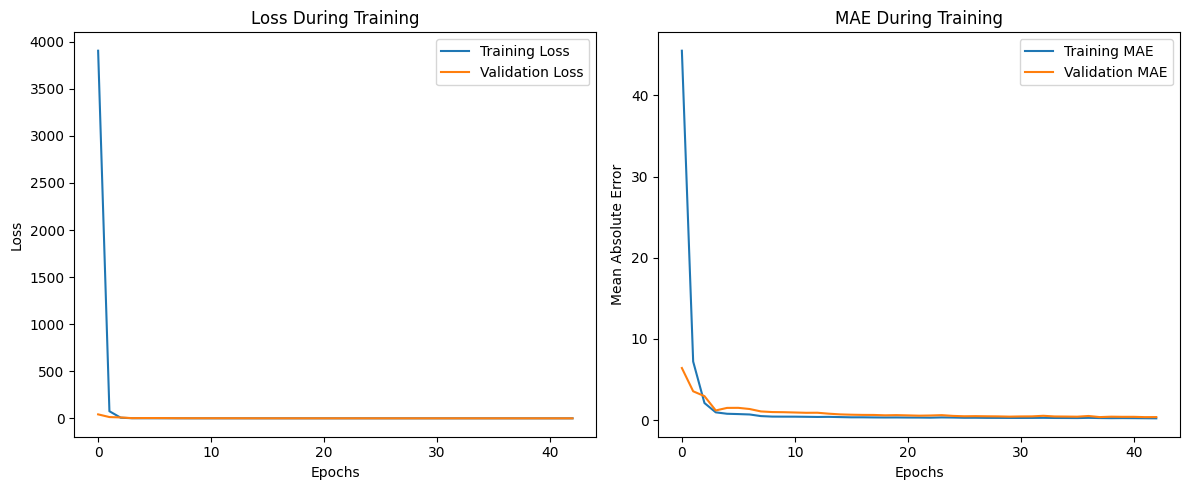

In [ ]:
seq_input = Input(shape=(x_seq_train.shape[1], 1), name="Sequence_Input")
rnn_output = SimpleRNN(64, activation='relu', return_sequences=True)(seq_input)
rnn_output = SimpleRNN(32, activation='relu', return_sequences=False)(rnn_output)

# Đầu vào 2: Các đặc trưng ngày hiện tại (phi chuỗi)
cur_input = Input(shape=(x_cur_train.shape[1],), name="Current_Features_Input")
dense_cur = Dense(32, activation='relu')(cur_input)

# Kết hợp hai đầu vào
combined = concatenate([rnn_output, dense_cur])
dense1 = Dense(64, activation='relu')(combined)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='linear', name="Output")(dense2)

# Tạo mô hình
model = Model(inputs=[seq_input, cur_input], outputs=output)
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Định dạng lại x_seq_train để phù hợp với đầu vào RNN
x_seq_train_rnn = x_seq_train.reshape(x_seq_train.shape[0], x_seq_train.shape[1], 1)
x_seq_test_rnn = x_seq_test.reshape(x_seq_test.shape[0], x_seq_test.shape[1], 1)

# Huấn luyện mô hình
history = model.fit(
    [x_seq_train_rnn, x_cur_train], y_train,
    validation_data=([x_seq_test_rnn, x_cur_test], y_test),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks = [early_stopping]
)

# ---------------------- 3. Dự đoán ----------------------
y_pred = model.predict([x_seq_test_rnn, x_cur_test])

# Đảo ngược chuẩn hóa y_pred và y_test
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# ---------------------- 4. Đánh giá mô hình ----------------------
mse_rnn_early = mean_squared_error(y_test_original, y_pred_original)
mae_rnn_early = mean_absolute_error(y_test_original, y_pred_original)
r2_rnn_early = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE): {mse_rnn_early:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rnn_early:.4f}")
print(f"R^2 Score: {r2_rnn_early:.4f}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####Dropout

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 8467.3076 - mae: 71.6992 - val_loss: 5.9478 - val_mae: 2.1535
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 119.4279 - mae: 9.2631 - val_loss: 47.0460 - val_mae: 6.7640
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - loss: 9.8046 - mae: 2.6106 - val_loss: 1.7148 - val_mae: 1.0835
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 1.5142 - mae: 0.9838 - val_loss: 4.1338 - val_mae: 1.7395
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.9931 - mae: 0.8034 - val_loss: 3.3197 - val_mae: 1.5329
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 0.9256 - mae: 0.7800 - val_loss: 3.3508 - val_mae: 1.5469
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.8352 - mae: 0.7499 - val_loss: 2.3237 - val_mae: 1.2868
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.6104 - mae: 0.6485 - val_loss: 0.5373 - val_mae: 0.6246
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss

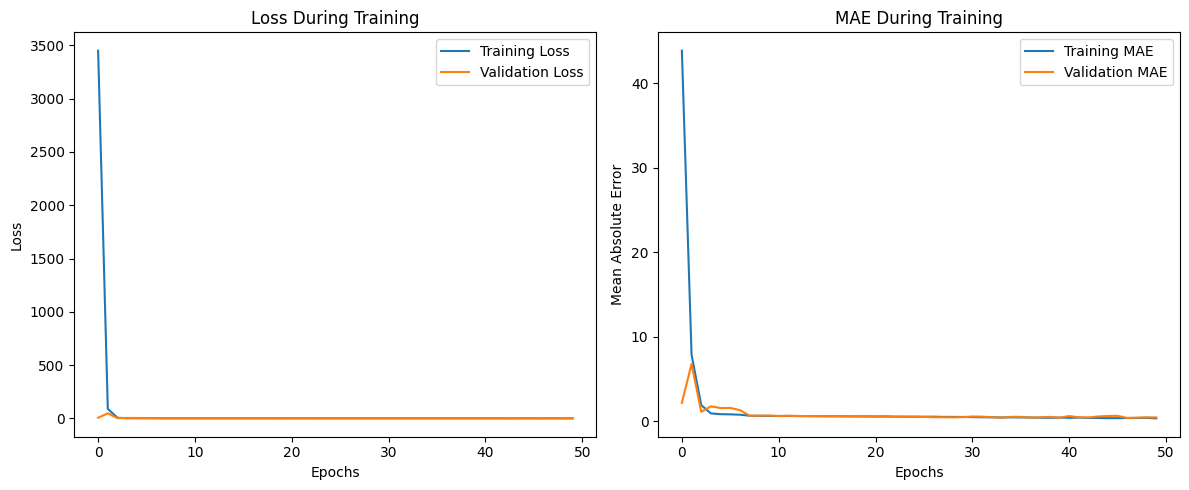

In [ ]:
seq_input = Input(shape=(x_seq_train.shape[1], 1), name="Sequence_Input")
rnn_output = SimpleRNN(64, activation='relu', return_sequences=True)(seq_input)
rnn_output = SimpleRNN(32, activation='relu', return_sequences=False)(rnn_output)

# Đầu vào 2: Các đặc trưng ngày hiện tại (phi chuỗi)
cur_input = Input(shape=(x_cur_train.shape[1],), name="Current_Features_Input")
dense_cur = Dense(32, activation='relu')(cur_input)

# Kết hợp hai đầu vào
combined = concatenate([rnn_output, dense_cur])
dense1 = Dense(64, activation='relu')(combined)
dropout = Dropout(0.1)(dense1)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='linear', name="Output")(dense2)

# Tạo mô hình
model = Model(inputs=[seq_input, cur_input], outputs=output)
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

# Định dạng lại x_seq_train để phù hợp với đầu vào RNN
x_seq_train_rnn = x_seq_train.reshape(x_seq_train.shape[0], x_seq_train.shape[1], 1)
x_seq_test_rnn = x_seq_test.reshape(x_seq_test.shape[0], x_seq_test.shape[1], 1)

# Huấn luyện mô hình
history = model.fit(
    [x_seq_train_rnn, x_cur_train], y_train,
    validation_data=([x_seq_test_rnn, x_cur_test], y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# ---------------------- 3. Dự đoán ----------------------
y_pred = model.predict([x_seq_test_rnn, x_cur_test])

# Đảo ngược chuẩn hóa y_pred và y_test
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# ---------------------- 4. Đánh giá mô hình ----------------------
mse_rnn_drop = mean_squared_error(y_test_original, y_pred_original)
mae_rnn_drop = mean_absolute_error(y_test_original, y_pred_original)
r2_rnn_drop = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE): {mse_rnn_drop:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rnn_drop:.4f}")
print(f"R^2 Score: {r2_rnn_drop:.4f}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####L2 Regularization (Weight constraint number)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 158.8070 - mae: 10.5574 - val_loss: 5.1080 - val_mae: 1.9848
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.2927 - mae: 2.2255 - val_loss: 1.3254 - val_mae: 0.6843
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.9601 - mae: 0.4808 - val_loss: 1.4240 - val_mae: 0.8338
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.6039 - mae: 0.2755 - val_loss: 0.5244 - val_mae: 0.2543
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.4863 - mae: 0.2214 - val_loss: 0.4301 - val_mae: 0.1958
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.5098 - mae: 0.3137 - val_loss: 0.3865 - val_mae: 0.1787
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.3945 - mae: 0.2035 - val_loss: 0.3767 - val_mae: 0.1994
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.3668 - mae: 0.1895 - val_loss: 0.3470 - val_mae: 0.1761
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.

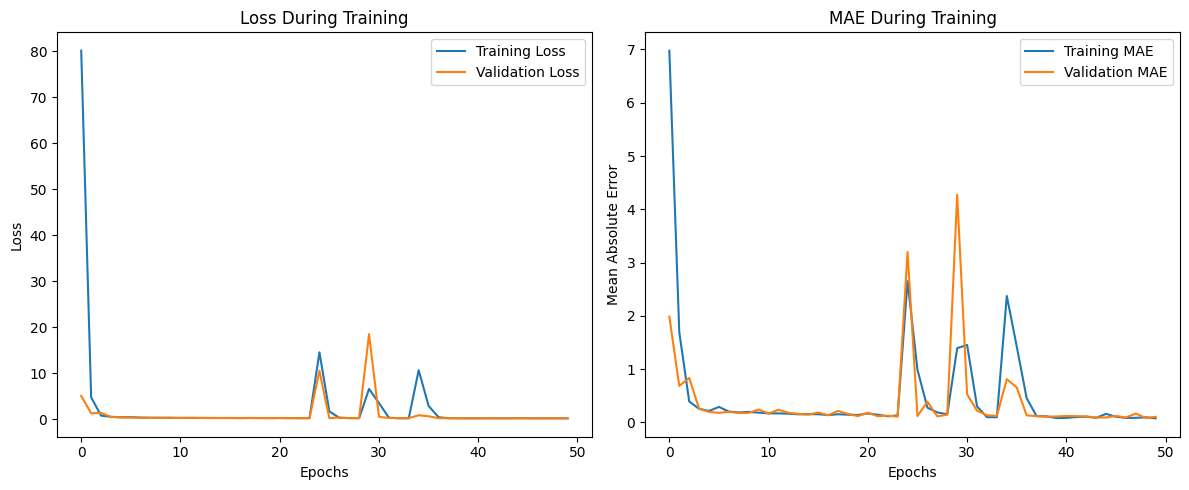

In [ ]:
seq_input = Input(shape=(x_seq_train.shape[1], 1), name="Sequence_Input")
rnn_output = SimpleRNN(64, activation='relu', return_sequences=True)(seq_input)
rnn_output = SimpleRNN(32, activation='relu', return_sequences=False)(rnn_output)

# Đầu vào 2: Các đặc trưng ngày hiện tại (phi chuỗi)
cur_input = Input(shape=(x_cur_train.shape[1],), name="Current_Features_Input")
dense_cur = Dense(32, activation='relu')(cur_input)

# Kết hợp hai đầu vào
combined = concatenate([rnn_output, dense_cur])
dense1 = Dense(64, activation='relu',kernel_regularizer=l2(0.01))(combined)
dense2 = Dense(32, activation='relu',kernel_regularizer=l2(0.01))(dense1)
output = Dense(1, activation='linear', name="Output")(dense2)

# Tạo mô hình
model = Model(inputs=[seq_input, cur_input], outputs=output)
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

# Định dạng lại x_seq_train để phù hợp với đầu vào RNN
x_seq_train_rnn = x_seq_train.reshape(x_seq_train.shape[0], x_seq_train.shape[1], 1)
x_seq_test_rnn = x_seq_test.reshape(x_seq_test.shape[0], x_seq_test.shape[1], 1)

# Huấn luyện mô hình
history = model.fit(
    [x_seq_train_rnn, x_cur_train], y_train,
    validation_data=([x_seq_test_rnn, x_cur_test], y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# ---------------------- 3. Dự đoán ----------------------
y_pred = model.predict([x_seq_test_rnn, x_cur_test])

# Đảo ngược chuẩn hóa y_pred và y_test
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# ---------------------- 4. Đánh giá mô hình ----------------------
mse_rnn_l2 = mean_squared_error(y_test_original, y_pred_original)
mae_rnn_l2 = mean_absolute_error(y_test_original, y_pred_original)
r2_rnn_l2 = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE): {mse_rnn_l2:.4f}")
print(f"Mean Absolute Error (MAE): {mae_rnn_l2:.4f}")
print(f"R^2 Score: {r2_rnn_l2:.4f}")

# Vẽ đồ thị loss và mae trong quá trình đào tạo
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

####Compare

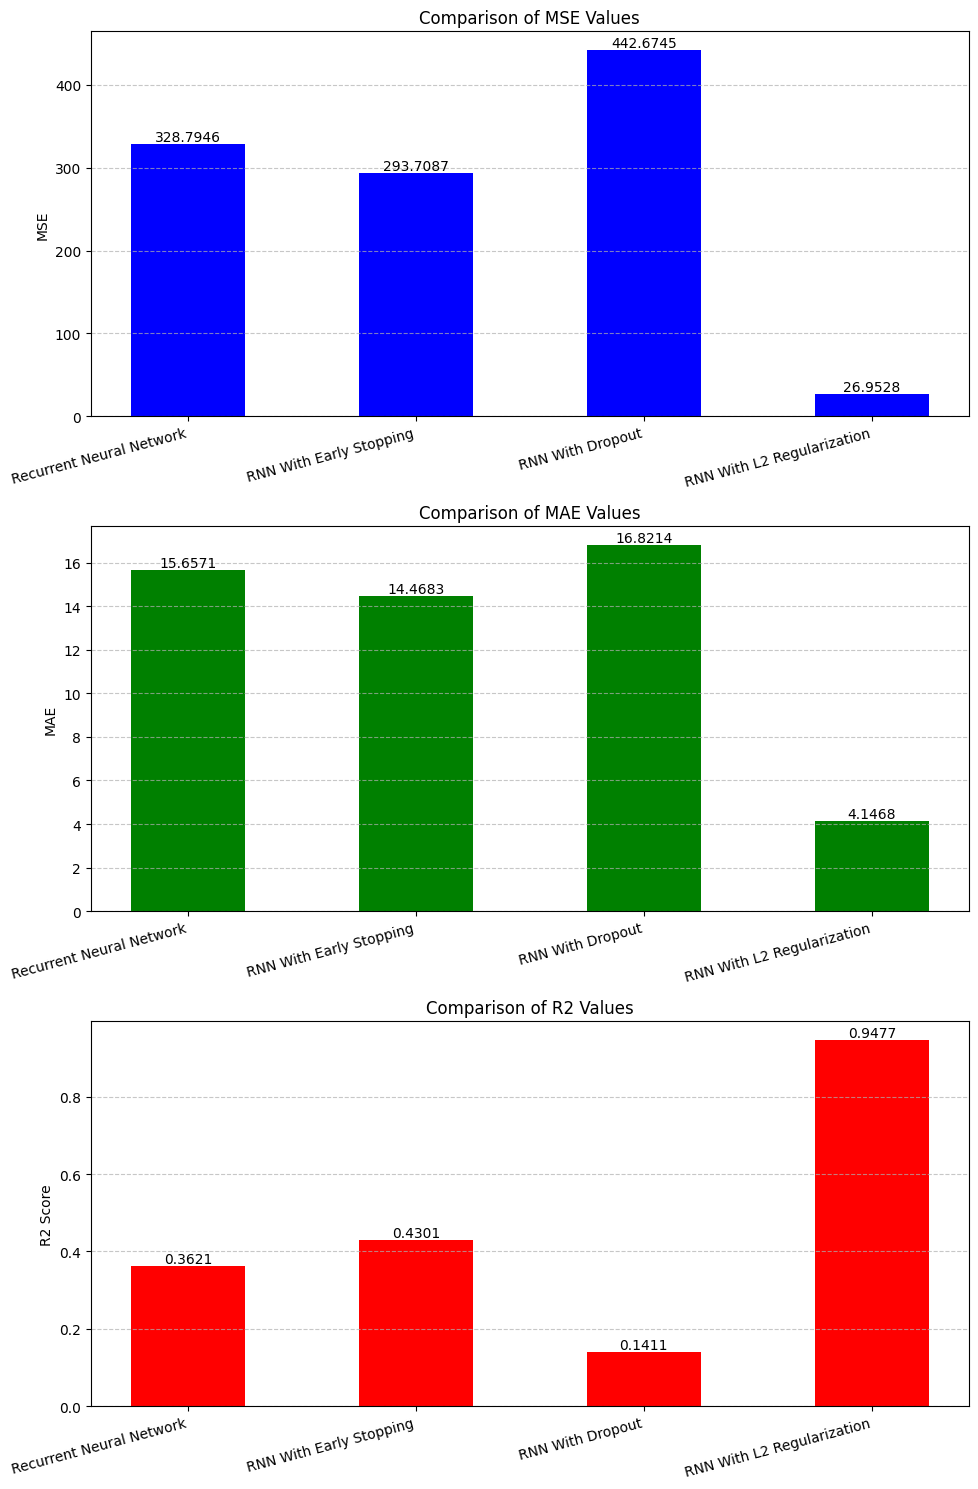

In [ ]:
# Data for visualization
methods = [
    "Recurrent Neural Network",
    "RNN With Early Stopping",
    "RNN With Dropout",
    "RNN With L2 Regularization"
]
mse_values = [
    round(mse_rnn, 4),
    round(mse_rnn_early, 4),
    round(mse_rnn_drop, 4),
    round(mse_rnn_l2, 4)
]

mae_values = [
    round(mae_rnn, 4),
    round(mae_rnn_early, 4),
    round(mae_rnn_drop, 4),
    round(mae_rnn_l2, 4)
]

r2_values = [
    round(r2_rnn, 4),
    round(r2_rnn_early, 4),
    round(r2_rnn_drop, 4),
    round(r2_rnn_l2, 4)
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##Linear Regression


In [ ]:
# Chuẩn bị dữ liệu đầu vào
# Kết hợp dữ liệu tuần tự và đặc trưng hiện tại cho Linear Regression
def prepare_linear_regression_data(x_seq, x_cur, y):
    x_combined = np.hstack((x_seq.reshape(x_seq.shape[0], -1), x_cur))  # Kết hợp x_seq và x_cur
    return x_combined, y

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
x_lr_train, y_lr_train = prepare_linear_regression_data(x_seq_train, x_cur_train, y_train)
x_lr_test, y_lr_test = prepare_linear_regression_data(x_seq_test, x_cur_test, y_test)

###Task 1: Experiment

In [ ]:
# Huấn luyện mô hình Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_lr_train, y_lr_train)

# Dự đoán trên tập kiểm tra
lr_preds = lr_model.predict(x_lr_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_lr_test_original = scaler.inverse_transform(y_lr_test.reshape(-1, 1))
lr_preds_original = scaler.inverse_transform(lr_preds.reshape(-1, 1))

# Đánh giá mô hình Linear Regression
lr_mse = mean_squared_error(y_lr_test_original, lr_preds_original)
lr_mae = mean_absolute_error(y_lr_test_original, lr_preds_original)
lr_r2 = r2_score(y_lr_test_original, lr_preds_original)

# In kết quả
print(f"Linear Regression - MSE: {lr_mse:.4f}, MAE: {lr_mae:.4f}, R2: {lr_r2:.4f}")

Linear Regression - MSE: 1.4320, MAE: 0.8689, R2: 0.9972


###Task 2: Apply techniques to prevent overfitting and plot training graphs


####Cross-Validation

Cross-Validation Results for Linear Regression:
Mean MSE (CV): 0.0006
Mean MAE (CV): 0.0180
Mean R² (CV): 0.9935


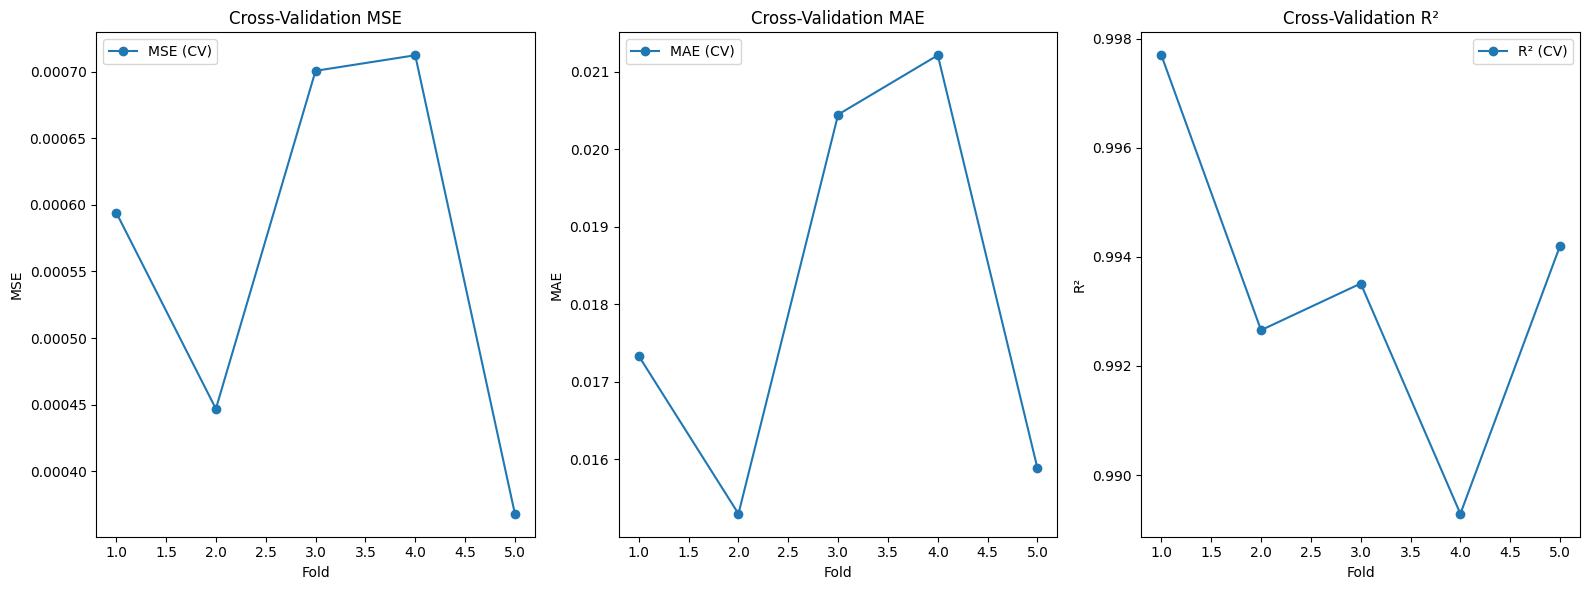

In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

lr_model = LinearRegression()

# Cross-validation for MSE, MAE, and R²
cv_mse = cross_val_score(lr_model, x_lr_train, y_lr_train, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(lr_model, x_lr_train, y_lr_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(lr_model, x_lr_train, y_lr_train, cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
lr_cv_mse = -cv_mse
lr_cv_mae = -cv_mae
lr_cv_r2 = cv_r2

# Calculate mean values
lr_mean_cv_mse = np.mean(lr_cv_mse)
lr_mean_cv_mae = np.mean(lr_cv_mae)
lr_mean_cv_r2 = np.mean(lr_cv_r2)

# Print results
print("Cross-Validation Results for Linear Regression:")
print(f"Mean MSE (CV): {lr_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {lr_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {lr_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(lr_cv_mse) + 1), lr_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(lr_cv_mae) + 1), lr_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(lr_cv_r2) + 1), lr_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()

####L2 Regularization (Ridge Regression)

Ridge Regression Results:
Test MSE: 0.0012
Test MAE: 0.0242
Test R²: 0.9963
Cross-Validation Results for Ridge Regression:
Mean MSE (CV): 0.0009
Mean MAE (CV): 0.0228
Mean R² (CV): 0.9897


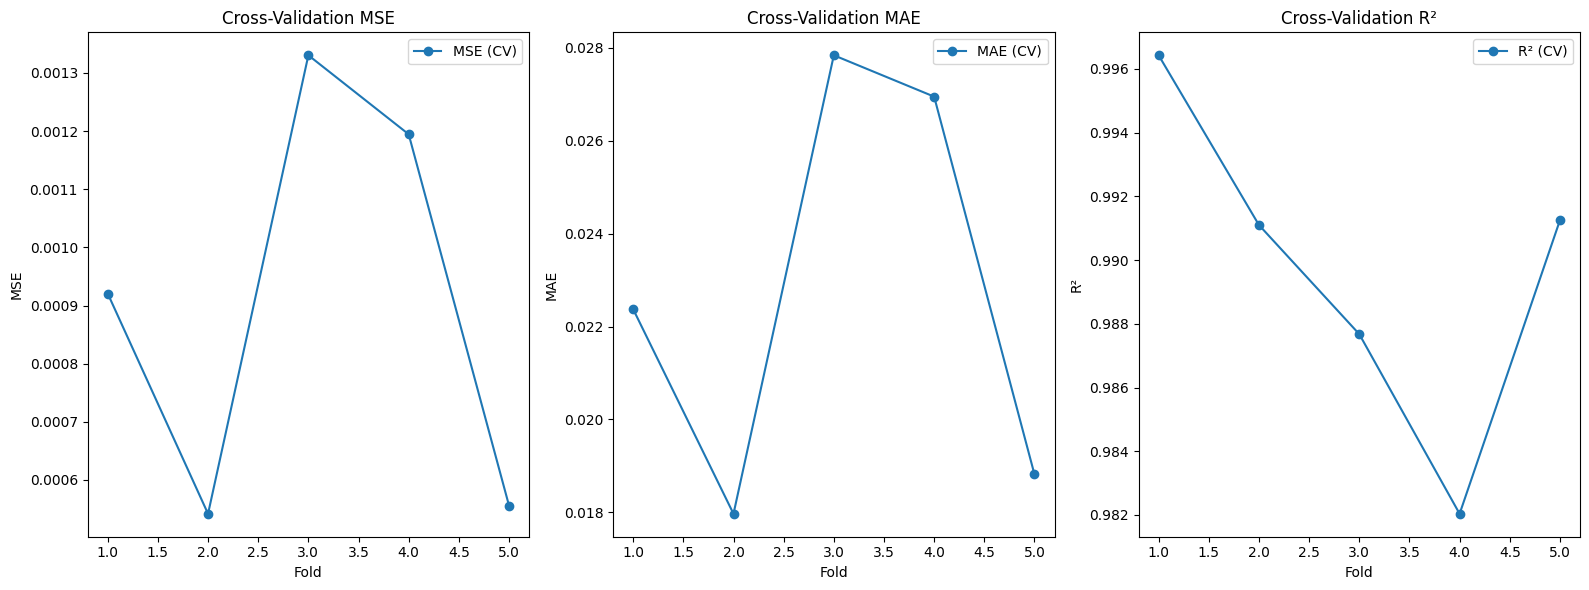

In [ ]:
# Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Perform Cross-Validation
cv_mse_scores = cross_val_score(ridge_model, x_lr_train, y_lr_train, cv=5, scoring='neg_mean_squared_error')
cv_mae_scores = cross_val_score(ridge_model, x_lr_train, y_lr_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(ridge_model, x_lr_train, y_lr_train, cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
ridge_cv_mse = -cv_mse_scores
ridge_cv_mae = -cv_mae_scores
ridge_cv_r2 = cv_r2_scores

# Calculate mean values
ridge_mean_cv_mse = np.mean(ridge_cv_mse)
ridge_mean_cv_mae = np.mean(ridge_cv_mae)
ridge_mean_cv_r2 = np.mean(ridge_cv_r2)

# Train the model
ridge_model.fit(x_lr_train, y_lr_train)

# Predict on evaluation set
ridge_preds = ridge_model.predict(x_lr_test)

# Evaluate on test set
ridge_mse = mean_squared_error(y_lr_test, ridge_preds)
ridge_mae = mean_absolute_error(y_lr_test, ridge_preds)
ridge_r2 = r2_score(y_lr_test, ridge_preds)

# Print results
print("Ridge Regression Results:")
print(f"Test MSE: {ridge_mse:.4f}")
print(f"Test MAE: {ridge_mae:.4f}")
print(f"Test R²: {ridge_r2:.4f}")
# Print results
print("Cross-Validation Results for Ridge Regression:")
print(f"Mean MSE (CV): {ridge_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {ridge_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {ridge_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(ridge_cv_mse) + 1), ridge_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(ridge_cv_mae) + 1), ridge_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(ridge_cv_r2) + 1), ridge_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()

####Compare

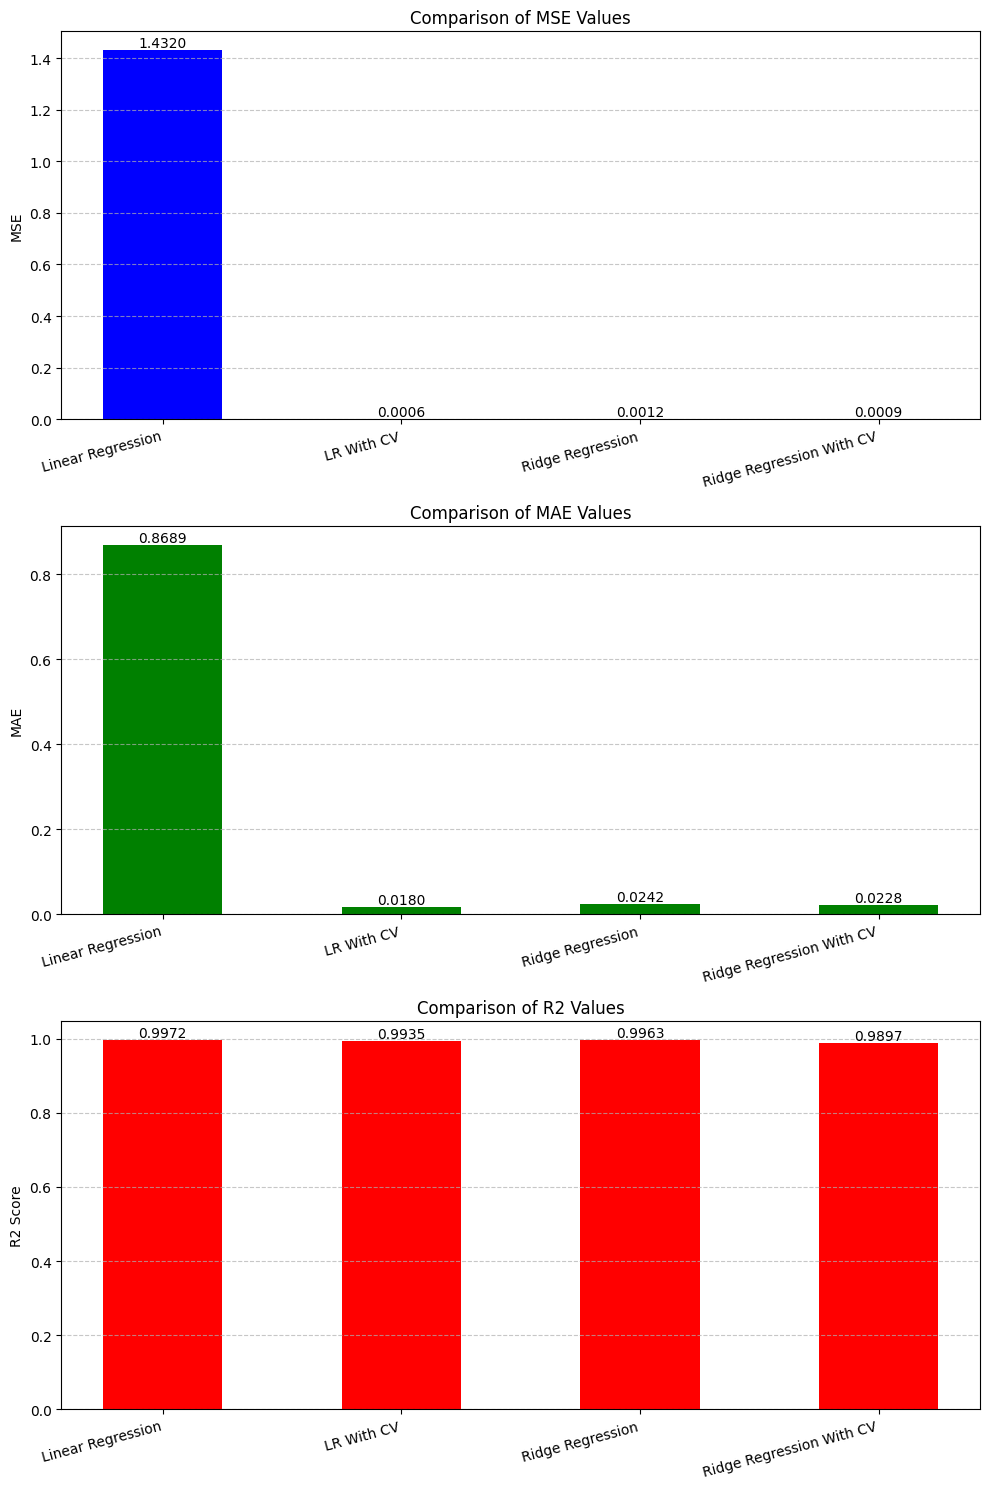

In [ ]:
# Data for visualization
methods = [
    "Linear Regression",
    "LR With CV",
    "Ridge Regression",
    "Ridge Regression With CV"
]
mse_values = [
    round(lr_mse, 4),
    round(lr_mean_cv_mse, 4),
    round(ridge_mse, 4),
    round(ridge_mean_cv_mse, 4)
]

mae_values = [
    round(lr_mae, 4),
    round(lr_mean_cv_mae, 4),
    round(ridge_mae, 4),
    round(ridge_mean_cv_mae, 4)
]

r2_values = [
    round(lr_r2, 4),
    round(lr_mean_cv_r2, 4),
    round(ridge_r2, 4),
    round(ridge_mean_cv_r2, 4)
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##SVM

In [ ]:
# Chuẩn bị dữ liệu đầu vào
# Kết hợp dữ liệu tuần tự và đặc trưng hiện tại cho SVM
def prepare_svm_data(x_seq, x_cur, y):
    x_combined = np.hstack((x_seq.reshape(x_seq.shape[0], -1), x_cur))  # Kết hợp x_seq và x_cur
    return x_combined, y

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
x_svm_train, y_svm_train = prepare_svm_data(x_seq_train, x_cur_train, y_train)
x_svm_test, y_svm_test = prepare_svm_data(x_seq_test, x_cur_test, y_test)

###Task 1: Experiment

In [ ]:
# Huấn luyện mô hình SVM
svm_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svm_model.fit(x_svm_train, y_svm_train.ravel())  # Sử dụng .ravel() để làm phẳng y_train

# Dự đoán trên tập kiểm tra
svm_preds = svm_model.predict(x_svm_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_svm_test_original = scaler.inverse_transform(y_svm_test.reshape(-1, 1))
svm_preds_original = scaler.inverse_transform(svm_preds.reshape(-1, 1))

# Đánh giá mô hình SVM
svm_mse = mean_squared_error(y_svm_test_original, svm_preds_original)
svm_mae = mean_absolute_error(y_svm_test_original, svm_preds_original)
svm_r2 = r2_score(y_svm_test_original, svm_preds_original)

# In kết quả
print(f"SVM - MSE: {svm_mse:.4f}, MAE: {svm_mae:.4f}, R2: {svm_r2:.4f}")

SVM - MSE: 297.6432, MAE: 14.2968, R2: 0.4225


###Task 2: Apply techniques to prevent overfitting and plot training graphs

####Cross-Validation

Cross-Validation Results for SVM Regression:
Mean MSE (CV): 0.1445
Mean MAE (CV): 0.3019
Mean R² (CV): -0.3032


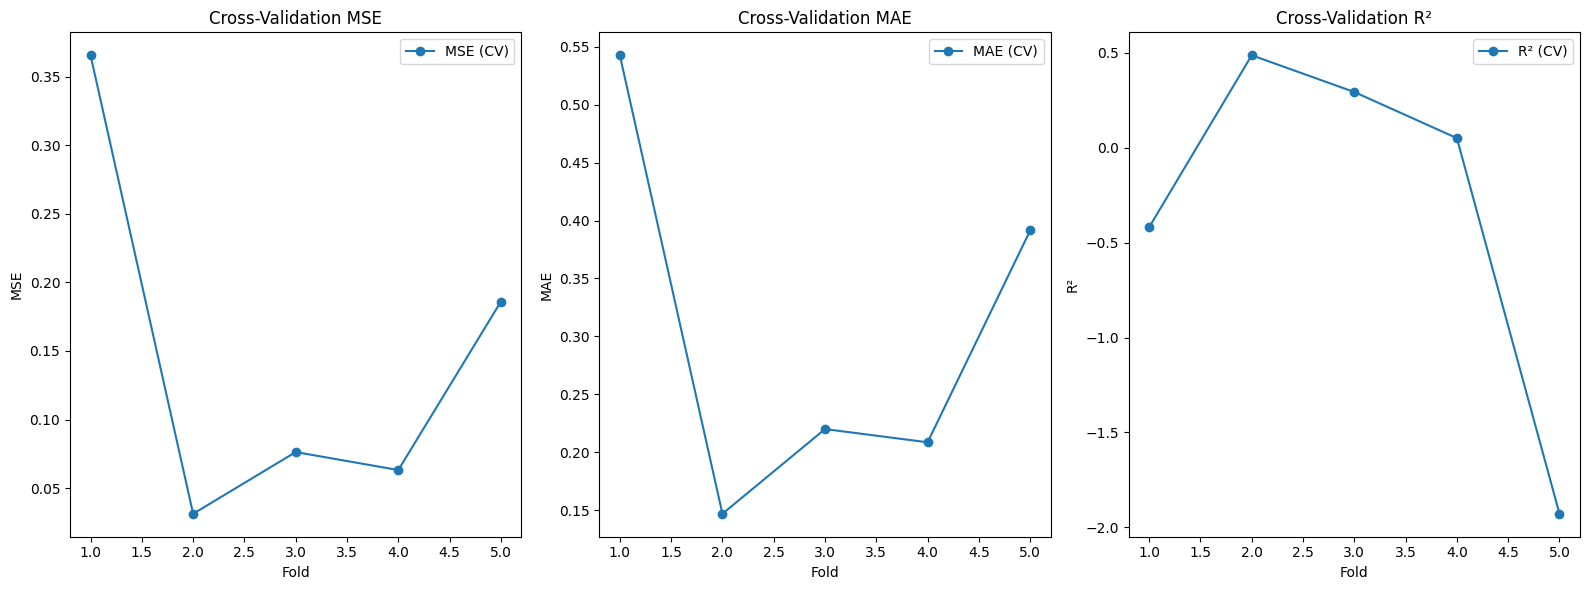

In [ ]:
# Ensure y_train is 1D arrays
y_train_cv = y_svm_train.ravel()

# Cross-validation for MSE, MAE, and R²
cv_mse = cross_val_score(svm_model, x_svm_train, y_train_cv, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(svm_model, x_svm_train, y_train_cv, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(svm_model, x_svm_train, y_train_cv, cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
svm_cv_mse = -cv_mse
svm_cv_mae = -cv_mae
svm_cv_r2 = cv_r2

# Calculate mean values
svm_mean_cv_mse = np.mean(svm_cv_mse)
svm_mean_cv_mae = np.mean(svm_cv_mae)
svm_mean_cv_r2 = np.mean(svm_cv_r2)

# Print results
print("Cross-Validation Results for SVM Regression:")
print(f"Mean MSE (CV): {svm_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {svm_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {svm_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(svm_cv_mse) + 1), svm_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(svm_cv_mae) + 1), svm_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(svm_cv_r2) + 1), svm_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()

####Kernel Tuning

SVM Regression Results with new Kernel:
Test MSE: 0.1130
Test MAE: 0.2789
Test R²: 0.6506

Cross-Validation Results with new Kernel (SVM):
Mean MSE (CV): 0.0940
Mean MAE (CV): 0.2462
Mean R² (CV): 0.0903


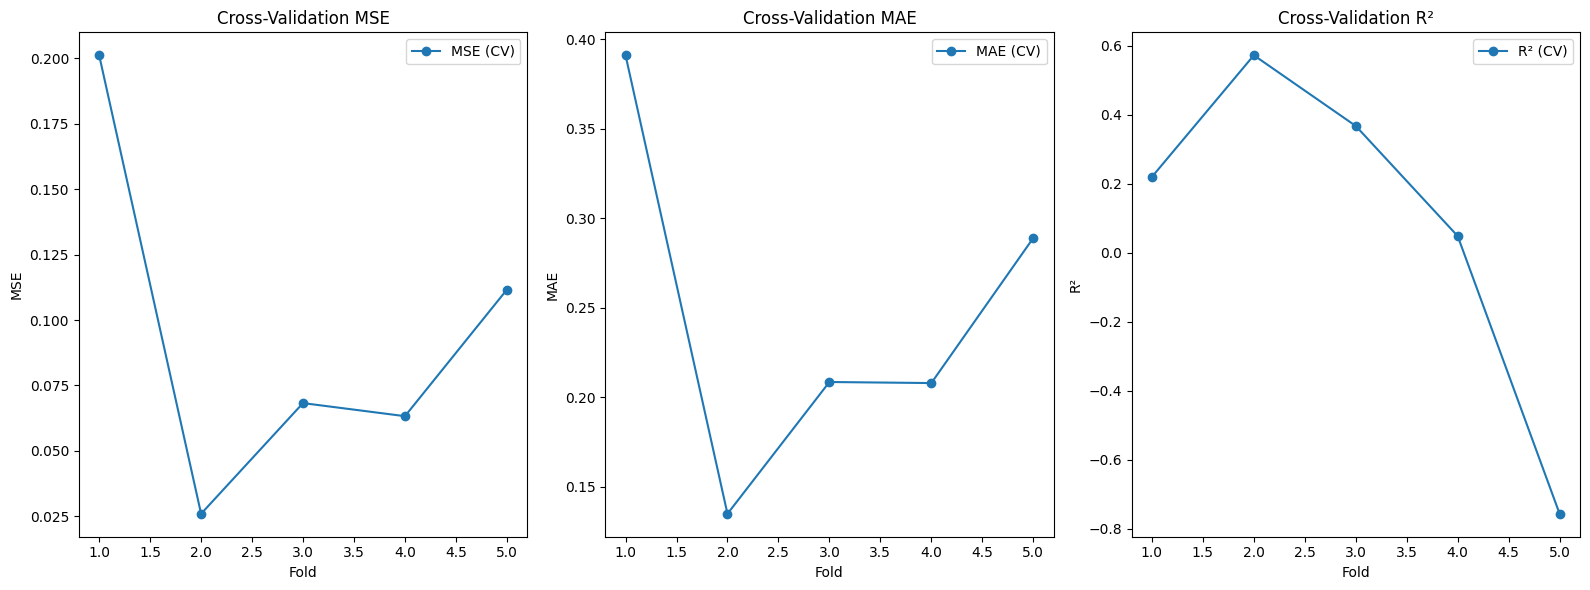

In [ ]:
# Using a Polynomial Kernel
svm_model = SVR(kernel='poly', C=100, degree=3, epsilon=0.1)

# Cross-validation for MSE, MAE, and R²
cv_mse = cross_val_score(svm_model, x_svm_train, y_svm_train.ravel(), cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(svm_model, x_svm_train, y_svm_train.ravel(), cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(svm_model, x_svm_train, y_svm_train.ravel(), cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
svmpoly_cv_mse = -cv_mse
svmpoly_cv_mae = -cv_mae
svmpoly_cv_r2 = cv_r2

# Calculate mean values
svmpoly_mean_cv_mse = np.mean(svmpoly_cv_mse)
svmpoly_mean_cv_mae = np.mean(svmpoly_cv_mae)
svmpoly_mean_cv_r2 = np.mean(svmpoly_cv_r2)

# Train the model
svm_model.fit(x_svm_train, y_svm_train.ravel())

# Predict on evaluation set
svm_preds = svm_model.predict(x_svm_test)

# Evaluate on test set
svmpoly_mse = mean_squared_error(y_svm_test, svm_preds)
svmpoly_mae = mean_absolute_error(y_svm_test, svm_preds)
svmpoly_r2 = r2_score(y_svm_test, svm_preds)

# Print results
print("SVM Regression Results with new Kernel:")
print(f"Test MSE: {svmpoly_mse:.4f}")
print(f"Test MAE: {svmpoly_mae:.4f}")
print(f"Test R²: {svmpoly_r2:.4f}")
print("\nCross-Validation Results with new Kernel (SVM):")
print(f"Mean MSE (CV): {svmpoly_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {svmpoly_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {svmpoly_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(svmpoly_cv_mse) + 1), svmpoly_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(svmpoly_cv_mae) + 1), svmpoly_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(svmpoly_cv_r2) + 1), svmpoly_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()


####Compare

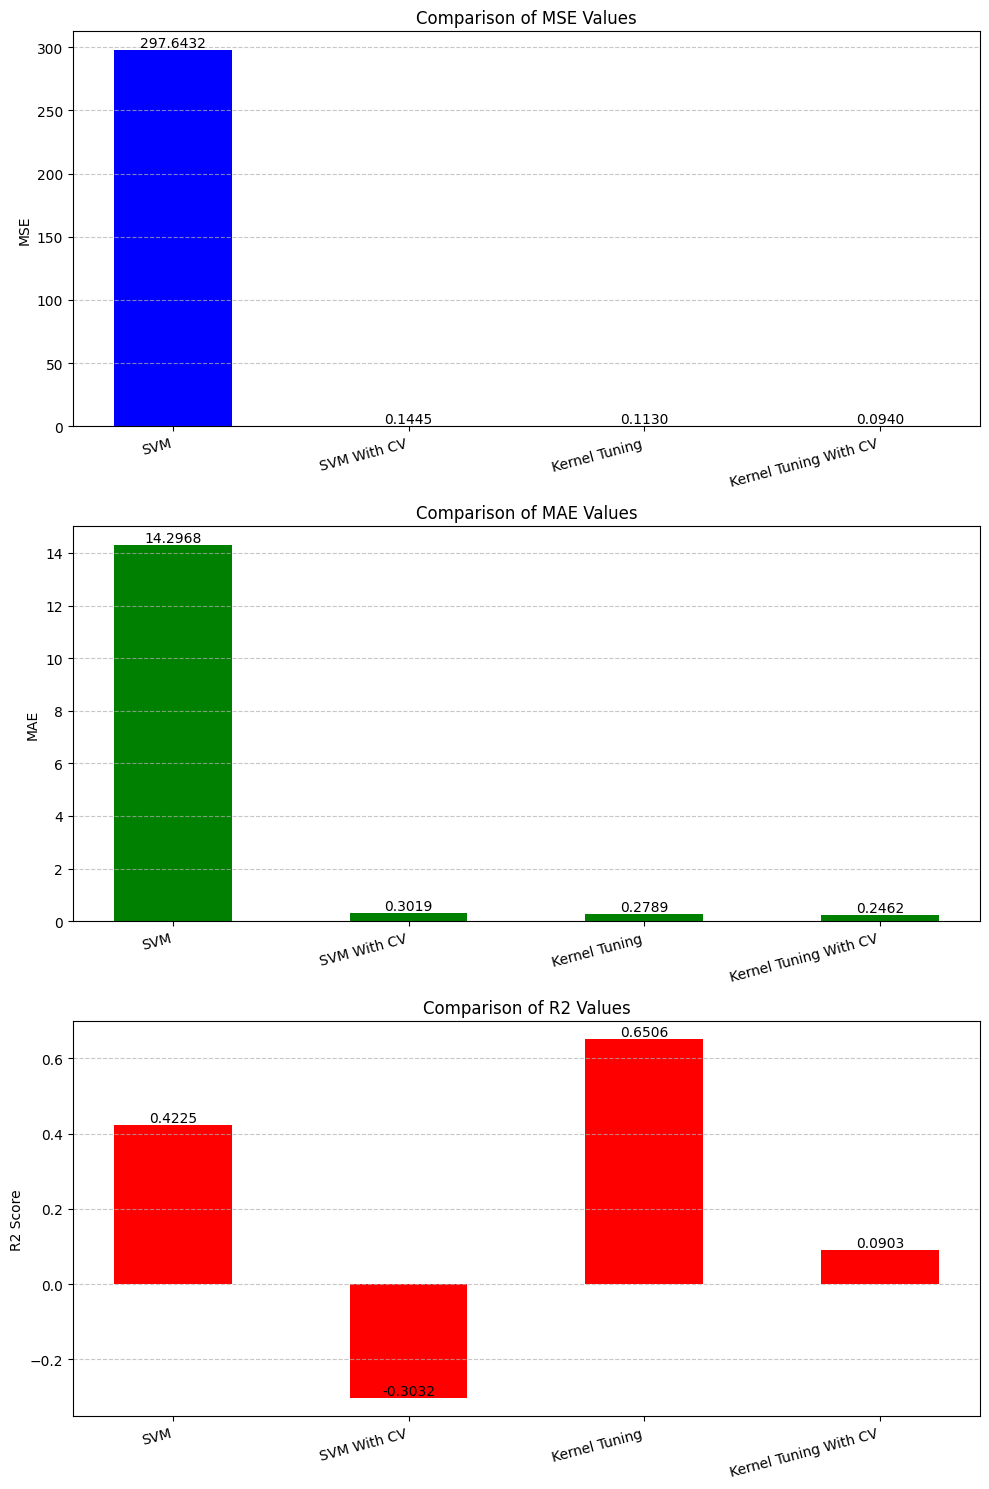

In [ ]:
# Data for visualization
methods = [
    "SVM",
    "SVM With CV",
    "Kernel Tuning",
    "Kernel Tuning With CV"
]
mse_values = [
    round(svm_mse, 4),
    round(svm_mean_cv_mse, 4),
    round(svmpoly_mse, 4),
    round(svmpoly_mean_cv_mse, 4)
]

mae_values = [
    round(svm_mae, 4),
    round(svm_mean_cv_mae, 4),
    round(svmpoly_mae, 4),
    round(svmpoly_mean_cv_mae, 4)
]

r2_values = [
    round(svm_r2, 4),
    round(svm_mean_cv_r2, 4),
    round(svmpoly_r2, 4),
    round(svmpoly_mean_cv_r2, 4)
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##Decision Tree

In [ ]:
# Kết hợp dữ liệu tuần tự và đặc trưng hiện tại
def prepare_decision_tree_data(x_seq, x_cur, y):
    x_combined = np.hstack((x_seq.reshape(x_seq.shape[0], -1), x_cur))  # Kết hợp x_seq và x_cur
    return x_combined, y

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
x_dt_train, y_dt_train = prepare_decision_tree_data(x_seq_train, x_cur_train, y_train)
x_dt_test, y_dt_test = prepare_decision_tree_data(x_seq_test, x_cur_test, y_test)

###Task 1: Experiment

In [ ]:
# Huấn luyện mô hình Decision Tree
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(x_dt_train, y_dt_train)

# Dự đoán trên tập kiểm tra
dt_preds = dt_model.predict(x_dt_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_dt_test_original = scaler.inverse_transform(y_dt_test.reshape(-1, 1))
dt_preds_original = scaler.inverse_transform(dt_preds.reshape(-1, 1))

# Đánh giá mô hình Decision Tree
dt_mse = mean_squared_error(y_dt_test_original, dt_preds_original)
dt_mae = mean_absolute_error(y_dt_test_original, dt_preds_original)
dt_r2 = r2_score(y_dt_test_original, dt_preds_original)

# In kết quả
print(f"Decision Tree - MSE: {dt_mse:.4f}, MAE: {dt_mae:.4f}, R²: {dt_r2:.4f}")

Decision Tree - MSE: 396.4295, MAE: 14.3887, R²: 0.2308


###Task 2: Apply techniques to prevent overfitting and plot training graphs

####Cross-Validation

Mean MSE (CV): 0.1047
Mean MAE (CV): 0.1449
Mean R² (CV): 0.5317


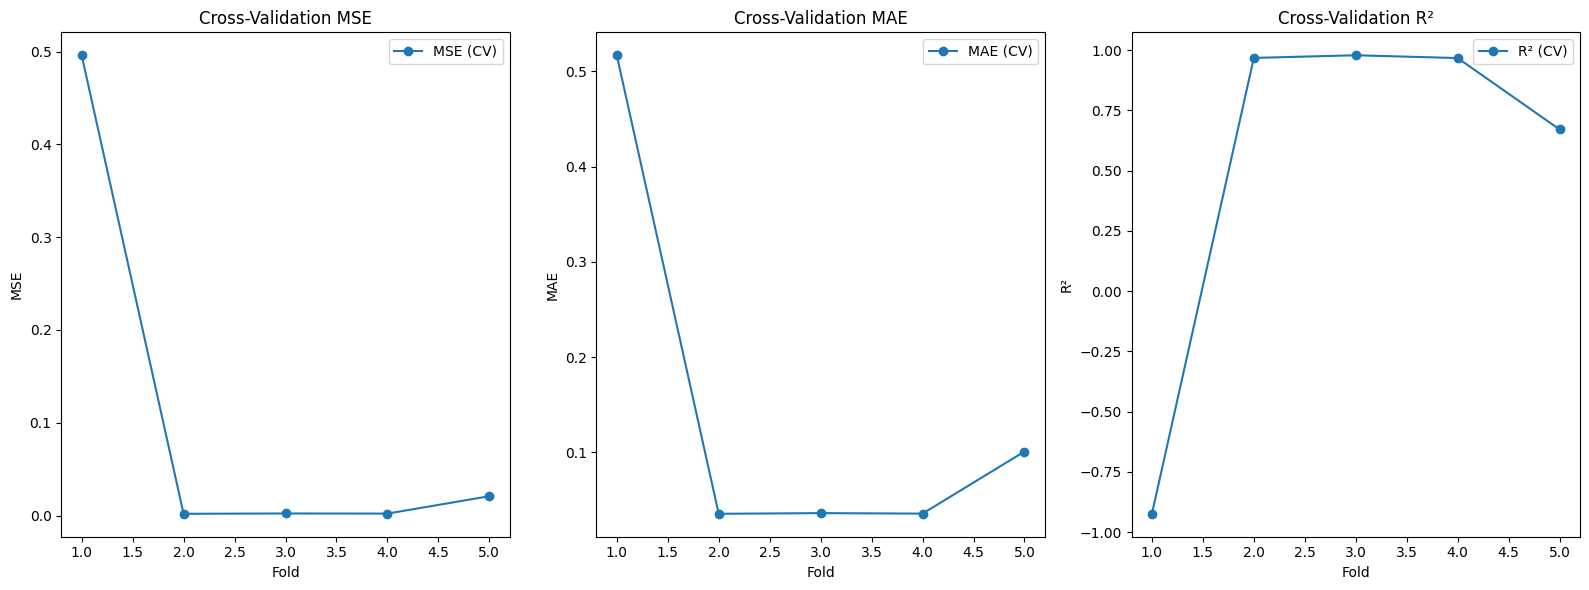

In [ ]:
# Perform Cross-Validation
cv_mse_dt = cross_val_score(dt_model, x_dt_train, y_dt_train, cv=5, scoring='neg_mean_squared_error')
cv_mae_dt = cross_val_score(dt_model, x_dt_train, y_dt_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_dt = cross_val_score(dt_model, x_dt_train, y_dt_train, cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
dt_cv_mse = -cv_mse_dt
dt_cv_mae = -cv_mae_dt
dt_cv_r2 = cv_r2_dt

dt_mean_cv_mse = np.mean(dt_cv_mse)
dt_mean_cv_mae = np.mean(dt_cv_mae)
dt_mean_cv_r2 = np.mean(dt_cv_r2
                        )
print(f"Mean MSE (CV): {dt_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {dt_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {dt_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(dt_cv_mse) + 1), dt_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(dt_cv_mae) + 1), dt_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(dt_cv_r2) + 1), dt_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()

####Parameter Tuning

In [ ]:
# Huấn luyện mô hình Decision Tree
dt_model = DecisionTreeRegressor(max_depth=20, random_state=42)
dt_model.fit(x_dt_train, y_dt_train)

# Dự đoán trên tập kiểm tra
dt_preds = dt_model.predict(x_dt_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_dt_test_original = scaler.inverse_transform(y_dt_test.reshape(-1, 1))
dt_preds_original = scaler.inverse_transform(dt_preds.reshape(-1, 1))

# Đánh giá mô hình Decision Tree
dt_mse_tuning = mean_squared_error(y_dt_test_original, dt_preds_original)
dt_mae_tuning = mean_absolute_error(y_dt_test_original, dt_preds_original)
dt_r2_tuning = r2_score(y_dt_test_original, dt_preds_original)

# In kết quả
print(f"Decision Tree - MSE: {dt_mse_tuning:.4f}, MAE: {dt_mae_tuning:.4f}, R²: {dt_r2_tuning:.4f}")

Decision Tree - MSE: 369.9599, MAE: 13.8772, R²: 0.2822


####Compare

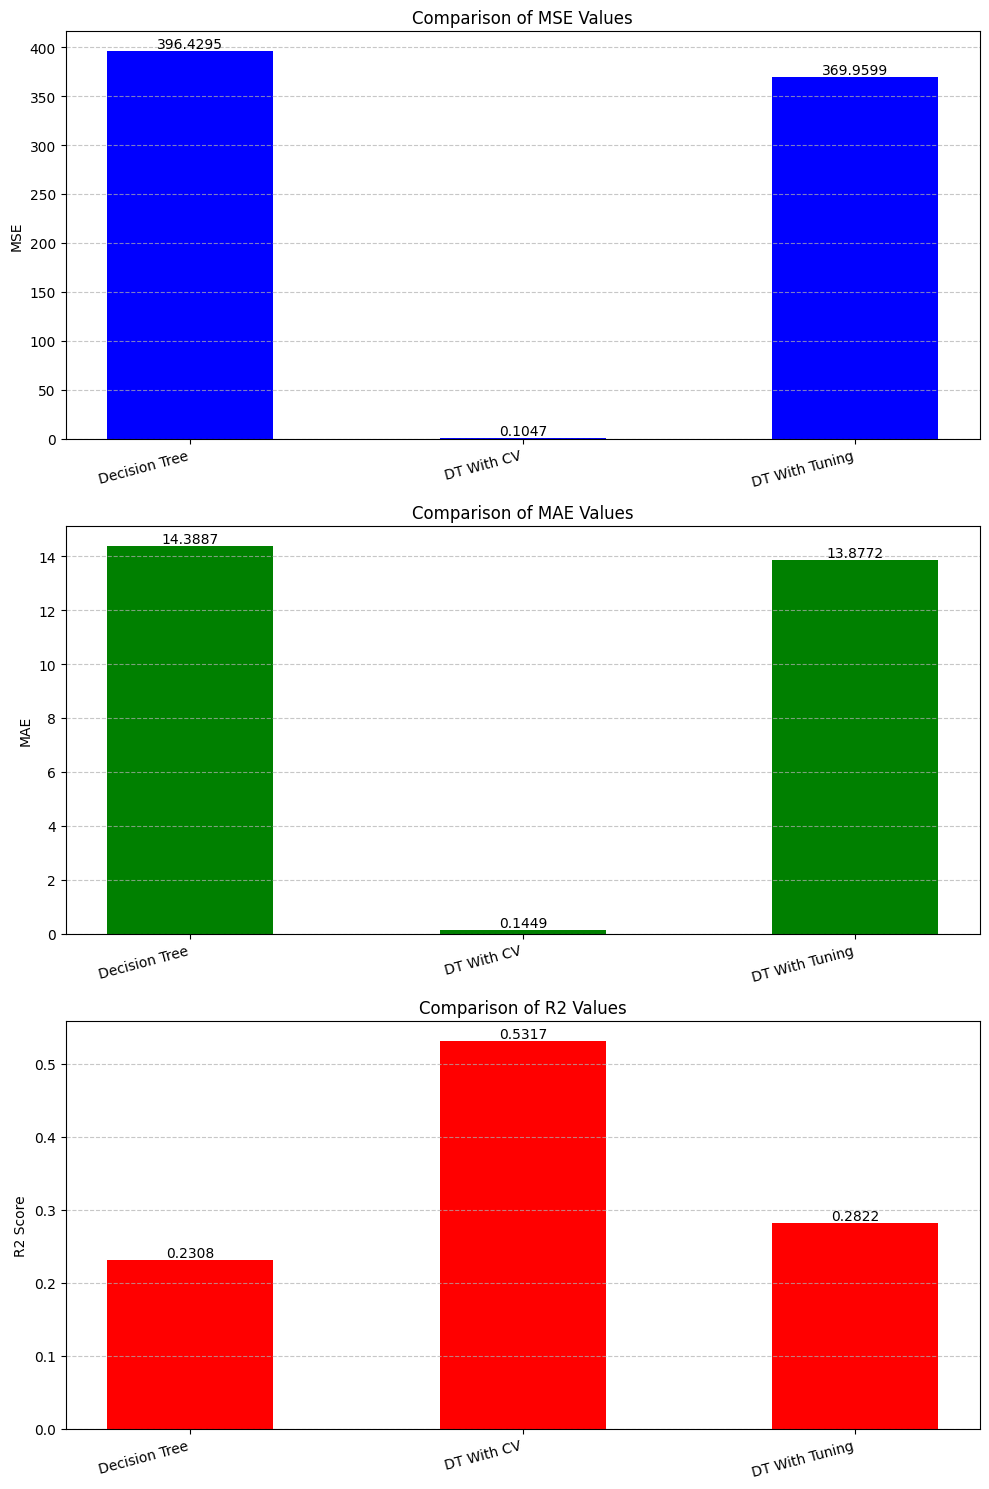

In [ ]:
# Data for visualization
methods = [
    "Decision Tree",
    "DT With CV",
    "DT With Tuning",
]
mse_values = [
    round(dt_mse, 4),
    round(dt_mean_cv_mse, 4),
    round(dt_mse_tuning, 4),
]

mae_values = [
    round(dt_mae, 4),
    round(dt_mean_cv_mae, 4),
    round(dt_mae_tuning, 4),
]

r2_values = [
    round(dt_r2, 4),
    round(dt_mean_cv_r2, 4),
    round(dt_r2_tuning, 4),
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##Random Forest

In [ ]:
# Kết hợp dữ liệu tuần tự và đặc trưng hiện tại
def prepare_random_forest_data(x_seq, x_cur, y):
    x_combined = np.hstack((x_seq.reshape(x_seq.shape[0], -1), x_cur))  # Kết hợp x_seq và x_cur
    return x_combined, y

# Chuẩn bị dữ liệu huấn luyện và kiểm tra
x_rf_train, y_rf_train = prepare_random_forest_data(x_seq_train, x_cur_train, y_train)
x_rf_test, y_rf_test = prepare_random_forest_data(x_seq_test, x_cur_test, y_test)

###Task 1: Experiment

In [ ]:
# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=42)
rf_model.fit(x_rf_train, y_rf_train.ravel())  # Sử dụng .ravel() để làm phẳng y_train

# Dự đoán trên tập kiểm tra
rf_preds = rf_model.predict(x_rf_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_rf_test_original = scaler.inverse_transform(y_rf_test.reshape(-1, 1))
rf_preds_original = scaler.inverse_transform(rf_preds.reshape(-1, 1))

# Đánh giá mô hình Random Forest
rf_mse = mean_squared_error(y_rf_test_original, rf_preds_original)
rf_mae = mean_absolute_error(y_rf_test_original, rf_preds_original)
rf_r2 = r2_score(y_rf_test_original, rf_preds_original)

# In kết quả
print(f"Random Forest - MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}, R²: {rf_r2:.4f}")

Random Forest - MSE: 414.8747, MAE: 14.4470, R²: 0.1950


###Task 2: Apply techniques to prevent overfitting and plot training graphs

####Cross-Validation

Mean MSE (CV): 0.1041
Mean MAE (CV): 0.1421
Mean R² (CV): 0.5159


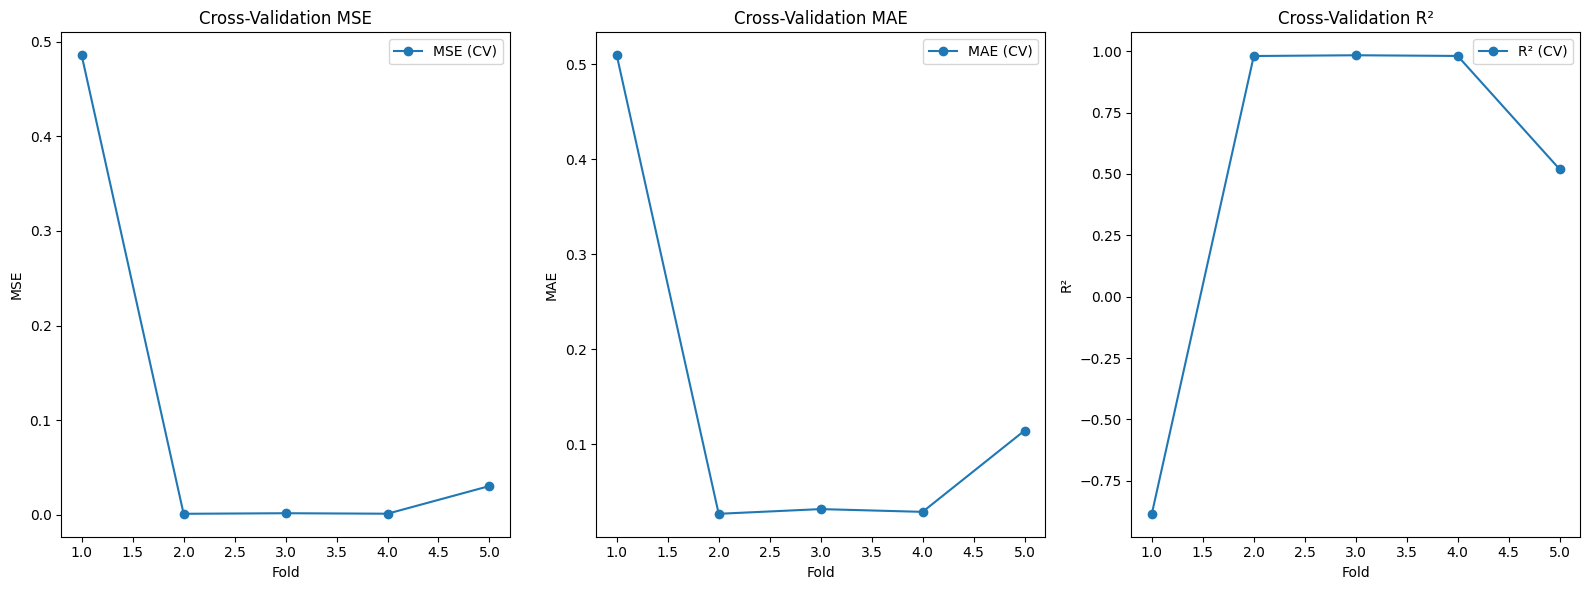

In [ ]:
# Ensure y_train is a 1D array
y_train_rf = y_rf_train.ravel()

# Perform Cross-Validation
cv_mse_rf = cross_val_score(rf_model, x_rf_train, y_train_rf, cv=5, scoring='neg_mean_squared_error')
cv_mae_rf = cross_val_score(rf_model, x_rf_train, y_train_rf, cv=5, scoring='neg_mean_absolute_error')
cv_r2_rf = cross_val_score(rf_model, x_rf_train, y_train_rf, cv=5, scoring='r2')

# Convert negative scores to positive for MSE and MAE
rf_cv_mse = -cv_mse_rf
rf_cv_mae = -cv_mae_rf
rf_cv_r2 = cv_r2_rf

rf_mean_cv_mse = np.mean(rf_cv_mse)
rf_mean_cv_mae = np.mean(rf_cv_mae)
rf_mean_cv_r2 = np.mean(rf_cv_r2)

print(f"Mean MSE (CV): {rf_mean_cv_mse:.4f}")
print(f"Mean MAE (CV): {rf_mean_cv_mae:.4f}")
print(f"Mean R² (CV): {rf_mean_cv_r2:.4f}")

# ---------------------- Plot Training Graphs ----------------------
plt.figure(figsize=(16, 6))

# MSE Plot
plt.subplot(1, 3, 1)
plt.plot(range(1, len(rf_cv_mse) + 1), rf_cv_mse, marker='o', label='MSE (CV)')
plt.title('Cross-Validation MSE')
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
plt.plot(range(1, len(rf_cv_mae) + 1), rf_cv_mae, marker='o', label='MAE (CV)')
plt.title('Cross-Validation MAE')
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.legend()

# R² Plot
plt.subplot(1, 3, 3)
plt.plot(range(1, len(rf_cv_r2) + 1), rf_cv_r2, marker='o', label='R² (CV)')
plt.title('Cross-Validation R²')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.legend()

plt.tight_layout()
plt.show()

####Parameter Tuning

In [ ]:
# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=10, max_depth=15, random_state=42)
rf_model.fit(x_rf_train, y_rf_train.ravel())  # Sử dụng .ravel() để làm phẳng y_train

# Dự đoán trên tập kiểm tra
rf_preds = rf_model.predict(x_rf_test)

# Đảo ngược chuẩn hóa các giá trị thực tế và dự đoán
y_rf_test_original = scaler.inverse_transform(y_rf_test.reshape(-1, 1))
rf_preds_original = scaler.inverse_transform(rf_preds.reshape(-1, 1))

# Đánh giá mô hình Random Forest
rf_mse_tuning = mean_squared_error(y_rf_test_original, rf_preds_original)
rf_mae_tuning = mean_absolute_error(y_rf_test_original, rf_preds_original)
rf_r2_tuning = r2_score(y_rf_test_original, rf_preds_original)

# In kết quả
print(f"Random Forest - MSE: {rf_mse_tuning:.4f}, MAE: {rf_mae_tuning:.4f}, R²: {rf_r2_tuning:.4f}")

Random Forest - MSE: 410.8143, MAE: 14.3716, R²: 0.2029


####Compare

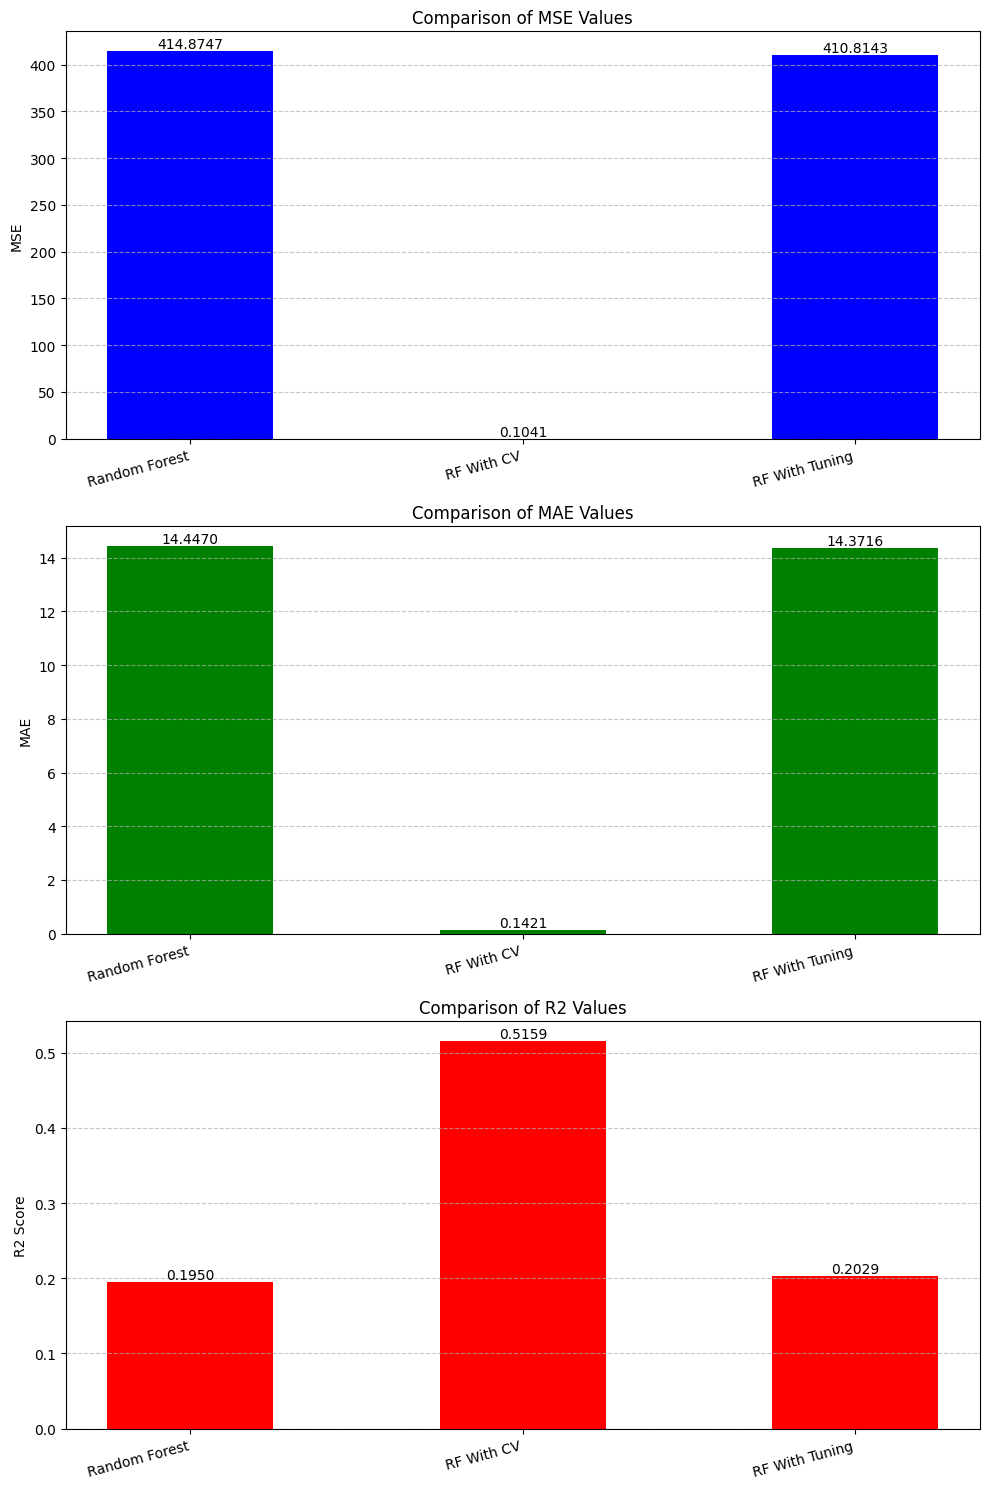

In [ ]:
# Data for visualization
methods = [
    "Random Forest",
    "RF With CV",
    "RF With Tuning",
]
mse_values = [
    round(rf_mse, 4),
    round(rf_mean_cv_mse, 4),
    round(rf_mse_tuning, 4),
]

mae_values = [
    round(rf_mae, 4),
    round(rf_mean_cv_mae, 4),
    round(rf_mae_tuning, 4),
]

r2_values = [
    round(rf_r2, 4),
    round(rf_mean_cv_r2, 4),
    round(rf_r2_tuning, 4),
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

##Task 3: Evaluate the models and compare them, plotting the results.

FeedForward Neural Network
Mean Squared Error (MSE): 20.61702901557763
Mean Absolute Error (MAE): 3.739939738128145
R^2 Score: 0.9599982312470512

Recurrent Neural Network
Mean Squared Error (MSE): 328.794583058991
Mean Absolute Error (MAE): 15.657136820130429
R^2 Score: 0.3620630368803174

Linear Regression
Mean Squared Error (MSE): 1.4320457852737134
Mean Absolute Error (MAE): 0.8688929107858907
R^2 Score: 0.9972215024627035

Support Vector Machine
Mean Squared Error (MSE): 297.6432301284825
Mean Absolute Error (MAE): 14.296752636206136
R^2 Score: 0.4225038120922149

Decision Tree
Mean Squared Error (MSE): 396.4295403813038
Mean Absolute Error (MAE): 14.388717102510556
R^2 Score: 0.23083569464887832

Random Forest
Mean Squared Error (MSE): 414.87473719143725
Mean Absolute Error (MAE): 14.446976283445197
R^2 Score: 0.19504777890000402



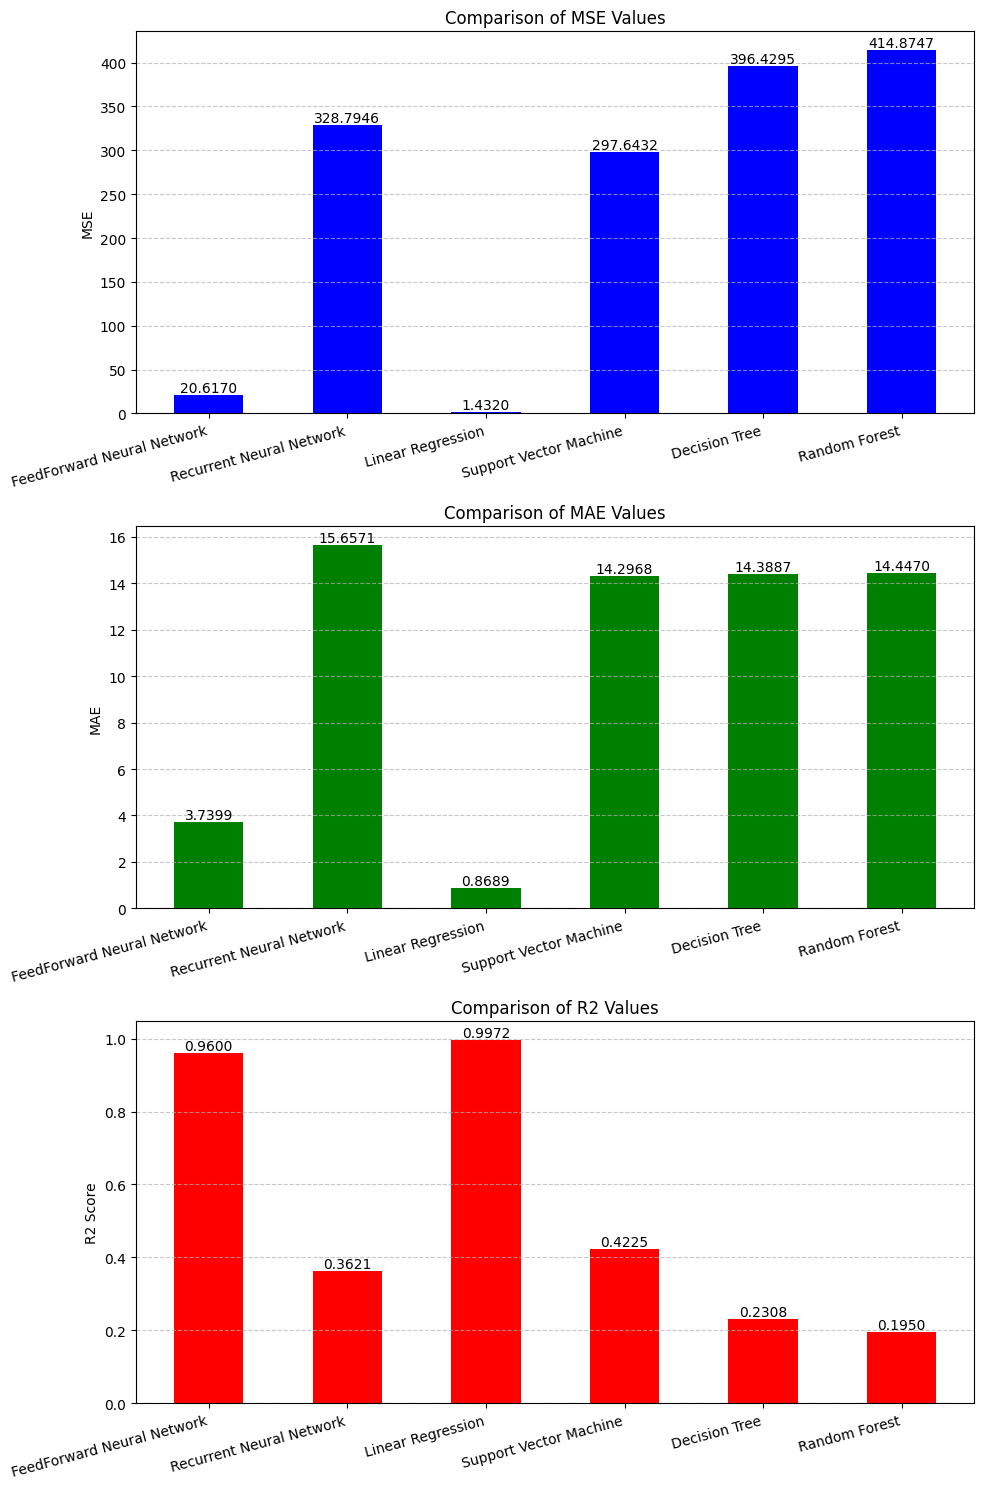

In [ ]:
print(f"FeedForward Neural Network")
print(f"Mean Squared Error (MSE): {mse_ffnn}")
print(f"Mean Absolute Error (MAE): {mae_ffnn}")
print(f"R^2 Score: {r2_ffnn}\n")

print("Recurrent Neural Network")
print(f"Mean Squared Error (MSE): {mse_rnn}")
print(f"Mean Absolute Error (MAE): {mae_rnn}")
print(f"R^2 Score: {r2_rnn}\n")

print("Linear Regression")
print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"Mean Absolute Error (MAE): {lr_mae}")
print(f"R^2 Score: {lr_r2}\n")

print("Support Vector Machine")
print(f"Mean Squared Error (MSE): {svm_mse}")
print(f"Mean Absolute Error (MAE): {svm_mae}")
print(f"R^2 Score: {svm_r2}\n")

print("Decision Tree")
print(f"Mean Squared Error (MSE): {dt_mse}")
print(f"Mean Absolute Error (MAE): {dt_mae}")
print(f"R^2 Score: {dt_r2}\n")

print("Random Forest")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"Mean Absolute Error (MAE): {rf_mae}")
print(f"R^2 Score: {rf_r2}\n")

# Data for visualization
methods = [
    "FeedForward Neural Network",
    "Recurrent Neural Network",
    "Linear Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest",
]
mse_values = [
    round(mse_ffnn, 4),
    round(mse_rnn, 4),
    round(lr_mse, 4),
    round(svm_mse, 4),
    round(dt_mse, 4),
    round(rf_mse, 4),
]

mae_values = [
    round(mae_ffnn, 4),
    round(mae_rnn, 4),
    round(lr_mae, 4),
    round(svm_mae, 4),
    round(dt_mae, 4),
    round(rf_mae, 4),
]

r2_values = [
    round(r2_ffnn, 4),
    round(r2_rnn, 4),
    round(lr_r2, 4),
    round(svm_r2, 4),
    round(dt_r2, 4),
    round(rf_r2, 4),
]

# Indices for bar positions
x = np.arange(len(methods))

# Width of the bars
bar_width = 0.5

# Function to add values on top of bars
def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.4f}',
            ha='center', va='bottom'
        )

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot MSE values
bars1 = axs[0].bar(x, mse_values, color='blue', width=bar_width)
axs[0].set_title('Comparison of MSE Values')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods, rotation=15, ha='right')
axs[0].set_ylabel('MSE')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[0], bars1)

# Plot MAE values
bars2 = axs[1].bar(x, mae_values, color='green', width=bar_width)
axs[1].set_title('Comparison of MAE Values')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods, rotation=15, ha='right')
axs[1].set_ylabel('MAE')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[1], bars2)

# Plot R2 values
bars3 = axs[2].bar(x, r2_values, color='red', width=bar_width)
axs[2].set_title('Comparison of R2 Values')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods, rotation=15, ha='right')
axs[2].set_ylabel('R2 Score')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(axs[2], bars3)

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

#Question 3

##Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

##Convolutional Neural Network (CNN)

###Load and proprocess dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

#Chuyển đổi nhãn thành one-hot encoding
train_labels = to_categorical(train_labels, 10)  # 10 lớp (0-9)
test_labels = to_categorical(test_labels, 10)

print("Shape of X_train:", train_images.shape)
print("Shape of y_train:", train_labels.shape)
print("Shape of X_test:", test_images.shape)
print("Shape of y_test:", test_labels.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 10)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 10)


###Verify the data

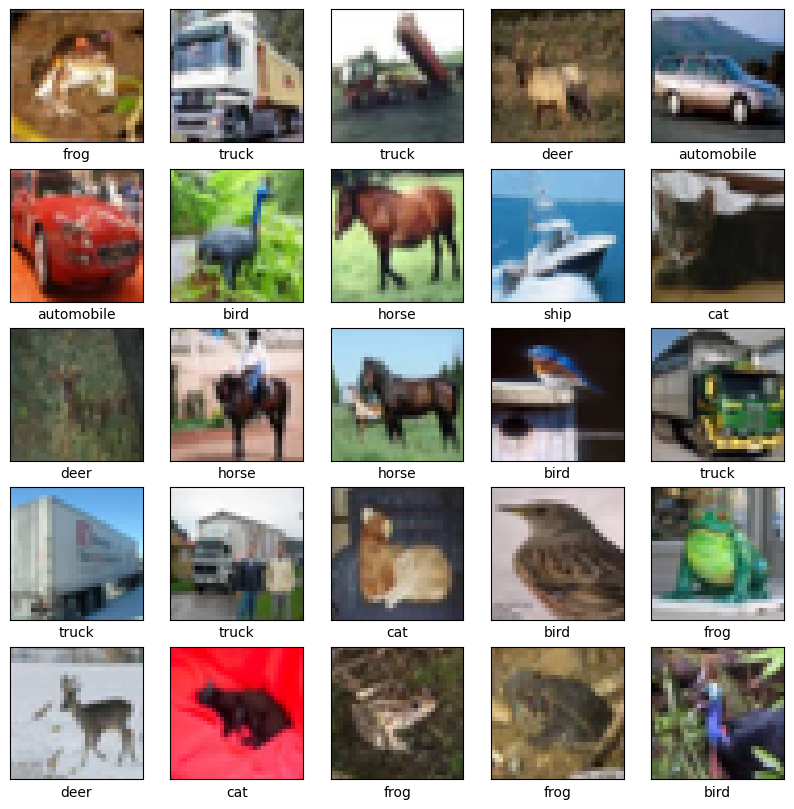

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # Lấy index của nhãn từ one-hot encoding
    label_index = np.argmax(train_labels[i])  # Lấy chỉ số của lớp từ one-hot vector
    plt.xlabel(class_names[label_index])  # Hiển thị tên của lớp
plt.show()

###Create the convolutional base

In [ ]:
model = Sequential()

# Lớp Conv2D + MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp Conv2D + MaxPooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

###Add Dense layers on top

In [ ]:
# Lớp Flatten (chuyển 2D thành 1D)
model.add(Flatten())

# Lớp Fully Connected (Dense)
model.add(Dense(128, activation='relu'))

# Lớp đầu ra (sử dụng softmax cho 10 lớp)
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 188,810 (737.54 KB)

 Trainable params: 188,810 (737.54 KB)

 Non-trainable params: 0 (0.00 B)

###Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Xem mô hình
# model.summary()

history = model.fit(train_images, train_labels,validation_data=(test_images, test_labels),epochs=10,batch_size = 32,verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.3607 - loss: 1.7267 - val_accuracy: 0.5502 - val_loss: 1.2599
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.5942 - loss: 1.1402 - val_accuracy: 0.6030 - val_loss: 1.1195
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.6608 - loss: 0.9667 - val_accuracy: 0.6623 - val_loss: 0.9608
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.6998 - loss: 0.8457 - val_accuracy: 0.6737 - val_loss: 0.9491
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.7287 - loss: 0.7692 - val_accuracy: 0.6731 - val_loss: 0.9647
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.7595 - loss: 0.6804 - val_accuracy: 0.7021 - val_loss: 0.8696
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.7773 - loss: 0.6338 - val_accuracy: 0.7015 - val_loss: 0.8789
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.7980 -

###Evaluate the model

In [ ]:
# Đánh giá mô hình trên tập kiểm định (test set)
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Dự đoán trên tập kiểm định (test set)
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(test_labels, axis=1)

# Hiển thị báo cáo phân loại
print(classification_report(y_test_classes, y_pred_classes, target_names=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7181 - loss: 0.8991
Test Loss: 0.9134
Test Accuracy: 0.7178
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
              precision    recall  f1-score   support

    Airplane       0.73      0.78      0.75      1000
  Automobile       0.85      0.81      0.83      1000
        Bird       0.61      0.61      0.61      1000
         Cat       0.56      0.53      0.54      1000
        Deer       0.65      0.69      0.67      1000
         Dog       0.71      0.53      0.61      1000
        Frog       0.74      0.82      0.78      1000
       Horse       0.76      0.76      0.76      1000
        Ship       0.78      0.84      0.81      1000
       Truck       0.76      0.81      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



###Plot The Result

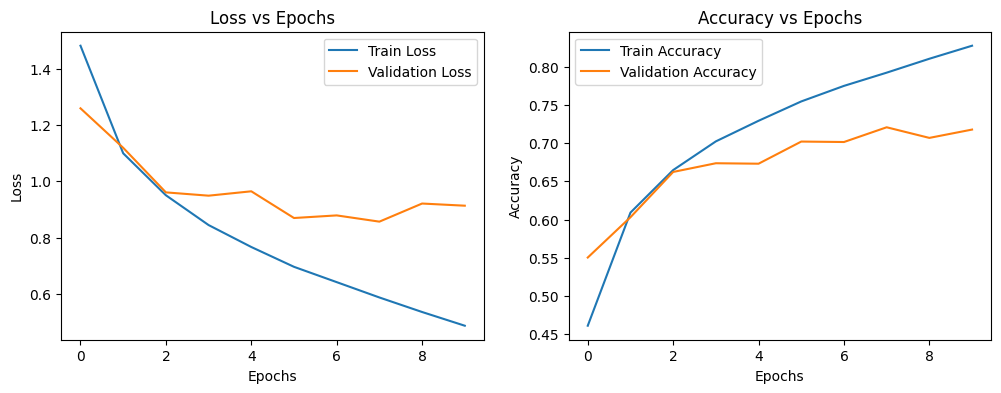

In [ ]:
# Vẽ loss và accuracy của quá trình huấn luyện
plt.figure(figsize=(12, 4))

# Vẽ loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Vẽ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()